<a href="https://colab.research.google.com/github/isaacdavii/Projeto_Dados_Astronomicos_Hipparcos/blob/main/Hipparcos_Astronomy_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Catálogo Astronômico de Estrelas Hipparcos

### Contexto

Os dados foram coletados pelo satélite astrométrico da Agência Espacial Europeia, Hipparcos, ativo de agosto de 1989 a agosto de 1993.

O catálogo foi publicado em julho de 1997.

O grande número de campos neste arquivo oferece muitas oportunidades de análise para cientistas de dados.

O arquivo original foi simplificado, convertendo-o de largura fixa com valores separados por pipe para CSV. Ocorrências raras de vírgulas dentro dos valores foram substituídas por ponto e vírgula. Mais detalhes sobre cada campo são fornecidos abaixo.

`link:` https://www.kaggle.com/datasets/konivat/hipparcos-star-catalog

In [ ]:
# Conectamos ao Google Drive a fim de puxar o nosso banco de dados
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importando Bibliotecas**

In [ ]:
import pandas as pd # Manipulação e análise de dados (leitura, escrita, limpeza e preparação de dados)
import numpy as np # Manipulação de matrizes multidimensionais
import matplotlib.pyplot as plt # Criação de gráficos e visualizações
import seaborn as sns # Fornece uma interface gráfica para estatísticas

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Catálogo - Astronomia Estelar Hipparcos/hipparcos-voidmain.csv')
df.head()

Catalog  HIP Proxy        RAhms        DEdms  Vmag  VarFlag r_Vmag  \
0       H    1   NaN  00 00 00.22  +01 05 20.4  9.10      NaN      H   
1       H    2   NaN  00 00 00.91  -19 29 55.8  9.27      NaN      G   
2       H    3   NaN  00 00 01.20  +38 51 33.4  6.61      NaN      G   
3       H    4   NaN  00 00 02.01  -51 53 36.8  8.06      NaN      H   
4       H    5   NaN  00 00 02.39  -40 35 28.4  8.55      NaN      H   

      RAdeg      DEdeg  ... Survey  Chart  Notes        HD         BD  \
0  0.000912   1.089013  ...      S    NaN    NaN  224700.0  B+00 5077   
1  0.003797 -19.498837  ...    NaN    NaN    NaN  224690.0  B-20 6688   
2  0.005008  38.859286  ...      S    NaN    NaN  224699.0  B+38 5108   
3  0.008382 -51.893546  ...      S    NaN    NaN  224707.0        NaN   
4  0.009965 -40.591224  ...    NaN    NaN    NaN  224705.0        NaN   

          CoD         CPD  (V-I)red  SpType  r_SpType  
0         NaN         NaN      0.66      F5         S  
1         NaN         NaN      1.04     K3V         4  
2         NaN         NaN      0.00      B9         S  
3         NaN  P-52 12237      0.43     F0V         2  
4  C-41 15372  P-41  9991      0.95   G8III         2  

[5 rows x 78 columns]

In [ ]:
# Traz dados e exemplos da estrutura a fim de auxiliar na compreensão da estrutura de dados que estamos trabalhando
df.shape

(118218, 78)

In [ ]:
# Fazemos a visualização das colunas de nosso dataset
df.columns

# Poderíamos também fazer um df.info() para uma visualização mais detalhada acerca dos atributs

Index(['Catalog', 'HIP', 'Proxy', 'RAhms', 'DEdms', 'Vmag', 'VarFlag',
       'r_Vmag', 'RAdeg', 'DEdeg', 'AstroRef', 'Plx', 'pmRA', 'pmDE',
       'e_RAdeg', 'e_DEdeg', 'e_Plx', 'e_pmRA', 'e_pmDE', 'DE:RA', 'Plx:RA',
       'Plx:DE', 'pmRA:RA', 'pmRA:DE', 'pmRA:Plx', 'pmDE:RA', 'pmDE:DE',
       'pmDE:Plx', 'pmDE:pmRA', 'F1', 'F2', '---', 'BTmag', 'e_BTmag', 'VTmag',
       'e_VTmag', 'm_BTmag', 'B-V', 'e_B-V', 'r_B-V', 'V-I', 'e_V-I', 'r_V-I',
       'CombMag', 'Hpmag', 'e_Hpmag', 'Hpscat', 'o_Hpmag', 'm_Hpmag', 'Hpmax',
       'HPmin', 'Period', 'HvarType', 'moreVar', 'morePhoto', 'CCDM', 'n_CCDM',
       'Nsys', 'Ncomp', 'MultFlag', 'Source', 'Qual', 'm_HIP', 'theta', 'rho',
       'e_rho', 'dHp', 'e_dHp', 'Survey', 'Chart', 'Notes', 'HD', 'BD', 'CoD',
       'CPD', '(V-I)red', 'SpType', 'r_SpType'],
      dtype='object')

In [ ]:
# Criação dos dados

data = {
    'ID': range(78),
    'Original': [
        'Catalog ( Catalog_Name )', 'HIP ( HIP_Number )', 'Proxy ( Prox_10asec )', 'RAhms ( RA )',
        'DEdms ( Dec )', 'Vmag ( Vmag )', 'VarFlag ( Var_Flag )', 'r_Vmag ( Vmag_Source )',
        'RAdeg ( RA_Deg )', 'DEdeg ( Dec_Deg )', 'AstroRef ( Astrom_Ref_Dbl )', 'Plx ( Parallax )',
        'pmRA ( pm_RA )', 'pmDE ( pm_Dec )', 'e_RAdeg ( RA_Error )', 'e_DEdeg ( Dec_Error )',
        'e_Plx ( Parallax_Error )', 'e_pmRA ( pm_RA_Error )', 'e_pmDE ( pm_Dec_Error )',
        'DE:RA ( Crl_Dec_RA )', 'Plx:RA ( Crl_Plx_RA )', 'Plx:DE ( Crl_Plx_Dec )',
        'pmRA:RA ( Crl_pmRA_RA )', 'pmRA:DE ( Crl_pmRA_Dec )', 'pmRA:Plx ( Crl_pmRA_Plx )',
        'pmDE:RA ( Crl_pmDec_RA )', 'pmDE:DE ( Crl_pmDec_Dec )', 'pmDE:Plx ( Crl_pmDec_Plx )',
        'pmDE:pmRA ( Crl_pmDec_pmRA )', 'F1 ( Reject_Percent )', 'F2 ( Quality_Fit )',
        '--- ( HIP_Number_repeat )', 'BTmag ( BT_Mag )', 'e_BTmag ( BT_Mag_Error )',
        'VTmag ( VT_Mag )', 'e_VTmag ( VT_Mag_Error )', 'm_BTmag ( BT_Mag_Ref_Dbl )',
        'B-V ( BV_Color )', 'e_B-V ( BV_Color_Error )', 'r_B-V ( BV_Mag_Source )',
        'V-I ( VI_Color )', 'e_V-I ( VI_Color_Error )', 'r_V-I ( VI_Color_Source )',
        'CombMag ( Mag_Ref_Dbl )', 'Hpmag ( Hip_Mag )', 'e_Hpmag ( Hip_Mag_Error )',
        'Hpscat ( Scat_Hip_Mag )', 'o_Hpmag ( N_Obs_Hip_Mag )', 'm_Hpmag ( Hip_Mag_Ref_Dbl )',
        'Hpmax ( Hip_Mag_Max )', 'HPmin ( Hip_Mag_Min )', 'Period ( Var_Period )',
        'HvarType ( Hip_Var_Type )', 'moreVar ( Var_Data_Annex )', 'morePhoto ( Var_Curv_Annex )',
        'CCDM ( CCDM_Id )', 'n_CCDM ( CCDM_History )', 'Nsys ( CCDM_N_Entries )',
        'Ncomp ( CCDM_N_Comp )', 'MultFlag ( Dbl_Mult_Annex )', 'Source ( Astrom_Mult_Source )',
        'Qual ( Dbl_Soln_Qual )', 'm_HIP ( Dbl_Ref_ID )', 'theta ( Dbl_Theta )',
        'rho ( Dbl_Rho )', 'e_rho ( Rho_Error )', 'dHp ( Diff_Hip_Mag )', 'e_dHp ( dHip_Mag_Error )',
        'Survey ( Survey_Star )', 'Chart ( ID_Chart )', 'Notes ( Notes )', 'HD ( HD_Id )',
        'BD ( BD_Id )', 'CoD ( CoD_Id )', 'CPD ( CPD_Id )', '(V-I)red ( VI_Color_Reduct )',
        'SpType ( Spect_Type )', 'r_SpType ( Spect_Type_Source )'
    ],
    'Tradução': [
        'Catálogo (H=Hipparcos)', 'Identificador (número HIP)', 'Bandeira de proximidade',
        'AR em h m s, ICRS (J1991.25)', 'Dec em graus \' , ICRS (J1991.25)', 'Magnitude em Johnson V',
        'Bandeira de variabilidade grosseira', 'Fonte da magnitude', 'AR em graus (ICRS, Época-J1991.25)',
        'Dec em graus (ICRS, Época-J1991.25)', 'Bandeira de referência para astrometria', 'Paralaxe trigonométrica',
        'Movimento próprio em AR', 'Movimento próprio em Dec', 'Erro padrão em RA*cos(Dec_Deg)',
        'Erro padrão em Dec_Deg', 'Erro padrão em Paralaxe', 'Erro padrão em pmRA', 'Erro padrão em pmDE',
        '(Dec sobre AR) x Cos(delta)', '(Plx sobre AR) x Cos(delta)', '(Plx sobre Dec)',
        '(pmRA sobre AR) x Cos(delta)', '(pmRA sobre Dec)', '(pmRA sobre Plx)',
        '(pmDE sobre AR) x Cos(delta)', '(pmDE sobre Dec)', '(pmDE sobre Plx)', '(pmDE sobre pmRA)',
        'Percentual de dados rejeitados', 'Parâmetro de qualidade de ajuste', 'Número HIP (repetição)',
        'Magnitude média BT', 'Erro padrão em BTmag', 'Magnitude média VT', 'Erro padrão em VTmag',
        'Bandeira de referência para BT e VTmag', 'Cor Johnson BV', 'Erro padrão em BV', 'Fonte de BV do Solo ou Tycho',
        'Índice de cor no sistema de Cousins', 'Erro padrão em VI', 'Fonte de VI', 'Bandeira para Vmag combinada, BV, VI',
        'Magnitude mediana no sistema Hipparcos', 'Erro padrão em Hpmag', 'Dispersão de Hpmag',
        'Número de observações para Hpmag', 'Bandeira de referência para Hpmag', 'Hpmag no máximo (5º percentil)',
        'Hpmag no mínimo (95º percentil)', 'Período de variabilidade (dias)', 'Tipo de variabilidade',
        'Dados adicionais sobre variabilidade', 'Anexo da curva de luz', 'Identificador CCDM',
        'Bandeira de status histórico', 'Número de entradas com o mesmo CCDM', 'Número de componentes nesta entrada',
        'Bandeira de Sistemas Duplos e/ou Múltiplos', 'Bandeira de fonte astrométrica', 'Bandeira de qualidade da solução',
        'Identificadores de componentes', 'Ângulo de posição entre os componentes', 'Separação angular dos componentes',
        'Erro padrão de rho', 'Diferença de magnitude dos componentes', 'Erro padrão em dHp', 'Bandeira indicando uma Estrela de Pesquisa',
        'Gráfico de Identificação', 'Existência de notas', 'Número HD (III 135)', 'Bonner DM (I 119), (I 122)',
        'Cordoba Durchmusterung (DM) (I 114)', 'Cape Photographic DM (I 108)', 'VI usado para reduções',
        'Tipo espectral', 'Fonte do tipo espectral'
    ]
}

# Criação do DataFrame
tabela_df = pd.DataFrame(data)

# Visualização da tabela
pd.set_option('display.max_rows', None)  # Exibir todas as linhas
pd.set_option('display.max_colwidth', None)  # Exibir todo o conteúdo das colunas

tabela_df

ID                        Original  \
0    0        Catalog ( Catalog_Name )   
1    1              HIP ( HIP_Number )   
2    2           Proxy ( Prox_10asec )   
3    3                    RAhms ( RA )   
4    4                   DEdms ( Dec )   
5    5                   Vmag ( Vmag )   
6    6            VarFlag ( Var_Flag )   
7    7          r_Vmag ( Vmag_Source )   
8    8                RAdeg ( RA_Deg )   
9    9               DEdeg ( Dec_Deg )   
10  10     AstroRef ( Astrom_Ref_Dbl )   
11  11                Plx ( Parallax )   
12  12                  pmRA ( pm_RA )   
13  13                 pmDE ( pm_Dec )   
14  14            e_RAdeg ( RA_Error )   
15  15           e_DEdeg ( Dec_Error )   
16  16        e_Plx ( Parallax_Error )   
17  17          e_pmRA ( pm_RA_Error )   
18  18         e_pmDE ( pm_Dec_Error )   
19  19            DE:RA ( Crl_Dec_RA )   
20  20           Plx:RA ( Crl_Plx_RA )   
21  21          Plx:DE ( Crl_Plx_Dec )   
22  22         pmRA:RA ( Crl_pmRA_RA )   
23  23        pmRA:DE ( Crl_pmRA_Dec )   
24  24       pmRA:Plx ( Crl_pmRA_Plx )   
25  25        pmDE:RA ( Crl_pmDec_RA )   
26  26       pmDE:DE ( Crl_pmDec_Dec )   
27  27      pmDE:Plx ( Crl_pmDec_Plx )   
28  28    pmDE:pmRA ( Crl_pmDec_pmRA )   
29  29           F1 ( Reject_Percent )   
30  30              F2 ( Quality_Fit )   
31  31       --- ( HIP_Number_repeat )   
32  32                BTmag ( BT_Mag )   
33  33        e_BTmag ( BT_Mag_Error )   
34  34                VTmag ( VT_Mag )   
35  35        e_VTmag ( VT_Mag_Error )   
36  36      m_BTmag ( BT_Mag_Ref_Dbl )   
37  37                B-V ( BV_Color )   
38  38        e_B-V ( BV_Color_Error )   
39  39         r_B-V ( BV_Mag_Source )   
40  40                V-I ( VI_Color )   
41  41        e_V-I ( VI_Color_Error )   
42  42       r_V-I ( VI_Color_Source )   
43  43         CombMag ( Mag_Ref_Dbl )   
44  44               Hpmag ( Hip_Mag )   
45  45       e_Hpmag ( Hip_Mag_Error )   
46  46         Hpscat ( Scat_Hip_Mag )   
47  47       o_Hpmag ( N_Obs_Hip_Mag )   
48  48     m_Hpmag ( Hip_Mag_Ref_Dbl )   
49  49           Hpmax ( Hip_Mag_Max )   
50  50           HPmin ( Hip_Mag_Min )   
51  51           Period ( Var_Period )   
52  52       HvarType ( Hip_Var_Type )   
53  53      moreVar ( Var_Data_Annex )   
54  54    morePhoto ( Var_Curv_Annex )   
55  55                CCDM ( CCDM_Id )   
56  56         n_CCDM ( CCDM_History )   
57  57         Nsys ( CCDM_N_Entries )   
58  58           Ncomp ( CCDM_N_Comp )   
59  59     MultFlag ( Dbl_Mult_Annex )   
60  60   Source ( Astrom_Mult_Source )   
61  61          Qual ( Dbl_Soln_Qual )   
62  62            m_HIP ( Dbl_Ref_ID )   
63  63             theta ( Dbl_Theta )   
64  64                 rho ( Dbl_Rho )   
65  65             e_rho ( Rho_Error )   
66  66            dHp ( Diff_Hip_Mag )   
67  67        e_dHp ( dHip_Mag_Error )   
68  68          Survey ( Survey_Star )   
69  69              Chart ( ID_Chart )   
70  70                 Notes ( Notes )   
71  71                    HD ( HD_Id )   
72  72                    BD ( BD_Id )   
73  73                  CoD ( CoD_Id )   
74  74                  CPD ( CPD_Id )   
75  75    (V-I)red ( VI_Color_Reduct )   
76  76           SpType ( Spect_Type )   
77  77  r_SpType ( Spect_Type_Source )   

                                      Tradução  
0                       Catálogo (H=Hipparcos)  
1                   Identificador (número HIP)  
2                      Bandeira de proximidade  
3                 AR em h m s, ICRS (J1991.25)  
4             Dec em graus ' , ICRS (J1991.25)  
5                       Magnitude em Johnson V  
6          Bandeira de variabilidade grosseira  
7                           Fonte da magnitude  
8           AR em graus (ICRS, Época-J1991.25)  
9          Dec em graus (ICRS, Época-J1991.25)  
10     Bandeira de referência para astrometria  
11                     Paralaxe trigonométrica  
12                     Movimento próprio em AR  

## **1. Sistema de Coordenadas Astronômicas**

Começamos olhando para qual parte do céu é coberta pela missão Hipparcos. Para fazer isso, usamos os sistemas de coordenadas astronômicas:

- A ascensão reta (RA)
- A declinação (DE)

Pense na ascensão reta como a _longitude_ e na declinação como a _latitude_ das estrelas no céu, em relação ao que os astrônomos definem como a *esfera celeste*, uma esfera imaginária no infinito, de modo que as estrelas a essa distância parecem permanecer fixas no céu.

\

### **Bibliografia**:
- Esfera celeste: https://en.wikipedia.org/wiki/Celestial_sphere

In [ ]:
# Aqui estabelecemos parâmetros de configuração que serão usados para personalizar as propriedades
# das figuras e gráficos criado com o 'matplotlib'

# param_img = Parâmetros das Imagens
param_img = {
                'figure.figsize': (10,4),
                'figure.dpi': 150,
                'axes.titlesize': 20,
                'axes.labelsize': 11,
                'ytick.labelsize': 11,
                'xtick.labelsize': 11,
                'legend.fontsize': 12,
                'legend.frameon': True,
                'lines.linewidth': 1
                }

plt.rcParams.update(param_img) # Atualiza os parâmetros de configuração padrão para a escolhida acima
plt.style.use('dark_background')

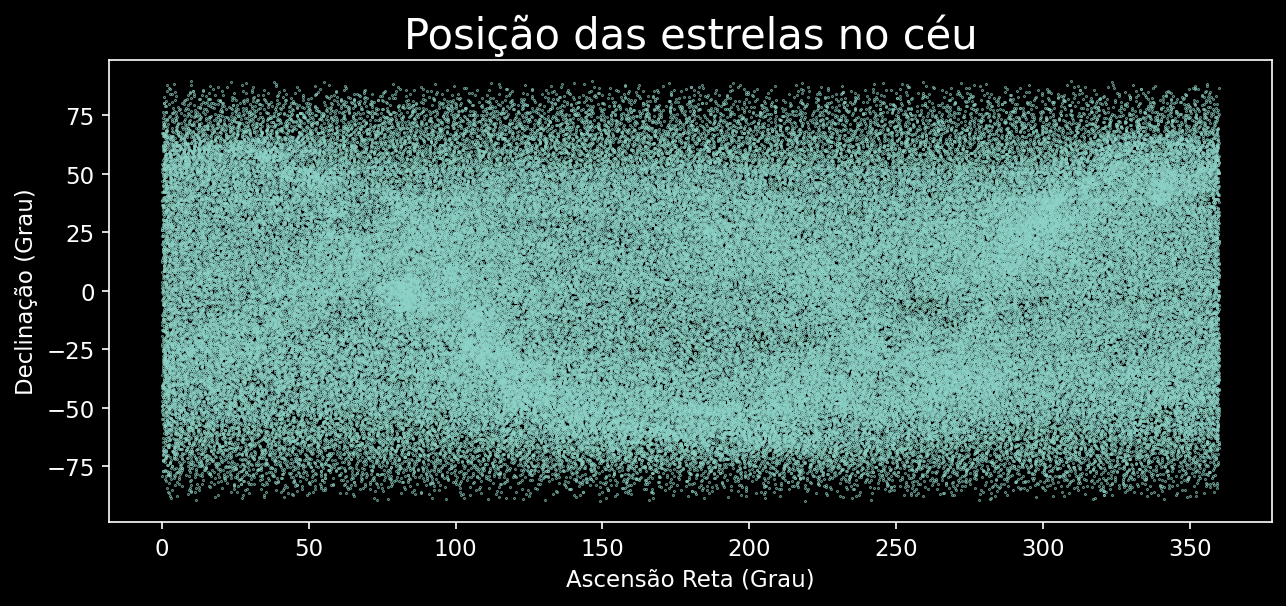

In [ ]:
plt.plot(df['RAdeg'], df['DEdeg'], 'o', markersize = 0.3)
plt.xlabel('Ascensão Reta (Grau)') #RAdeg
plt.ylabel('Declinação (Grau)') # DEdeg
plt.title('Posição das estrelas no céu')
plt.show()

## **2. Movimento próprio das estrelas** $^{[1]}$

Agora vamos visualizar o movimento próprio das estrelas conforme capturado pela missão Hipparcos.

Estrelas distantes na esfera celeste parecem permanecer fixas, no entanto, a maioria das estrelas na vizinhança solar parece mover-se pela esfera celeste, pois essas estrelas estão mais próximas.

Esse movimento aparente das estrelas em relação às estrelas fixas no fundo é chamado de *movimento próprio*.

O movimento próprio é medido ao longo da Ascensão Reta (pmRA) e ao longo da Declinação (pmDE) e estes são medidos em milissegundos de arco por ano ($ \frac {mas}{ano} $) ⟶ ($ mas \ ano ^{-1} $), onde `mas` é milissegundo de arco, uma unidade comum usada para medir ângulos muito pequenos no céu.

$1 \ mas = 10^{-3}$ segundos de arco

\

### **Bibliografia**:
- [1] Movimento próprio: https://en.wikipedia.org/wiki/Proper_motion

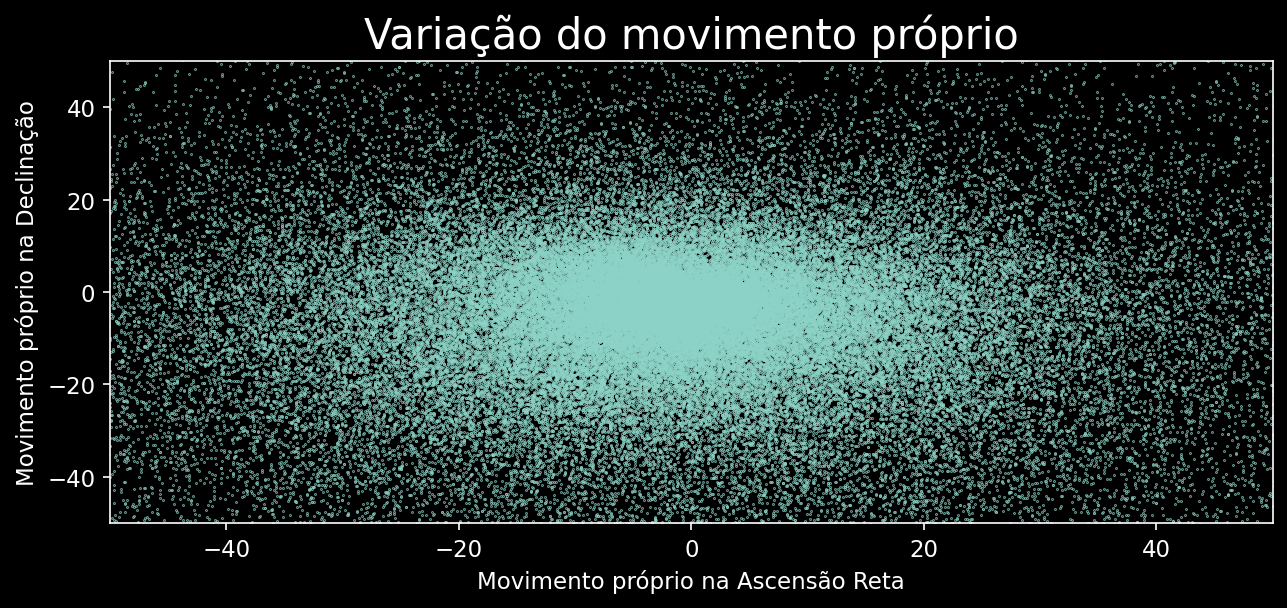

In [ ]:
plt.plot(df['pmRA'], df['pmDE'], 'o', markersize = 0.3)
plt.xlabel('Movimento próprio na Ascensão Reta')
plt.ylabel('Movimento próprio na Declinação')
plt.title('Variação do movimento próprio')
plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.show()

Colocamos o centro da movimentação própria em torno de zero pois pensamos em termos do movimento da terra no sistema solar e do movimento do sistema solar em torno do centro galáctico.


### **Resultado deste código:**
- **Visualização dos dados:** O gráfico resultante mostra a relação entre o movimento próprio na Ascensão Reta (pmRA) e o movimento próprio na Declinação (pmDE) para cada estrela do seu conjunto de dados.

- **Distribuição dos dados:** Com os marcadores pequenos (markersize = 0.3), podemos visualizar a densidade e a dispersão dos pontos, ajudando a identificar padrões, agrupamentos ou outliers (pontos fora da curva).

- **Intervalo específico:** Ao limitar os eixos x e y ao intervalo de -50 a 50, focamos em uma faixa específica dos dados, o que pode ser útil para eliminar valores extremos e focar na região onde a maioria dos dados está concentrada.

## **3. Distâncias em Astronomia**

O cálculo de distâncias em Astronomia $^{[1]}$ é um dos campos mais pesquisados ativamente. Isso se deve à vastidão do Universo e às limitações técnicas dos telescópios. Na bibliografia encontra-se um link que fala sobre a escada de distância cósmica a fim de aprofundamento no estudo.

Vamos apresentar um dos métodos geométricos mais antigos e simples para determinar distâncias.

O conceito de *paralaxe* surge do fato de que as estrelas parecem se mover em relação às estrelas de fundo quando observadas do mesmo local na Terra e com um intervalo de observação de cerca de seis meses, ou seja, olhamos para uma estrela e depois olhamos para a mesma estrela quando a Terra está do outro lado de sua órbita. Essa mudança de posição da Terra faz com que a estrela desloque sua posição formando um arco no céu. Esse deslocamento angular da estrela no céu é chamado de *paralaxe*.

Calculamos a distância de paralaxe usando trigonometria, cujos detalhes podem ser encontrados aqui.

\

Simplificando, a distância em parsecs $^{[2]}$ é dada por,

$d = \frac{1}{p}$

onde $p$ é a paralaxe medida em segundos de arco.

\

**Nota:** As medições de paralaxe podem ser altamente imprecisas para distâncias maiores que alguns kpc (quiloparsecs).

Agora usamos a relação entre distância e paralaxe para calcular as distâncias das estrelas nos dados do Hipparcos. Devemos lembrar que a paralaxe no catálogo do Hipparcos está em $mas$ ou milissegundos de arco ($mas$, como unidade de paralaxe, é comum em pesquisas do céu). A inversão direta da paralaxe nos dará a distância em kpc e, portanto, as distâncias obtidas devem ser multiplicadas por um fator de $10^3$
para obter a distância em parsecs.

Para simplificar, trabalhamos com quiloparsecs a menos que seja explicitamente necessário.

$1 \ kpc=10^3 \ pc$

\

### **Bibliografia**:
- [1] Cálculo de distâncias cósmicas: https://en.wikipedia.org/wiki/Cosmic_distance_ladder
- [2] O que é um Parsec: https://pt.wikipedia.org/wiki/Parsec

In [ ]:
# Paralaxe Trigonométrica para estudo, confome explicitado acima
d = 1 / df['Plx']

Agora, realizamos um resumo estatístico da distância para ter uma ideia de quão distantes estão as estrelas em nosso conjunto de dados.

In [ ]:
d.describe()

count    1.179550e+05
mean              inf
std               NaN
min     -1.000000e+02
25%      1.067236e-01
50%      2.004008e-01
75%      3.584229e-01
max               inf
Name: Plx, dtype: float64


Algo não parece correto por várias razões.

1. Há valores infinitos para a média e o máximo, sugerindo que há 'divisão por zero' ocorrendo no cálculo. Portanto, paralaxes com valores zero ou próximos de zero devem ser removidas do conjunto de dados para calcular distâncias sensatas.
 * *Paralaxes próximas de zero ocorrem para as estrelas que estão muito mais distantes.*

2. Em segundo lugar, há um NaN para o desvio padrão, o que também não está correto. Isso sugere a presença de valores ausentes para as paralaxes nos conjuntos de dados. Devemos levar isso em consideração também.

3. O valor mínimo para a distância é um valor negativo, indicativo do fato de que existem paralaxes negativas nos dados do Hipparcos. Isso também deve ser levado em consideração.

In [ ]:
# Tratando os valores NaN nas paralaxes (item 2)
df_par_corrigida = df[df['Plx'].notna()]

# Assegurando que as paralaxes são positivas e não tão perto de zero (itens 1 e 3)
df_par_corrigida = df_par_corrigida[df_par_corrigida['Plx'] > 0.1]
df_par_corrigida.loc[:, 'd'] = 1 / df_par_corrigida['Plx']
# Utilizamos '.loc' ao fazer atribuições em um DataFrame derivado de um subconjunto de outro DatFrame

df_par_corrigida['d'].describe()

count    113278.000000
mean          0.351714
std           0.596814
min           0.001295
25%           0.115473
50%           0.207900
75%           0.364964
max           9.090909
Name: d, dtype: float64

As distâncias obtidas parecem valores razoáveis para as distâncias. A mais próxima está cerca de 1 parsec (0,001 kpc = 1 parsec) de distância, enquanto a estrela mais distante está a cerca de 10 kpc (9,09), com a mediana de cerca de 200 pc.

Familiarizado com estatísticas, reconhecemos imediatamente que a distribuição não é normal, mas sim assimétrica à direita.

Vamos visualizar isso com a ajuda de um histograma abaixo.

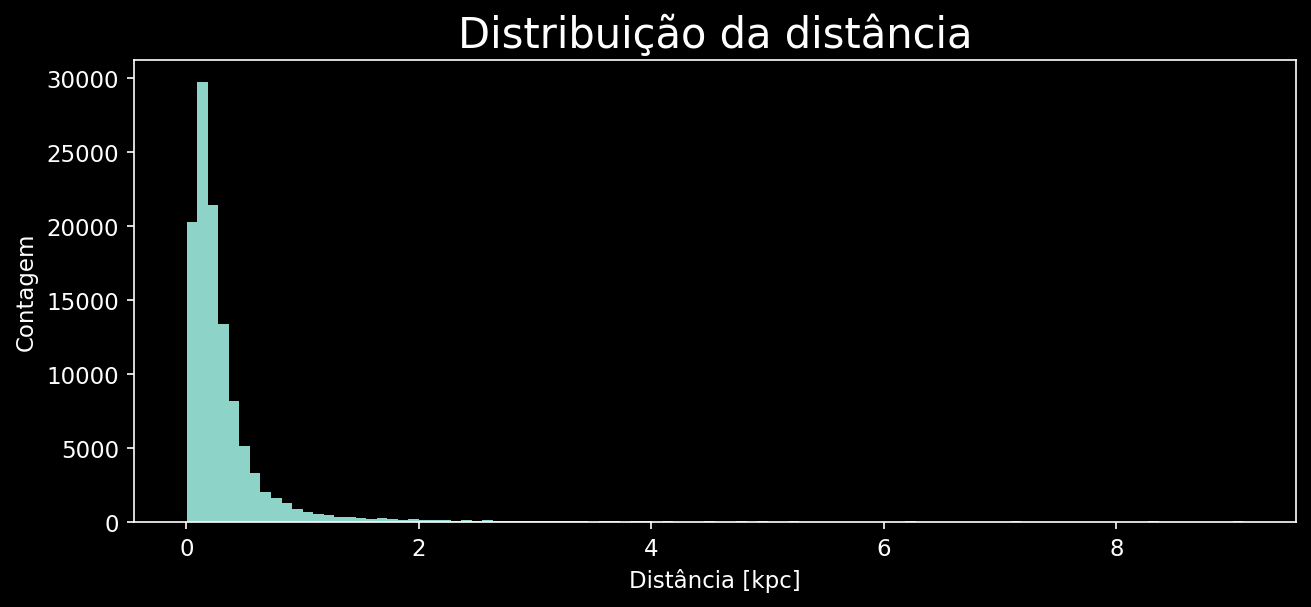

In [ ]:
plt.hist(df_par_corrigida['d'], bins = 100)
plt.title('Distribuição da distância')
plt.xlabel('Distância [kpc]')
plt.ylabel('Contagem')
plt.show()

Uma melhor visualização dos dados pode ser feita através do KDE plot.

- KDE plot: https://seaborn.pydata.org/generated/seaborn.kdeplot.html

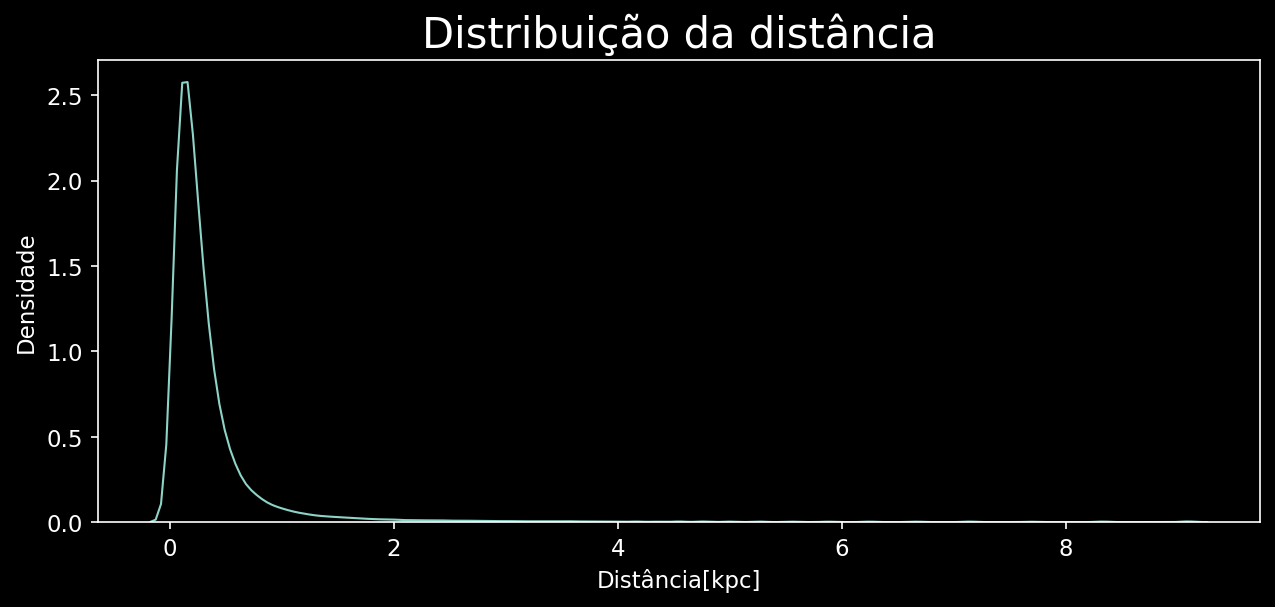

In [ ]:
sns.kdeplot(data = df_par_corrigida, x = 'd')
plt.title('Distribuição da distância')
plt.xlabel('Distância[kpc]')
plt.ylabel('Densidade')
plt.show()

E esta é uma distribuição bastante distorcida das distâncias envolvidas. A razão pelo que isso acontece é:

1. **Ângulo de Paralaxe Extremamente Pequeno:** À medida que a distância para uma estrela aumenta, o ângulo de paralaxe $π$ - aqui chamamos de $p$ - torna-se extremamente pequeno. Como a distância $𝑑$ é o inverso do ângulo de paralaxe, ângulos muito pequenos (próximos de zero) resultam em distâncias muito grandes. Essa relação não é linear, mas sim inversamente proporcional.

2. **Precisão das Medições:** Ângulos de paralaxe pequenos são mais difíceis de medir com precisão devido às limitações na precisão observacional. Isso pode levar a um viés onde pequenos erros na medição de ângulos muito pequenos podem afetar significativamente as distâncias calculadas, frequentemente superestimando a distância.

3. **Volume do Espaço:** O número de estrelas aumenta com a distância porque o volume do espaço sendo amostrado aumenta com o cubo da distância. Assim, estrelas mais distantes (com ângulos de paralaxe menores) serão mais numerosas, enviesando a distribuição.

Em resumo, quando os ângulos de paralaxe são extremamente pequenos, as distâncias resultantes são muito grandes, levando a uma distribuição enviesada das distâncias. Além disso, a precisão na medição desses ângulos pequenos afeta a precisão das distâncias, contribuindo ainda mais para esse viés.

## **4. Tipos Espectrais**

Tendo compreendido um dos principais atributos que ajudam os astrônomos a estudar as estrelas, exploramos agora outra propriedade das estrelas. Chamamos essa propriedade de “tipos espectrais” $^{[1]}$ e nos fornecem uma maneira de classificar estrelas com base em determinados critérios.

Os tipos espectrais (referidos como SpType no catálogo) de estrelas são uma forma de classificar estrelas, sendo as estrelas do tipo-O as mais quentes e as estrelas do tipo-M as mais frias.

Começamos examinando os tipos espectrais disponíveis nos dados do Hipparchos.

\

### **Bibliografia**:
- [1] Classificação estelar (tipos espectrais):  https://en.wikipedia.org/wiki/Stellar_classification

In [209]:
df_par_corrigida['SpType'].value_counts().count()

3849

Temos um problema agora. Vemos que existem cerca de 3.849 tipos de tipos espectrais.

Isso ocorre porque existem subclasses de estrelas dentro do tipo espectral medido dependendo de vários parâmetros (variabilidade, metalicidade, etc.) que estão além do escopo desta análise.

Traçar isso diretamente não nos dá muitas informações, como visto abaixo.

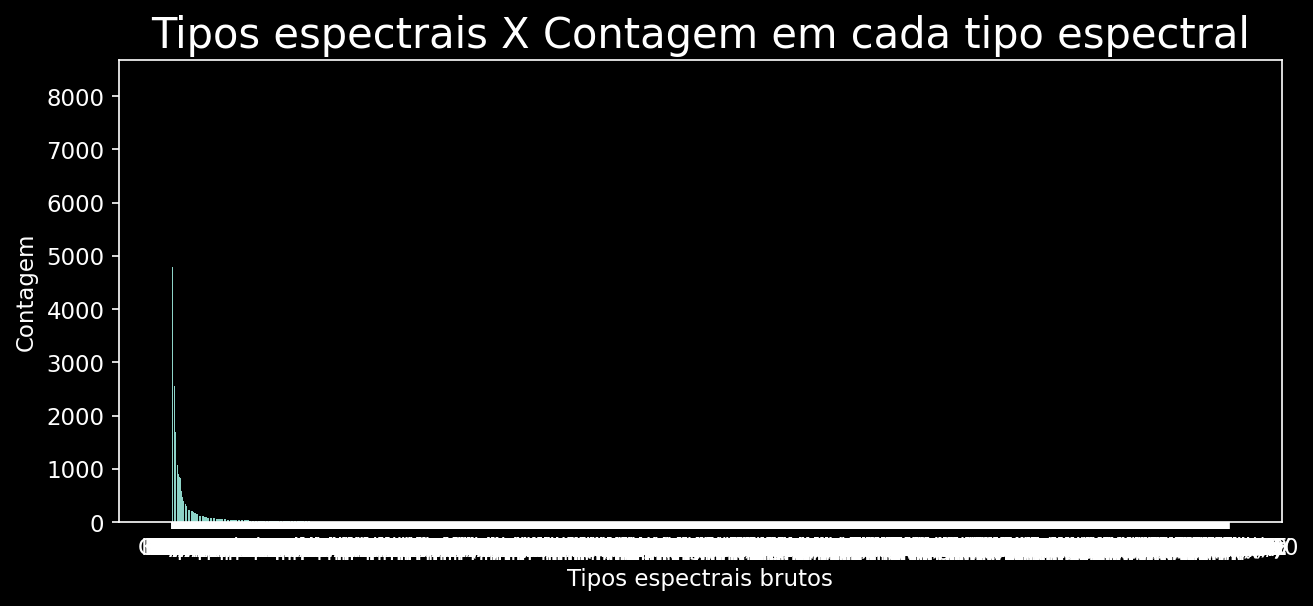

In [ ]:
plt.bar(df_par_corrigida['SpType'].value_counts().index, df_par_corrigida['SpType'].value_counts())
plt.xlabel('Tipos espectrais brutos')
plt.ylabel('Contagem')
plt.title('Tipos espectrais X Contagem em cada tipo espectral')
plt.show()

Como nossa tentativa de traçar os tipos espectrais brutos falhou miseravelmente, precisamos de uma maneira mais inteligente de obter as estatísticas que esperamos.

Para entender os tipos espectrais do catálogo, extraímos a primeira letra das informações do tipo espectral para ter uma ideia da frequência com que um tipo espectral aparece nos dados do catálogo.

Para isso, definimos uma função que pega o dicionário de tipos espectrais obtido acima e depois conta o número de estrelas em cada tipo espectral.

Tal função pode ser visualzada posteriormente para análise, se necessário.

Se necessário, acessar o arquivo falando sobre os tipos espectrais deixado na bibliografia deste capítulo.

In [ ]:
def get_sptype(sptype):
    O = B = A = F = G = K = M = 0
    # A função get_sptype é definida com um argumento sptype, que é um dicionário onde as chaves são tipos espectrais de estrelas e os valores são suas contagens.
    # As variáveis O, B, A, F, G, K e M são inicializadas com o valor 0. Essas variáveis vão armazenar a contagem total de estrelas para cada tipo espectral.
    for elemento in sptype.keys():
    # Um loop for é usado para iterar sobre todas as chaves (tipos espectrais) do dicionário sptype.
        if elemento[0] == 'O':
            O = O + sptype[elemento]
        elif elemento[0] == 'B':
            B = B + sptype[elemento]
        elif elemento[0] == 'A':
            A = A + sptype[elemento]
        elif elemento[0] == 'F':
            F = F + sptype[elemento]
        elif elemento[0] == 'G':
            G = G + sptype[elemento]
        elif elemento[0] == 'K':
            K = K + sptype[elemento]
        elif elemento[0] == 'M':
            M = M + sptype[elemento]
        # Para cada chave elemento, o código verifica a primeira letra do tipo espectral.
        # Dependendo dessa letra (O, B, A, F, G, K, M), a função adiciona o valor correspondente (ou seja, a contagem de estrelas desse tipo) à variável apropriada.
    return {'O': O, 'B': B, 'A': A, 'F': F, 'G': G, 'K': K, 'M': M}

In [ ]:
sptype = df_par_corrigida['SpType'].value_counts() # Conta a ocorrência de cada valor único na coluna 'SpType'.
                                                   # O resultado é um objeto Series do pandas onde o índice é o valor único (tipo espectral) e os valores são as contagens dessas ocorrências.
sptype = sptype.to_dict() # Converte a Series do pandas em um dicionário
sptype = get_sptype(sptype) # Aqui armazenamos o 'sptype' para a função estabelecida anteriormente
sptype

{'O': 181,
 'B': 9469,
 'A': 18191,
 'F': 25106,
 'G': 22250,
 'K': 30755,
 'M': 4405}

Agora colocamos os valores em um gráfico de barras verticais para ter uma ideia das contagens de cada um dos tipos espectrais no catálogo.

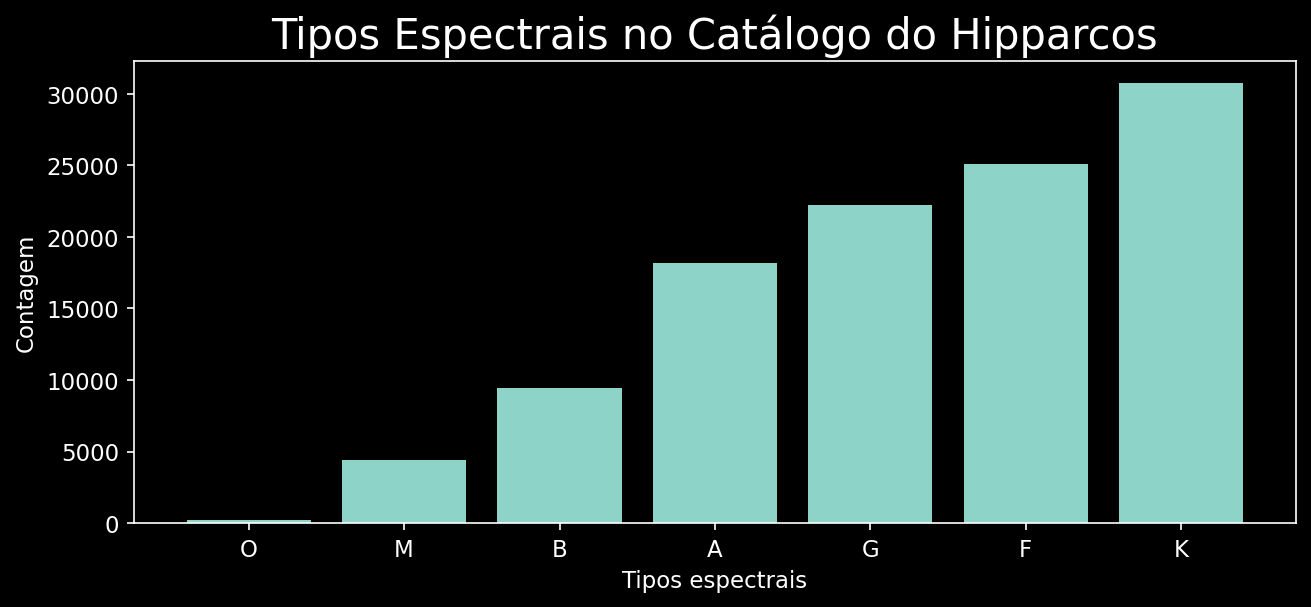

In [ ]:
tipos_espectrais = list(sptype.keys())
tipos_valores = list(sptype.values())

data_df = pd.DataFrame({'Spectral_type': tipos_espectrais,
                       'Type_counts': tipos_valores})
data_df = data_df.sort_values('Type_counts')

plt.bar(data_df['Spectral_type'], data_df['Type_counts'])
plt.xlabel('Tipos espectrais')
plt.ylabel('Contagem')
plt.title ('Tipos Espectrais no Catálogo do Hipparcos')
plt.show()

A população das estrelas mais quentes é bastante menor do que a população das estrelas mais frias, com exceção das estrelas da classe-M.

Pode ser isso uma falha ao observar as estrelas? Talvez a missão Hipparcos tenha sido direcionada para a população mais fria de estrelas. Ou existe uma ciência por trás dessa observação?

### **Vamos para a análise**

#### **População de Estrelas Quentes vs Estrelas Frias**

1. **Evolução Estelar:**

- **Estrelas Quentes (Massivas)**: As estrelas mais quentes, como as estrelas de tipo O e B, são muito massivas e têm vidas relativamente curtas. Elas queimam seu combustível nuclear rapidamente e evoluem para estágios finais, como supernovas, em milhões de anos. Devido à sua vida curta, elas são raras em comparação com estrelas menos massivas.

- **Estrelas Frias (Menos Massivas):** Estrelas como as de tipo K e M são menos massivas e têm vidas muito longas, muitas vezes bilhões de anos. Elas consomem seu combustível de forma muito mais lenta, permanecendo na sequência principal por um período muito maior. Isso faz com que sejam mais comuns, pois muitas delas ainda estão na fase inicial de sua vida.

\

2. **Observação e Catálogo de Estrelas:**

- **Missão Hipparcos:** A missão Hipparcos da ESA foi uma missão de astrometria que observou estrelas relativamente próximas e brilhantes. Embora tenha sido uma missão abrangente, sua amostra é limitada a estrelas visíveis em uma determinada faixa de magnitude e distância.

- **Bias Observacional:** Pode haver um viés observacional na missão Hipparcos que favorece a observação de estrelas mais frias e menos massivas, pois elas são mais numerosas e estão distribuídas mais uniformemente pelo céu.

\

#### **Estrelas da Classe-M**

**Número Baixo de Estrelas do Tipo-M:**
- **Eficiência de Observação:** Apesar das estrelas do tipo-M serem as mais comuns no universo, elas são também menos luminosas e mais difíceis de observar a grandes distâncias. A missão Hipparcos, por exemplo, pode ter tido limitações em detectar estrelas do tipo-M devido à sua baixa luminosidade.

- **Metodologia da Missão:** A metodologia da missão pode ter sido direcionada para estrelas mais brilhantes e mais facilmente detectáveis, como as de tipo F, G e K.

\

#### **Conclusão**
A menor população observada de estrelas quentes em comparação com estrelas frias é principalmente devido à ciência por trás da evolução estelar. Estrelas quentes vivem por períodos curtos e, portanto, são menos numerosas. A distribuição de estrelas observada pela missão Hipparcos também pode refletir um viés observacional e limitações na detecção de estrelas muito frias e pouco luminosas, como as de tipo-M. Portanto, não se trata necessariamente de uma falha na observação, mas sim das propriedades intrínsecas das estrelas e das limitações tecnológicas da missão de observação.

## **5. Tipos espectrais junto com classes de luminosidade**

Para obter uma compreensão mais profunda dos tipos espectrais, aprofundamos-nos um passo em nossas classes espectrais. Se você olhar de perto, cada tipo espectral tem um número associado como o segundo caractere. Esta é mais uma subclassificação de estrelas e na astronomia moderna, esses dois caracteres são chamados coletivamente de tipo espectral. Por exemplo, o nosso Sol numa estrela G5, etc. Além disso, estes números variam de 0 a 9.

Você deve alterar o argumento que acompanha a função $startwith()$ para outros tipos espectrais e verificar se este é realmente o caso para todos os tipos espectrais.

In [ ]:
sptype = df_par_corrigida['SpType'].value_counts()

a_list = []
for key in sptype.keys():
    if key.startswith('A'):
        a_list.append(key)

a_list = set(a_list)
print(a_list)

{'A1Vn...', 'Ap', 'A9Ia', 'A0p:', 'A1p SrCrEu', 'A3m', 'A6/A7', 'A9III/IV', 'A3...', 'A2/A3IV:', 'A2/A3IV/V', 'A7IVvar+...', 'A4V+...', 'A6/A7IV/V', 'A1spe...', 'A3IVs', 'A8II', 'A1III/IVm..', 'A0V-A3V', 'A9:+...', 'A6/A7III/IV', 'A2/3V +A9/F0', 'A9.7', 'A0IVs', 'A3Vp...', 'A8Vs', 'A3III:', 'A2/3III(m)', 'A1III/IV', 'A5/7V (+F)', 'A4me...', 'A5/7V(m)', 'A1mA7-F0', 'A0V SB', 'A1II/III', 'A8w', 'A0sh', 'A8/A9III:', 'A8p', 'A9V', 'A7/A8III/IV', 'A2mA5-A9', 'A2Vn...', 'A3', 'A6/A7V:', 'A7 + F', 'A7IIIp d Del', 'A4IIIn', 'A4IVs', 'A5V comp', 'A2IIIm...', 'A8V SB', 'A0Vn...', 'Ap CrEu', 'A5:m...', 'A2III', 'A5/7III(m)', 'A9/F0III/IV', 'A7m', 'A2Vnn', 'A7/A8IVm...', 'Ap SrEu(Cr)', 'A9/F0IV', 'A0pshe', 'A2/A3V+...', 'A5/A8m...', 'Ap SrCrEu', 'A6Ib', 'A1Vp...', 'A5p...', 'A9IIIm...', 'A9IVm', 'A5me del Del', 'Ap SrEuCr', 'A2II-III', 'A3V: + F9V', 'A7III/IV', 'A7p', 'A7s', 'A7Vn', 'A2IV(m)', 'A1', 'A3IV:', 'A6II', 'A5IVp...', 'A5II', 'A2/A3III:', 'A8/A9V', 'A1V + (F)', 'A6/A7V', 'A8/A9II', 'A3Ia

Veremos agora a distribuição das estrelas dentro de um determinado tipo espectral.

A função que faz esse trabalho para nós segue a mesma lógica da função acima, com algumas verificações adicionais.

In [ ]:
# Criamos uma função para agrupar as contagens de tipos espectrais em subclasses
def get_new_sptype(sptype, spclass):
    classe_0 = classe_1 = classe_2 = classe_3 = classe_4 = classe_5 = classe_6 = classe_7 = classe_8 = classe_9 =0
    for elemento in sptype.keys():
        if len(elemento) == 1:
            continue
        if elemento[0] == spclass:
            # Verifica se o segundo caractere da chave é um dígito (de '0' a '9').
            # .ord() converte o caractere em seu valor ASCII, onde os dígitos de '0' a '9' têm valores ASCII de 48 a 57.
            if (ord(elemento[1]) >= 48 and ord(elemento[1]) <= 57):
                if elemento[1] == '0':
                    classe_0 = classe_0 + sptype[elemento]
                if elemento[1] == '1':
                    classe_1 = classe_1 + sptype[elemento]
                if elemento[1] == '2':
                    classe_2 = classe_2 + sptype[elemento]
                if elemento[1] == '3':
                    classe_3 = classe_3 + sptype[elemento]
                if elemento[1] == '4':
                    classe_4 = classe_4 + sptype[elemento]
                if elemento[1] == '5':
                    classe_5 = classe_5 + sptype[elemento]
                if elemento[1] == '6':
                    classe_6 = classe_6 + sptype[elemento]
                if elemento[1] == '7':
                    classe_7 = classe_7 + sptype[elemento]
                if elemento[1] == '8':
                    classe_8 = classe_8 + sptype[elemento]
                if elemento[1] == '9':
                    classe_9 = classe_9 + sptype[elemento]

    return {'classe0': classe_0, 'classe1': classe_1, 'classe2': classe_2, 'classe3': classe_3, 'classe4': classe_4, 'classe5': classe_5, 'classe6': classe_6, 'classe7': classe_7, 'classe8': classe_8, 'classe9': classe_9}

In [ ]:
sptype = df_par_corrigida['SpType'].value_counts()
sptype = sptype.to_dict()
sptype = get_new_sptype(sptype, 'A')

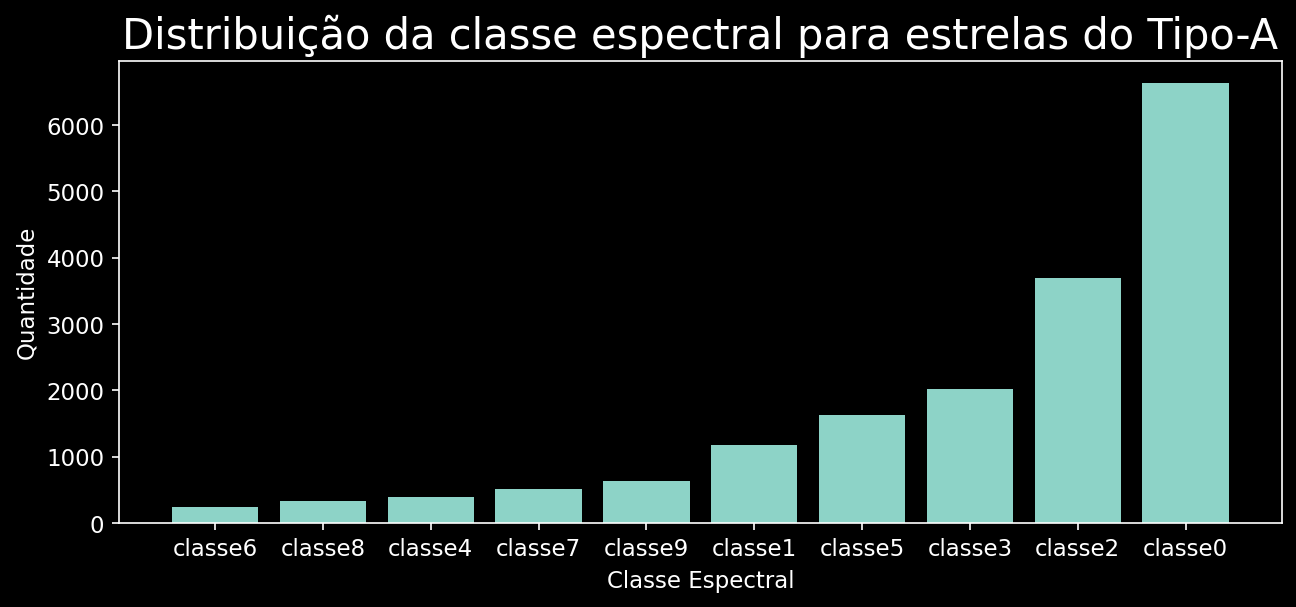

In [ ]:
spectral_types = list(sptype.keys())
type_values = list(sptype.values())
data_df = pd.DataFrame({'Spectral_type': spectral_types,
                       'Type_counts': type_values})
data_df = data_df.sort_values('Type_counts')
plt.bar(data_df['Spectral_type'], data_df['Type_counts'])
plt.xlabel('Classe Espectral')
plt.ylabel('Quantidade')
plt.title ('Distribuição da classe espectral para estrelas do Tipo-A')
plt.show()

Vemos uma distribuição justa de classes espectrais dentro das estrelas do Tipo-A no catálogo. Agora realizamos uma distribuição semelhante para todos os tipos espectrais, ou seja, do tipo espectral 'O' ao tipo espectral 'M', com as estrelas do tipo O sendo as mais quentes e as mais luminosas e as estrelas do tipo M sendo as mais frias e as menos luminosas.


### *Por que a quantidade diminui gradualmente em direção às estrelas menos brilhantes? Considerando classe 0 como as estrelas mais brilhantes e classe 9 como as menos brilhantes*

#### **Luminosidade e Sequência Espectral**

1. **Sequência de Luminosidade:**

- Dentro de um tipo espectral específico (como A, F, G, etc.), as estrelas são classificadas em subclasses de 0 a 9, com 0 sendo as mais brilhantes e 9 as menos brilhantes.

- Essa classificação indica a luminosidade e a temperatura da estrela, onde uma estrela de classe 0 é mais quente e brilhante do que uma estrela de classe 9 do mesmo tipo espectral.

\

2. **Distribuição de Estrelas por Luminosidade:**

- **Estrelas Mais Brilhantes:** As estrelas mais brilhantes de uma dada classe espectral (classe 0) são mais massivas e têm luminosidade maior. No entanto, essas estrelas também são mais raras. Isso ocorre porque estrelas massivas são menos comuns devido à distribuição inicial de massas estelares (função de massa inicial) e porque elas evoluem rapidamente para outras fases de suas vidas (como gigantes ou supernovas).

- **Estrelas Menos Brilhantes:** À medida que descemos na sequência de luminosidade (em direção à classe 9), encontramos estrelas menos massivas e menos luminosas. Essas estrelas são mais comuns porque estrelas de menor massa são mais abundantes no universo. No entanto, a diminuição gradual no número de estrelas menos brilhantes pode ser observada devido a uma combinação de fatores como:
 - **Sensibilidade de Detecção:** Estrelas menos brilhantes são mais difíceis de detectar, especialmente a grandes distâncias. A sensibilidade dos instrumentos de observação pode limitar a detecção de estrelas de classe 9.
 - **Volume Amostral:** Em um determinado volume de espaço, a amostra de estrelas pode não ser grande o suficiente para representar a verdadeira distribuição de estrelas menos luminosas. Isso pode levar a uma observação aparente de menos estrelas de classe 9.


### **Desvio para o Vermelho (Redshift) e Desvio para o Azul (Blueshift)**


1. **Desvio para o Vermelho (Redshift):**

- O desvio para o vermelho ocorre quando a luz de um objeto astronômico é esticada para comprimentos de onda mais longos, ou seja, deslocada para o vermelho do espectro.
- Isso acontece principalmente devido à expansão do universo. Quando um objeto está se afastando de nós, suas ondas de luz são esticadas, resultando em um desvio para o vermelho.
- Estrelas e galáxias que estão mais distantes de nós geralmente mostram um desvio para o vermelho maior devido ao efeito Doppler causado pela expansão do universo.

2. **Desvio para o Azul (Blueshift):**

- O desvio para o azul ocorre quando a luz de um objeto é comprimida para comprimentos de onda mais curtos, ou seja, deslocada para o azul do espectro.
- Isso acontece quando um objeto está se aproximando de nós. Suas ondas de luz são comprimidas, resultando em um desvio para o azul.

\

### **Aplicação às Estrelas**

- **Estrelas Próximas:** As estrelas mais próximas de nós não necessariamente têm um desvio para o vermelho ou para o azul significativo apenas devido à proximidade. Seu movimento relativo em relação a nós determina se elas apresentam desvio para o vermelho ou para o azul.

 - Se uma estrela está se aproximando de nós, ela mostrará um desvio para o azul.
 - Se uma estrela está se afastando de nós, ela mostrará um desvio para o vermelho.

- **Estrelas Distantes:** Para estrelas e galáxias muito distantes, a expansão do universo geralmente resulta em um desvio para o vermelho. Quanto mais distante o objeto, maior é o desvio para o vermelho devido à taxa de expansão do universo.

In [ ]:
spectral_type = ['O', 'B', 'A', 'F', 'G', 'K', 'M']
spectral_class = []
sptype = df_par_corrigida['SpType'].value_counts()
sptype = sptype.to_dict()

for sp_type in spectral_type:
    sptype_count = get_new_sptype(sptype, sp_type)
    spectral_class.append(sptype_count)

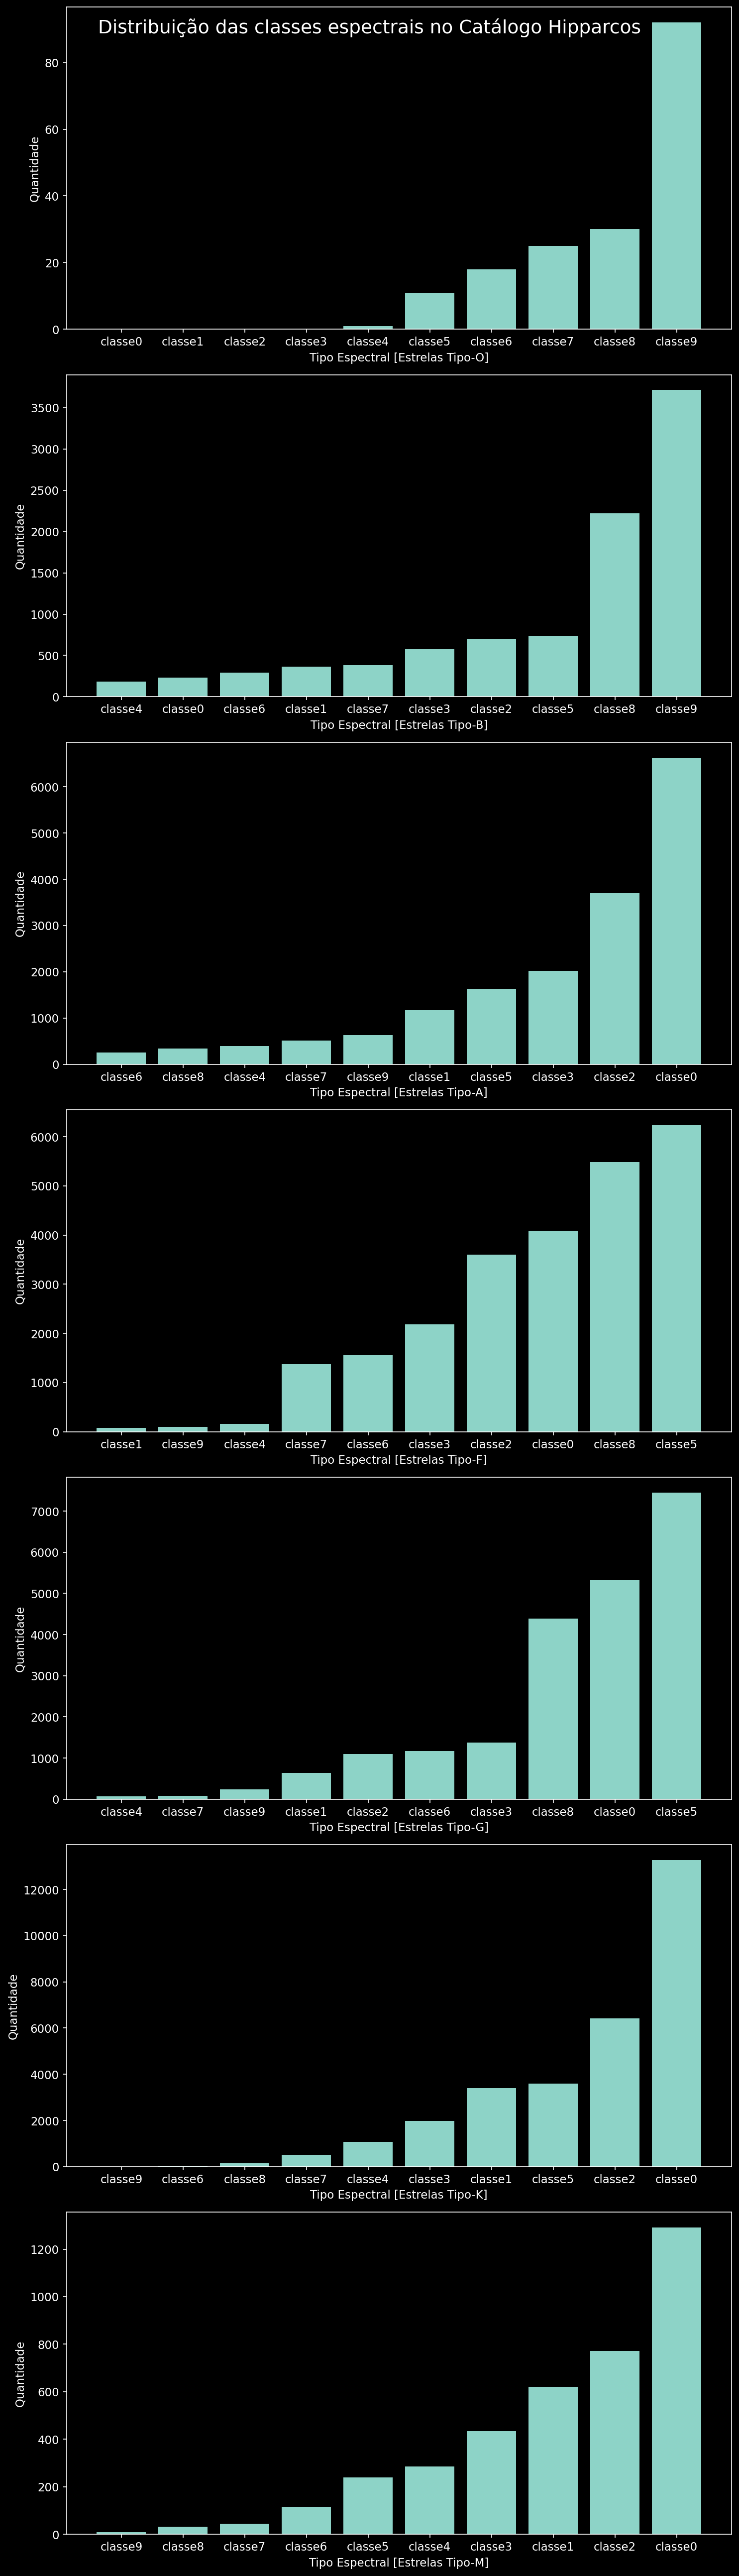

In [ ]:
fig, ax = plt.subplots(7, 1, figsize = (10, 35))
fig.suptitle('Distribuição das classes espectrais no Catálogo Hipparcos', fontsize = 18,
             ha = 'center')
plt_position = 0
spec_label = ['Estrelas Tipo-O', 'Estrelas Tipo-B', 'Estrelas Tipo-A', 'Estrelas Tipo-F', 'Estrelas Tipo-G',
              'Estrelas Tipo-K', 'Estrelas Tipo-M']

for elemento in spectral_class:
    spectral_types = list(elemento.keys())
    type_values = list(elemento.values())
    data_df = pd.DataFrame({'Spectral_type': spectral_types,
                            'Type_counts': type_values})
    data_df = data_df.sort_values('Type_counts')
    ax[plt_position].bar(data_df['Spectral_type'], data_df['Type_counts'])
    ax[plt_position].set_xlabel('Tipo Espectral [{}]'.format(spec_label[plt_position]))
    ax[plt_position].set_ylabel('Quantidade')
    plt_position += 1

plt.tight_layout()
plt.show()

## **6. O sistema de magnitude na Astronomia**

Há diferentes tipos de magnitude usados na Astronomia. O primeiro deles é o `vmag` ou a magnitude visual de uma estrela.

As estrelas no céu são designadas por um número que nos diz com que facilidade uma estrela pode ser vista no céu. Por razões históricas, a magnitude é definida de tal forma que quanto menor o valor do vmag, mais brilhante é a estrela. Além disso, estas magnitudes são o que chamamos de magnitudes aparentes das estrelas devido ao fato de estes valores da vmag serem observados pelo telescópio. Existe uma maneira de converter magnitudes aparentes em magnitudes absolutas, algo que será feito mais tarde.

Por enquanto, observaremos a distribuição do vmag. Fazemos isso usando um histograma.

Text(0.5, 1.0, 'Distribuição da magnitude visual aparente')

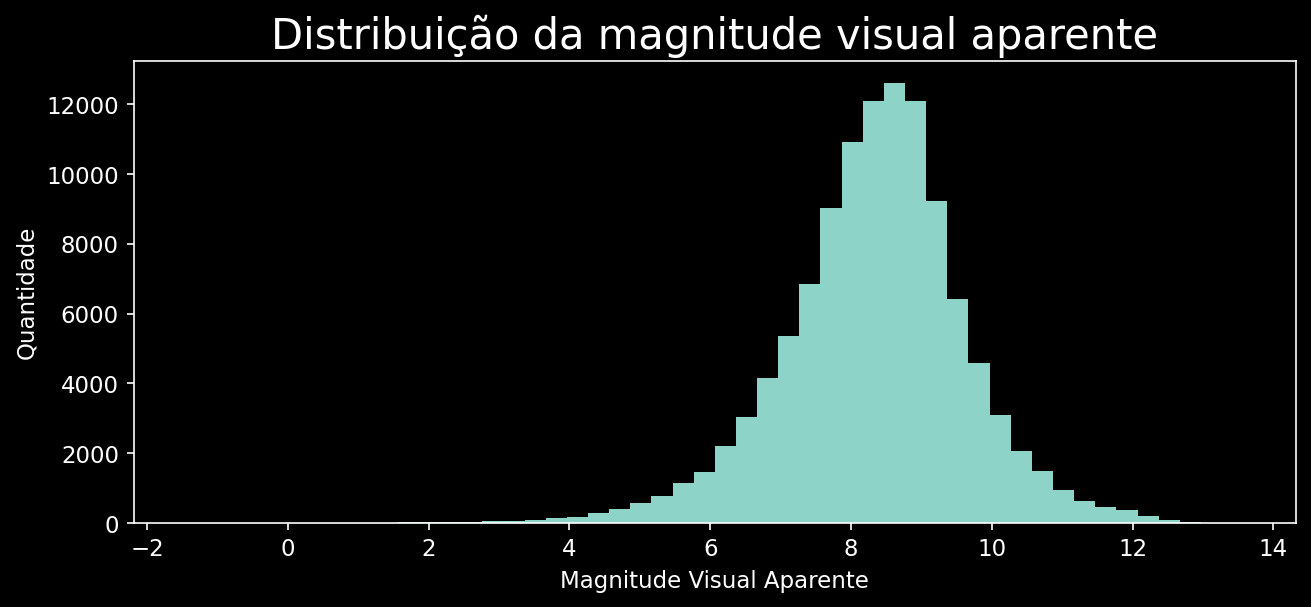

In [ ]:
plt.hist(df_par_corrigida['Vmag'], bins = 50)
plt.xlabel('Magnitude Visual Aparente')
plt.ylabel('Quantidade')
plt.title('Distribuição da magnitude visual aparente')

Vemos que a distribuição atinge o pico em torno de 8. O telescópio fez um bom trabalho ao encontrar as estrelas que são mais difíceis de ver, uma vez que estrelas com vmag > 6 são aquelas que não podem ser vistas a olho nu.

Esta é uma prova visual de como os telescópios mudaram drasticamente o campo da Astronomia desde séc. XVI, quando Galileu introduziu os telescópios. Além disso, os poderes computacionais atuais e os desenvolvimentos da eletrônica para melhor lidar com os telescópios, a principal razão pela qual os telescópios revolucionaram o campo é devido ao seu poder de capturar estrelas super fracas.

O catálogo mais recente publicado por Gaia chamado Gaia DR3 (Data Release 3) tem as estrelas mais fracas com um vmag de ~21. Estas estrelas são surpreendentemente fracas quando comparadas com as estrelas com vmag do catálogo Hipparchos. Enfim, de volta ao catálogo Hipparchos.

Os outros sistemas de magnitude disponíveis no catálogo Hipparchos são os seguintes,

- BTmag: Magnitude média de BT
- VTmag: Magnitude média do VT
- Hpmag: A magnitude média no catálogo Hipparcos

Verificamos agora a distribuição destes sistemas de magnitude no catálogo.

Text(0.5, 1.0, 'Distribuição da magnitude visual aparente BT')

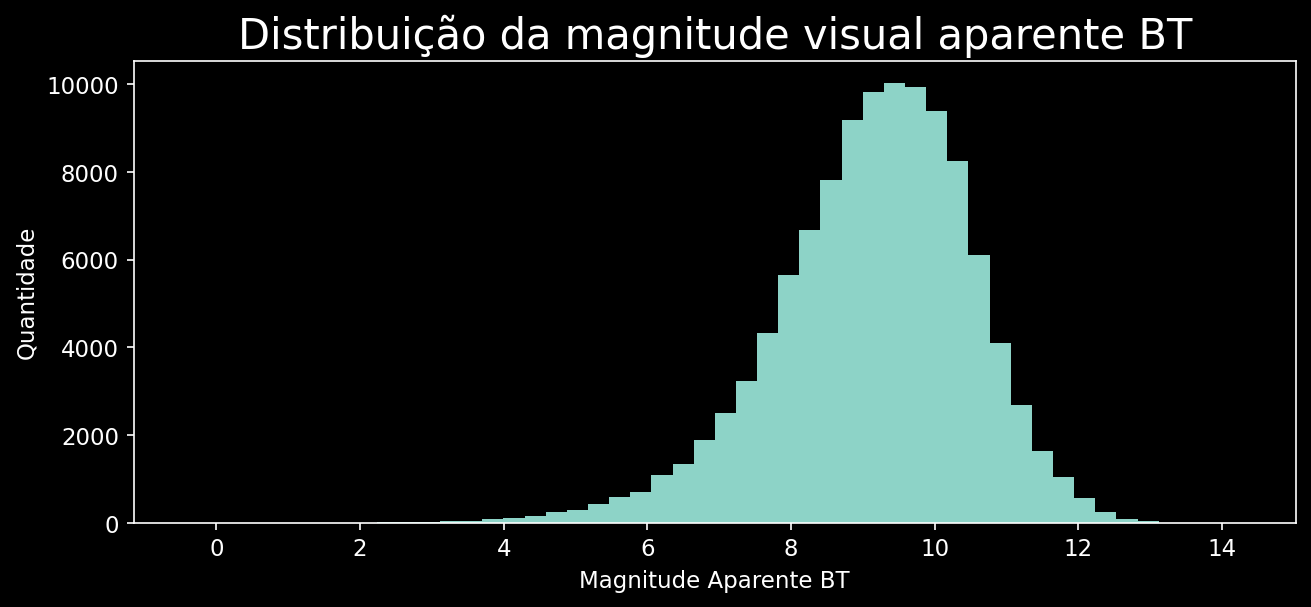

In [ ]:
plt.hist(df_par_corrigida['BTmag'], bins = 50)
plt.xlabel('Magnitude Aparente BT')
plt.ylabel('Quantidade')
plt.title('Distribuição da magnitude visual aparente BT')

A magnitude do BT atinge um pico próximo a 9, o que também é um feito a ser apreciado.

Text(0.5, 1.0, 'Distribuição da magnitude visual aparente VT')

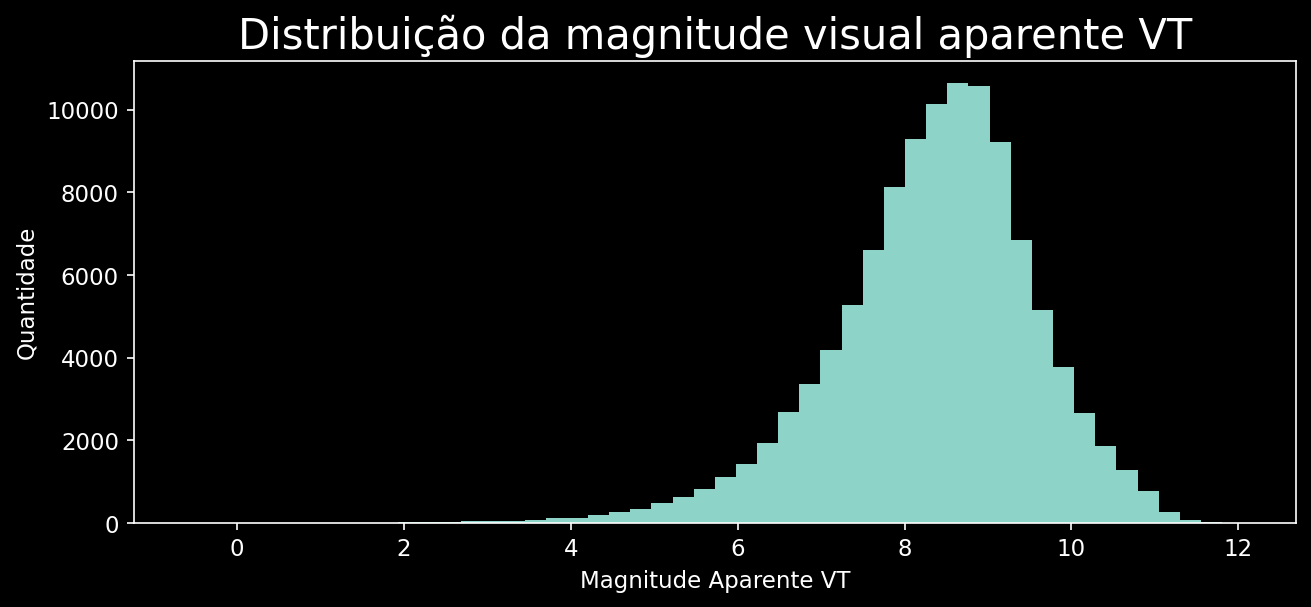

In [ ]:
plt.hist(df_par_corrigida['VTmag'], bins = 50)
plt.xlabel('Magnitude Aparente VT')
plt.ylabel('Quantidade')
plt.title('Distribuição da magnitude visual aparente VT')

Text(0.5, 1.0, 'Distribuição da magnitude visual aparente HP')

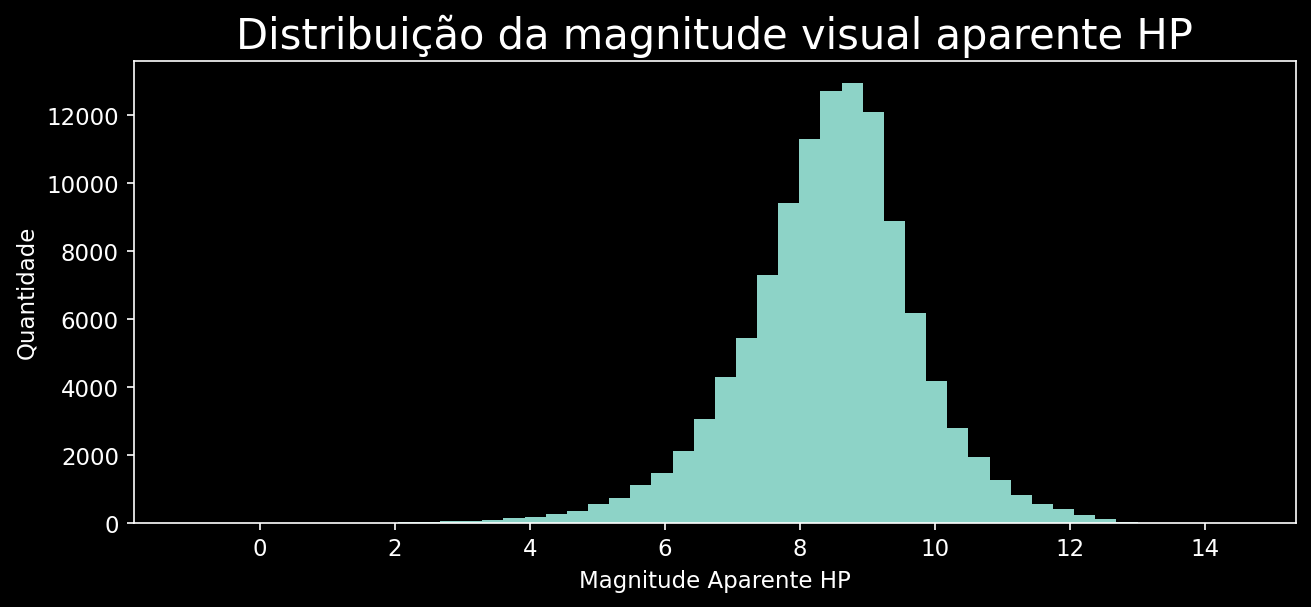

In [ ]:
plt.hist(df_par_corrigida['Hpmag'], bins = 50)
plt.xlabel('Magnitude Aparente HP')
plt.ylabel('Quantidade')
plt.title('Distribuição da magnitude visual aparente HP')

A magnitude do HP atinge um pico próximo a 8 novamente.



Text(0.5, 1.0, 'Distribuição da magnitude visual aparente (Cumulativo)')

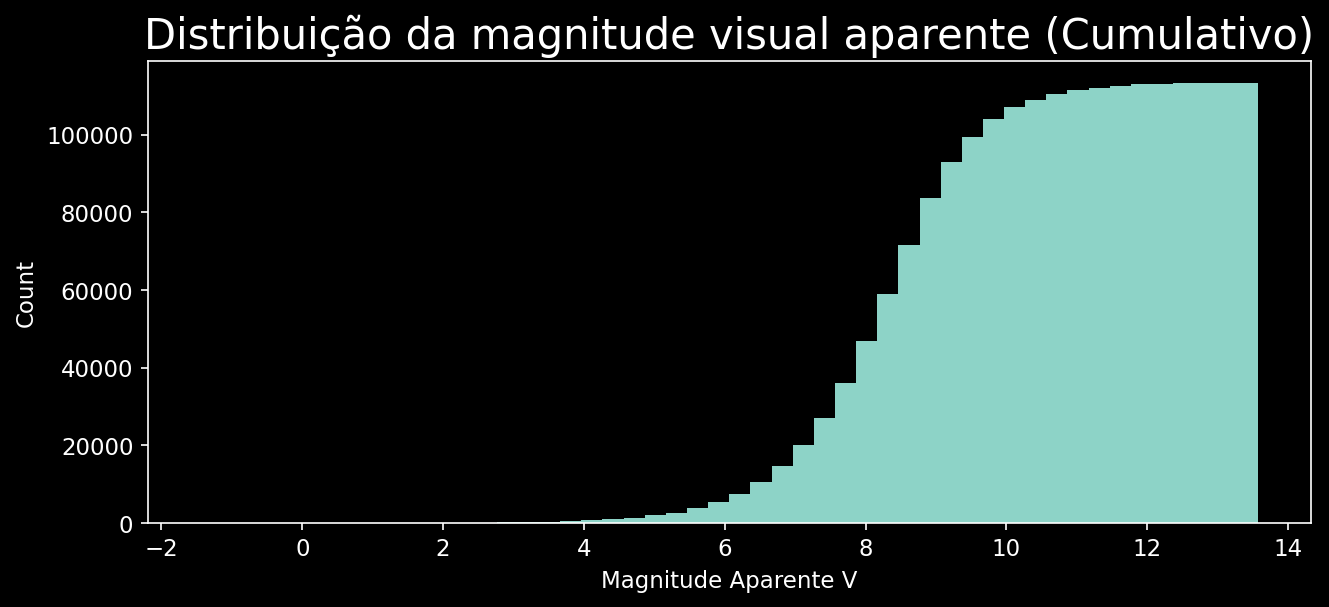

In [ ]:
plt.hist(df_par_corrigida['Vmag'], bins = 50, cumulative = True)
plt.xlabel('Magnitude Aparente V')
plt.ylabel('Count')
plt.title('Distribuição da magnitude visual aparente (Cumulativo)')

Na prática, um grande número de estrelas é estudado e uma distribuição cumulativa das estrelas é traçada.

A inclinação da curva está diretamente relacionada à densidade numérica das estrelas, o que por sua vez nos ajuda a fazer Cosmologia. Isso ajuda os astrônomos a verificar o princípio cosmológico.

\

### **Bibliografia**:

- Princípio Cosmológico: https://en.wikipedia.org/wiki/Cosmological_principle#:~:text=In%20modern%20physical%20cosmology%2C%20the,should%2C%20therefore%2C%20produce%20no%20observable

## **7. Estrelas Variáveis**

Uma estrela variável é uma estrela cuja magnitude aparente varia ao longo de um período de tempo. Estas estrelas são caracterizadas pelo seu período de variabilidade que pode variar de algumas horas a alguns dias ou mesmo a alguns anos, dependendo do tipo e da história de evolução da estrela que estamos a observar.

O catálogo Hippachos também captura estrelas variáveis ​​e a coluna `period` nos dá o período de variabilidade em dias. O gráfico abaixo nos mostra a distribuição dessas estrelas variáveis ​​nos dados observacionais.

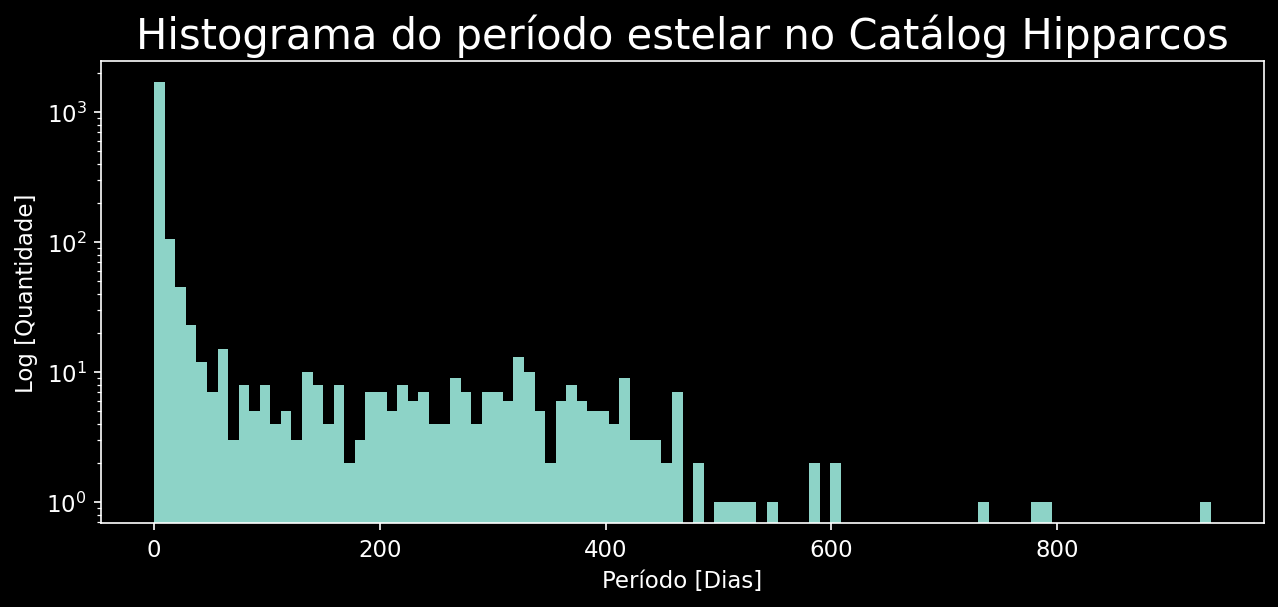

In [ ]:
plt.hist(df_par_corrigida['Period'], bins = 100, log = True)
plt.xlabel('Período [Dias]')
plt.ylabel('Log [Quantidade]')
plt.title('Histograma do período estelar no Catálog Hipparcos')
plt.show()

Vemos que a maioria das estrelas tem um período de variabilidade inferior a 400 dias. Vemos cada vez menos estrelas no final do período. Além disso, observamos que o histograma atinge um pico num período de variabilidade de 0, o que indica que a maioria das estrelas no catálogo não são estrelas variáveis.

Relacionado à noção de variabilidade das estrelas, os astrônomos frequentemente dividem as estrelas em diferentes tipos de classes de variabilidade. Estes dados nos ajudam a diferenciar o tipo de estrelas variáveis ​​e, assim, ajudam a compreender os percursos evolutivos destas estrelas. Lembramos que depois que a sequência principal chega ao fim, as estrelas podem estar em qualquer uma das trilhas evolutivas caracterizadas por características diferentes.

Vemos agora a distribuição da variabilidade das estrelas.

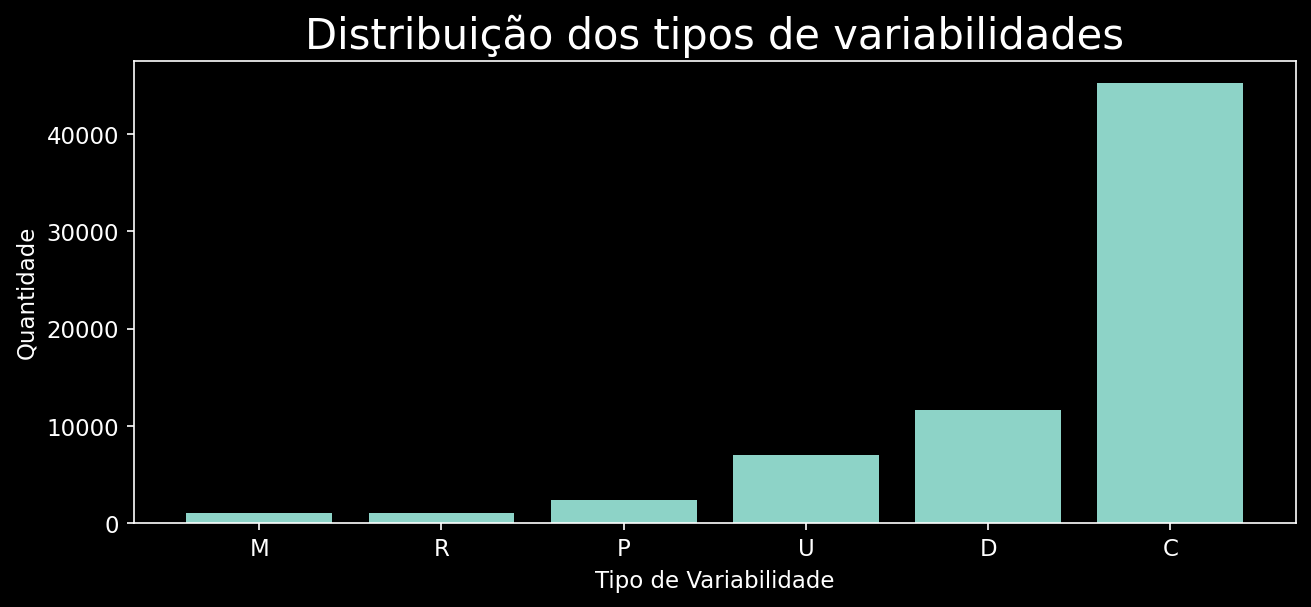

In [ ]:
sources = df_par_corrigida['HvarType'].value_counts().index
count = df_par_corrigida['HvarType'].value_counts().values
data_df = pd.DataFrame({'sources': sources,
                       'sources_count': count})
data_df = data_df.sort_values('sources_count')
plt.bar(data_df['sources'], data_df['sources_count'])
plt.xlabel('Tipo de Variabilidade')
plt.ylabel('Quantidade')
plt.title('Distribuição dos tipos de variabilidades')
plt.show()

Os tipos de variabilidade significam o seguinte:

- C: nenhuma variabilidade detectada ('constante')

- D: variabilidade induzida por duplicidade

- M: possivelmente microvariável, com amplitude < 0,03 mag (estrelas classificadas com alta confiança como microvariável são sinalizadas como U)

- P: variável periódica

- R: o índice de cores V-I foi revisado durante a análise de variabilidade

- U : variável não resolvida que não se enquadra nas demais categorias; esta classe também inclui variáveis ​​irregulares ou semirregulares e possivelmente variáveis ​​com amplitude > ou ~ 0,03 mag

Isto está alinhado com o que observamos no histograma de variabilidade, onde a maioria das estrelas foram vistas como aquelas que não são variáveis ​​(Tipo C: nenhuma variabilidade detectada)

\

### **Bibliografia**

- Estrela Variável: https://en.wikipedia.org/wiki/Variable_star

## **8. O Diagrama de RH**

Tendo compreendido a magnitude das estrelas e como elas estão distribuídas no espaço (a partir dos dados observacionais de Hipparcos, é claro), voltamo-nos agora para o que é chamado de *diagrama de Hertzsprung-Russell* ou simplesmente diagrama HR em Astronomia.

O diagrama HR é um gráfico que mostra uma população de estrelas relacionando suas magnitudes ou luminosidades absolutas com suas temperaturas efetivas. Como obter as temperaturas geralmente é uma tarefa difícil e os astrônomos gostam de seguir o caminho mais fácil, i.e, traçamos uma variação do diagrama HR chamada diagrama de magnitude de cor.

Antes de prosseguir com o diagrama HR, vamos primeiro entender a noção de magnitude absoluta e o índice de cores.

### **8.1 Magnitude absoluta e índice de cores**

**Magnitude absoluta:** A magnitude absoluta é definida como a magnitude de um objeto quando observado a uma distância padrão de 10 parsecs. A magnitude absoluta é obtida a partir da magnitude aparente usando a relação abaixo,

$M=m−5×log_{10}(d_{pc})+5=m−5×(log_{10}(d_{pc})+1)$

onde o termo $5×(log_{10}(d_{pc})+1)$
 é chamado de módulo de distância e é denotado por $μ$
 . Portanto, a magnitude absoluta de um objeto poderia ser escrita como,

$M=m−μ$

\

**Índice de cores:** Compreender o índice de cores pode ser complicado para começar. Tecnicamente falando, os telescópios observam objetos usando filtros e a cor de um objeto é a diferença nas magnitudes aparentes entre qualquer um desses filtros. O índice de cores em Astronomia determina a cor de um objeto e é obtido tomando sistematicamente as diferenças entre várias magnitudes. No catálogo hipparcos estão disponíveis as cores abaixo,

- Cor B-V
- Cor V-I

No gráfico abaixo, foi considerado a cor B-V dos objetos no sistema fotométrico UBV.

Antes de prosseguirmos com a plotagem do diagrama HR, devemos fazer algumas verificações de sanidade para que o gráfico fique o mais limpo possível. As únicas verificações de integridade necessárias aqui são garantir que o campo Vmag no catálogo e o índice de cores B-V não tenham valores nulos.

\

### **Bibliografia**:
- Filtros astronômicos: https://en.wikipedia.org/w/index.php?title=Astronomical_filter&oldid=1228168063
- Sistema fotométrico UVB: https://en.wikipedia.org/wiki/UBV_photometric_system

In [ ]:
df_par_corrigida['Vmag'].isna().sum()

0

In [ ]:
df_par_corrigida['B-V'].isna().sum()

883

Vemos que a coluna Vmag não possui valores nulos, enquanto a coluna de cores B-V possui valores nulos que devem ser removidos para um gráfico mais limpo.

In [ ]:
df_cor_corrigida = df_par_corrigida[df_par_corrigida['B-V'].notna()]
df_cor_corrigida.shape

(112395, 79)

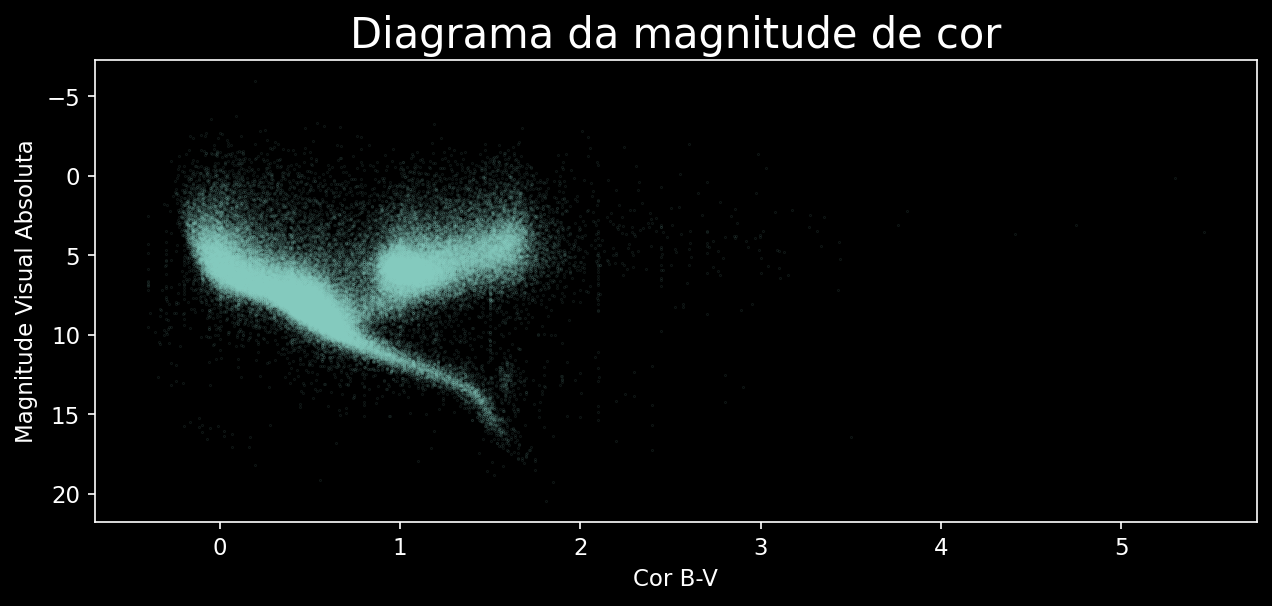

In [ ]:
distancia = df_cor_corrigida['d'] * 1000 # Obtém a distância em parsecs
modulo_da_distancia = 5 * (np.log10(distancia / 10) - 1) # Calcula o módulo da distância
mag_v_abs = df_cor_corrigida['Vmag'] - modulo_da_distancia # Obtém a magnitude visual absoluta das fontes

plt.plot(df_cor_corrigida['B-V'], mag_v_abs, marker = '.', linestyle = 'none', alpha = 0.3, markersize = 0.3)
plt.gca().invert_yaxis()
plt.xlabel('Cor B-V')
plt.ylabel('Magnitude Visual Absoluta')
plt.title('Diagrama da magnitude de cor')
plt.show()

O gráfico acima nos mostra uma sequência principal distinta, um corte claro da sequência principal e um ramo gigante distinto. Isto é verdade para qualquer população arbitrária de estrelas e ajuda os astrónomos a estudar aglomerados estelares em detalhe.

Vamos agora traçar o diagrama HR, ou seja, o gráfico da magnitude absoluta com a temperatura efetiva. Conforme mencionado anteriormente, é difícil calcular a temperatura efetiva. Calculamos a temperatura efetiva usando a *fórmula de Ballesteros*.

$$ T = 4600K \left( \frac{1}{0.92.(B - V) + 1.7} + {\frac{1}{1.5.(B - V) + 0.62}} \right) $$


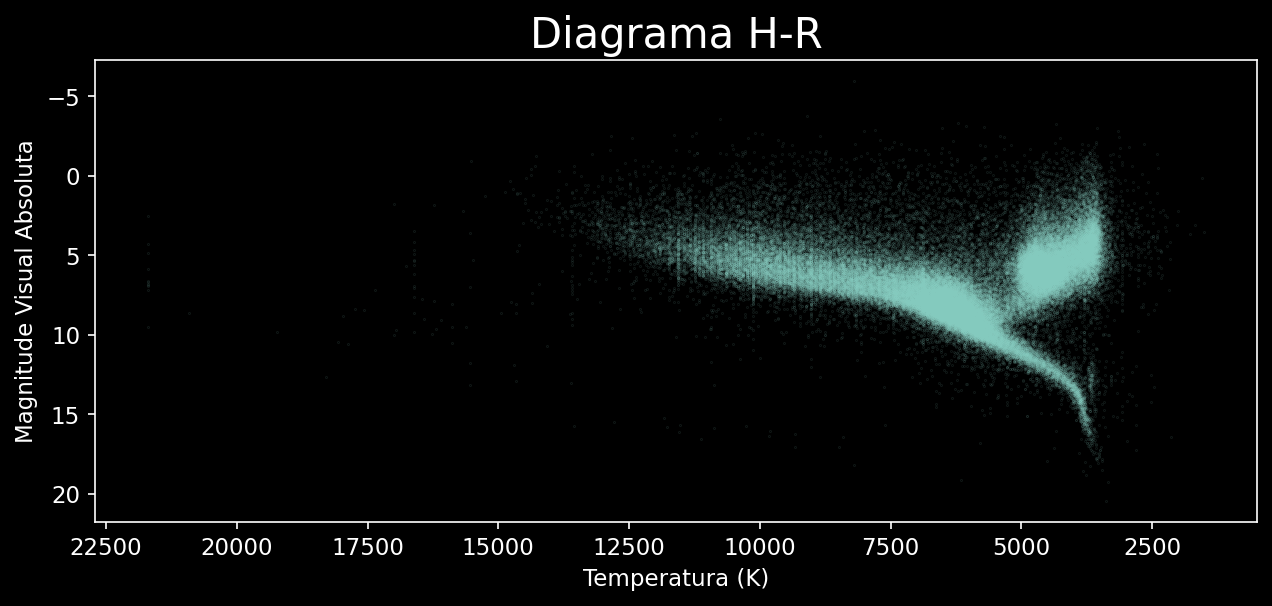

In [ ]:
temperatura = 4600 * (1 / (0.92 * df_cor_corrigida['B-V'] + 1.7) + 1/(0.92 * df_cor_corrigida['B-V'] + 0.62)) # Fórmula de Ballesteros
plt.plot(temperatura, mag_v_abs, marker = '.', linestyle = 'none', alpha = 0.3, markersize = 0.3)
plt.xlabel('Temperatura (K)')
plt.ylabel('Magnitude Visual Absoluta')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.title('Diagrama H-R')
plt.show()

Como esperado, vemos um gráfico muito semelhante ao obtido com o diagrama de magnitude de cor acima.

Agora obteremos o diagrama de magnitude de cores e o diagrama H-R usando a cor V-I e a magnitude visual.

In [ ]:
df_par_corrigida['V-I'].isna().sum()

883

In [ ]:
df_cor_corrigida = df_par_corrigida[df_par_corrigida['V-I'].notna()]
df_cor_corrigida.shape

(112395, 79)

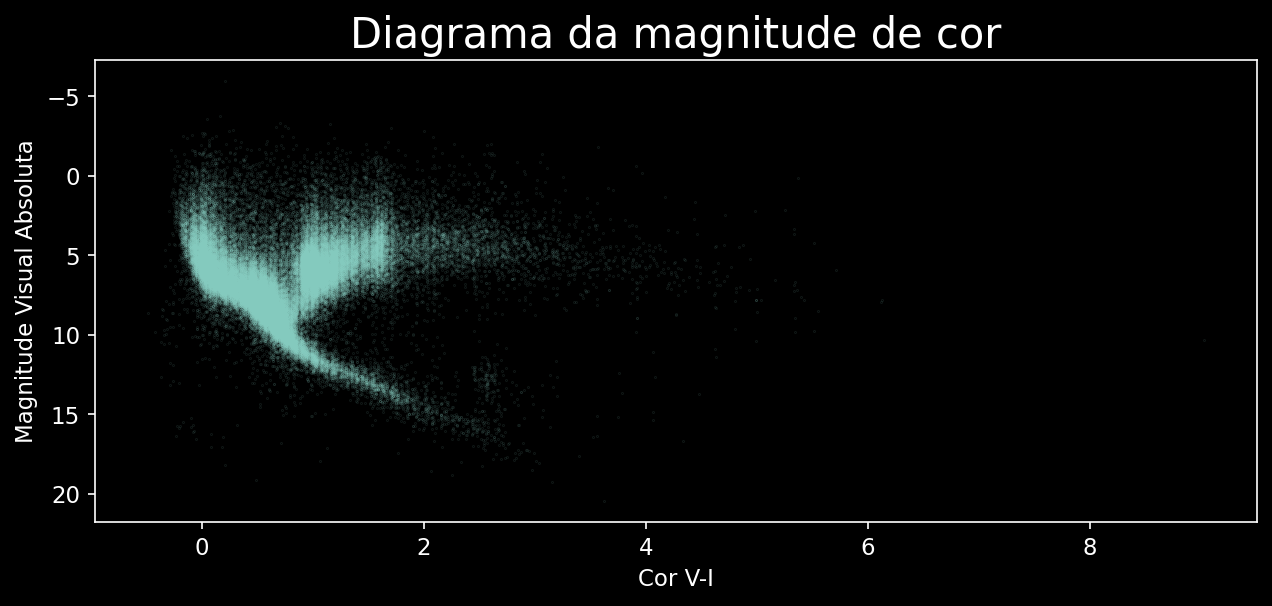

In [ ]:
distancia = df_cor_corrigida['d'] * 1000 # Obtém a distância em parsecs
modulo_da_distancia = 5 * (np.log10(distancia / 10) - 1) # Calcula o módulo da distância
mag_v_abs = df_cor_corrigida['Vmag'] - modulo_da_distancia # Obtém a magnitude visual absoluta das fontes

plt.plot(df_cor_corrigida['V-I'], mag_v_abs, marker = '.', linestyle = 'none', alpha = 0.3, markersize = 0.3)
plt.gca().invert_yaxis()
plt.xlabel('Cor V-I')
plt.ylabel('Magnitude Visual Absoluta')
plt.title('Diagrama da magnitude de cor')
plt.show()

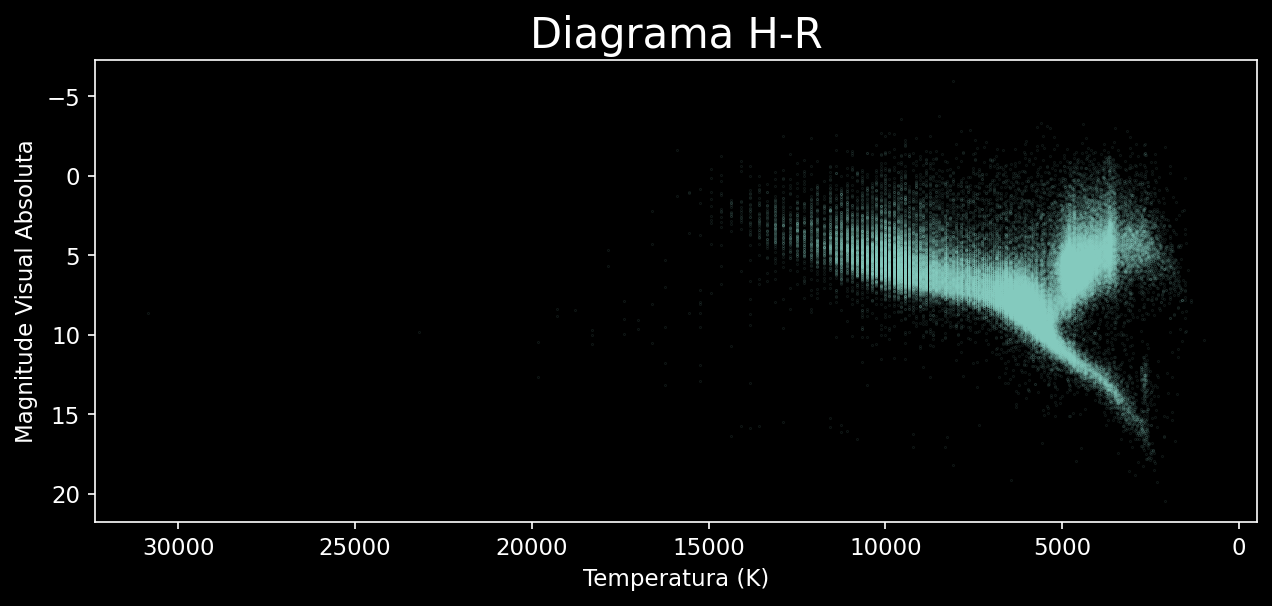

In [ ]:
temperatura = 4600 * (1 / (0.92 * df_cor_corrigida['V-I'] + 1.7) + 1/(0.92 * df_cor_corrigida['V-I'] + 0.62)) # Fórmula de Ballesteros
plt.plot(temperatura, mag_v_abs, marker = '.', linestyle = 'none', alpha = 0.3, markersize = 0.3)
plt.xlabel('Temperatura (K)')
plt.ylabel('Magnitude Visual Absoluta')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.title('Diagrama H-R')
plt.show()

## **9. Erros de medição em Astronomia**

O conjunto de dados astronômicos fornecido pela pesquisa Hipparcos contém algumas entradas que falam sobre o erro padrão nas observações de certas quantidades. Alguns erros importantes são os seguintes,

- e_RAdeg: O erro padrão na determinação da ascensão reta de um objeto
- e_DEdeg: O erro padrão na determinação da declinação de um objeto
- e_plx: O erro padrão na determinação da paralaxe de um objeto
- e_pmra: O erro padrão na determinação do movimento próprio ao longo da ascensão reta
- e_pmde: O erro padrão na determinação da declinação ao longo da declinação

Para analisar esses erros e ver se há alguma tendência na variação, nos limitamos às estrelas que possuem paralaxe positiva. Isto é necessário porque, como veremos, a variação é muito evidente quando comparada com a estimativa da distância das estrelas.

Nosso objetivo aqui será analisar os erros de medição em função da distância de paralaxe.

In [ ]:
df_erro = df_cor_corrigida[['e_RAdeg', 'e_DEdeg', 'e_Plx', 'e_pmRA', 'e_pmDE']]
df_erro = df_erro[df_erro['e_Plx'] > 0]
df_erro.loc[:, 'Distancia'] = distancia
df_erro.head()

e_RAdeg  e_DEdeg  e_Plx  e_pmRA  e_pmDE   Distancia
0     1.32     0.74   1.39    1.36    0.81  282.485876
1     1.28     0.70   3.10    1.74    0.92   45.662100
2     0.53     0.40   0.63    0.57    0.47  355.871886
3     0.53     0.59   0.97    0.65    0.65  129.032258
4     0.64     0.61   1.11    0.67    0.74  348.432056

Um ponto importante a ter em mente aqui é que a distância é arbitrária, sem nenhuma ordem específica. Se formos ingênuos e traçarmos os gráficos de linhas às cegas, acabará em uma confusão de linhas que vão de todos os lugares para todos os lugares.

Conseqüentemente, classificamos o dataframe com base nas distâncias para obter uma ordem no dataframe.

In [ ]:
df_erro.sort_values('Distancia', inplace = True)


Agora estamos prontos para representar graficamente a variação dos erros com a distância para ver se encontramos alguma correlação entre os atributos.

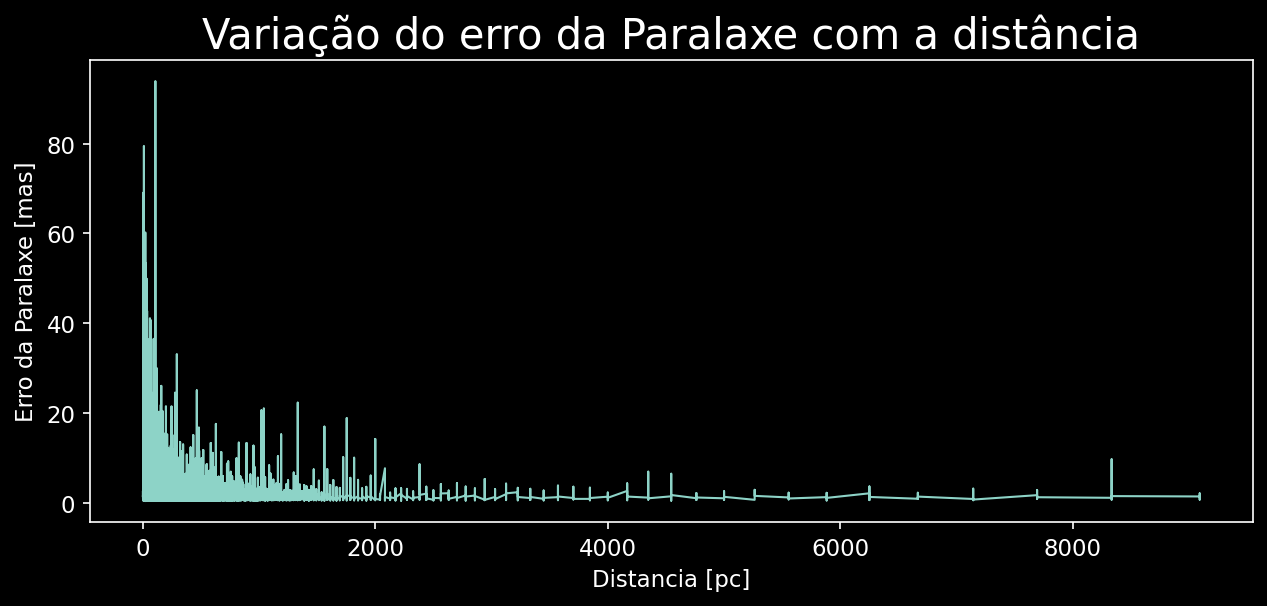

In [ ]:
plt.plot(df_erro['Distancia'], df_erro['e_Plx'])
plt.xlabel('Distancia [pc]')
plt.ylabel('Erro da Paralaxe [mas]')
plt.title('Variação do erro da Paralaxe com a distância')
plt.show()

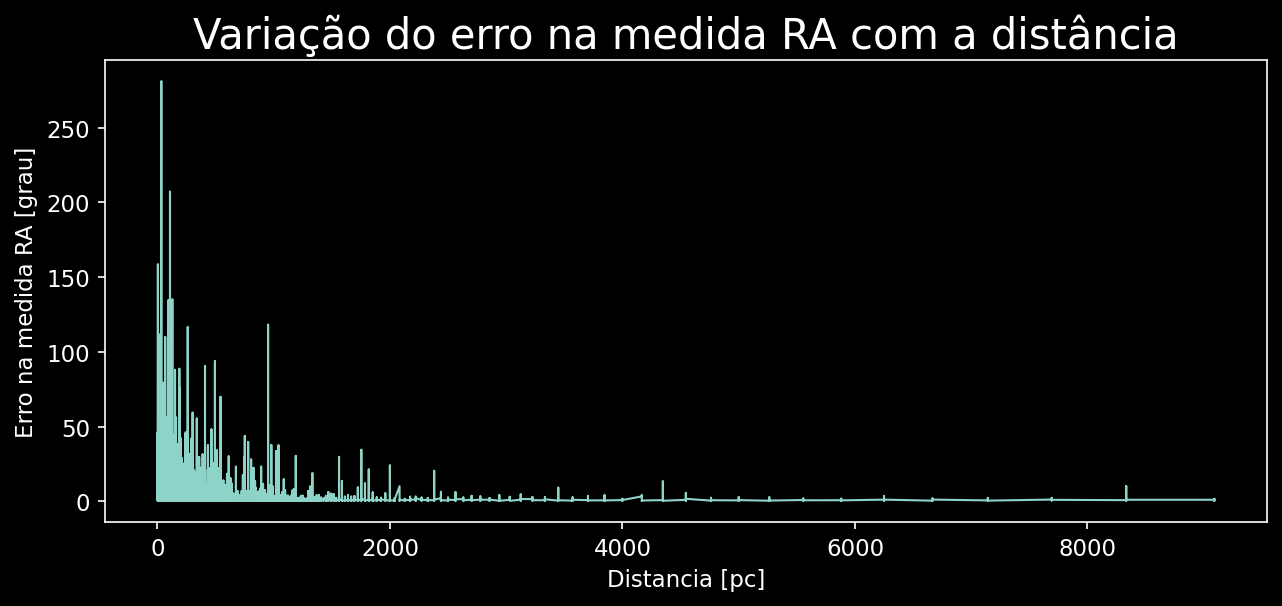

In [ ]:
plt.plot(df_erro['Distancia'], df_erro['e_RAdeg'])
plt.xlabel('Distancia [pc]')
plt.ylabel('Erro na medida RA [grau]')
plt.title('Variação do erro na medida RA com a distância')
plt.show()

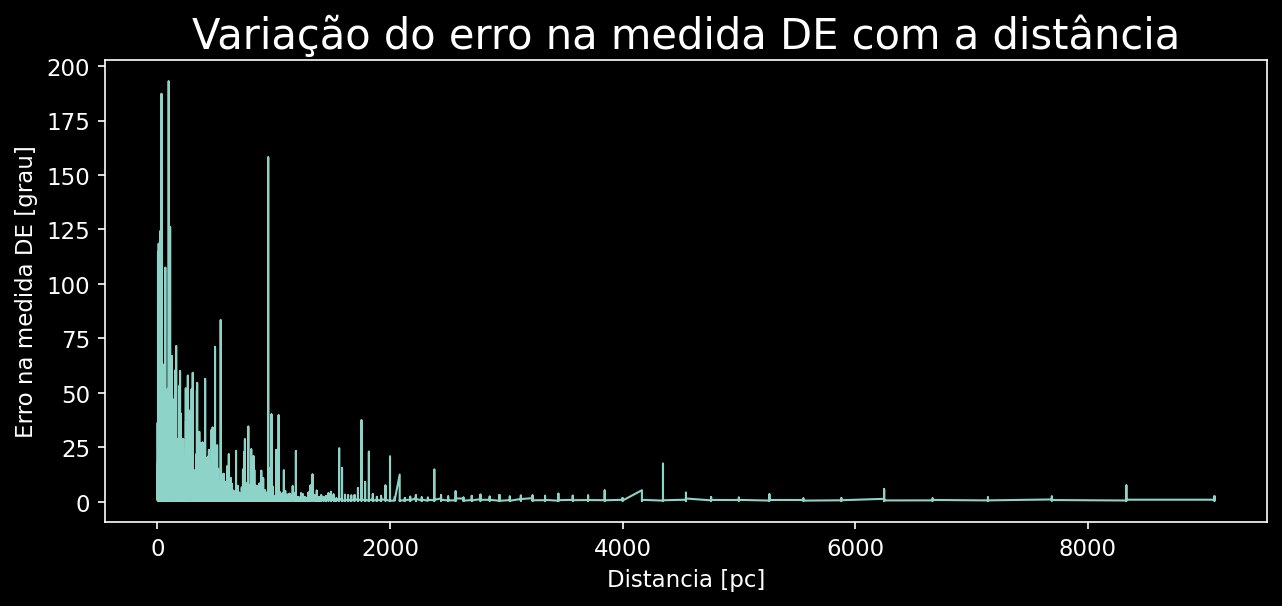

In [ ]:
plt.plot(df_erro['Distancia'], df_erro['e_DEdeg'])
plt.xlabel('Distancia [pc]')
plt.ylabel('Erro na medida DE [grau]')
plt.title('Variação do erro na medida DE com a distância')
plt.show()

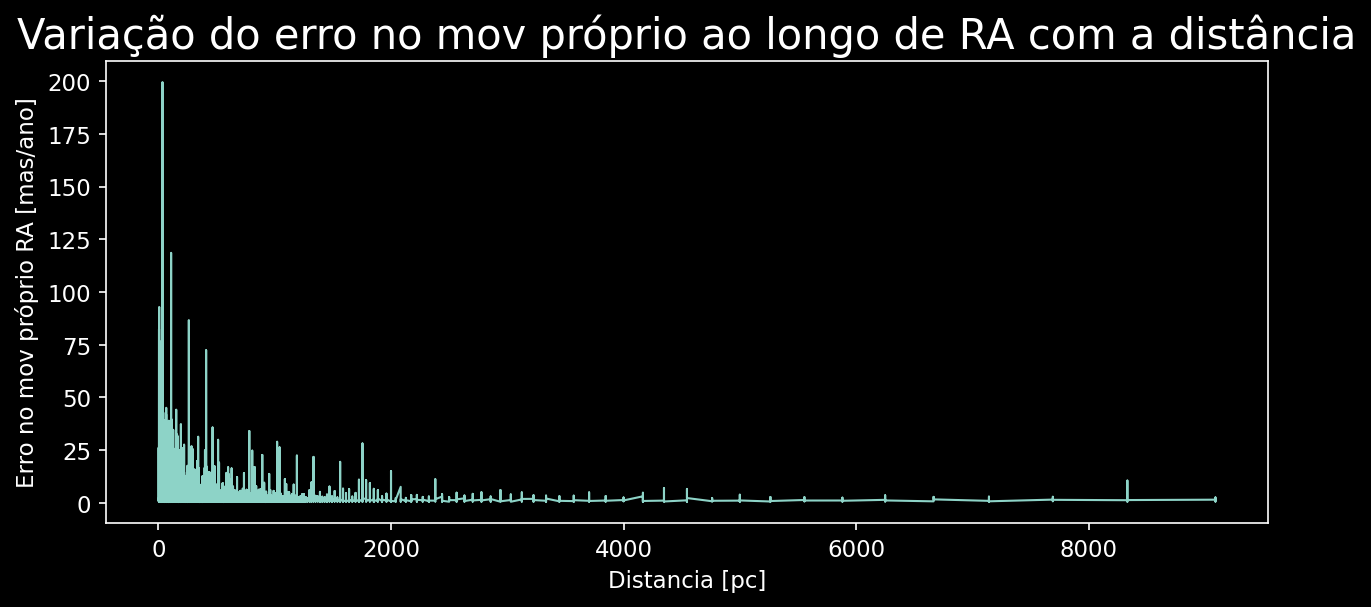

In [ ]:
plt.plot(df_erro['Distancia'], df_erro['e_pmRA'])
plt.xlabel('Distancia [pc]')
plt.ylabel('Erro no mov próprio RA [mas/ano]')
plt.title('Variação do erro no mov próprio ao longo de RA com a distância')
plt.show()

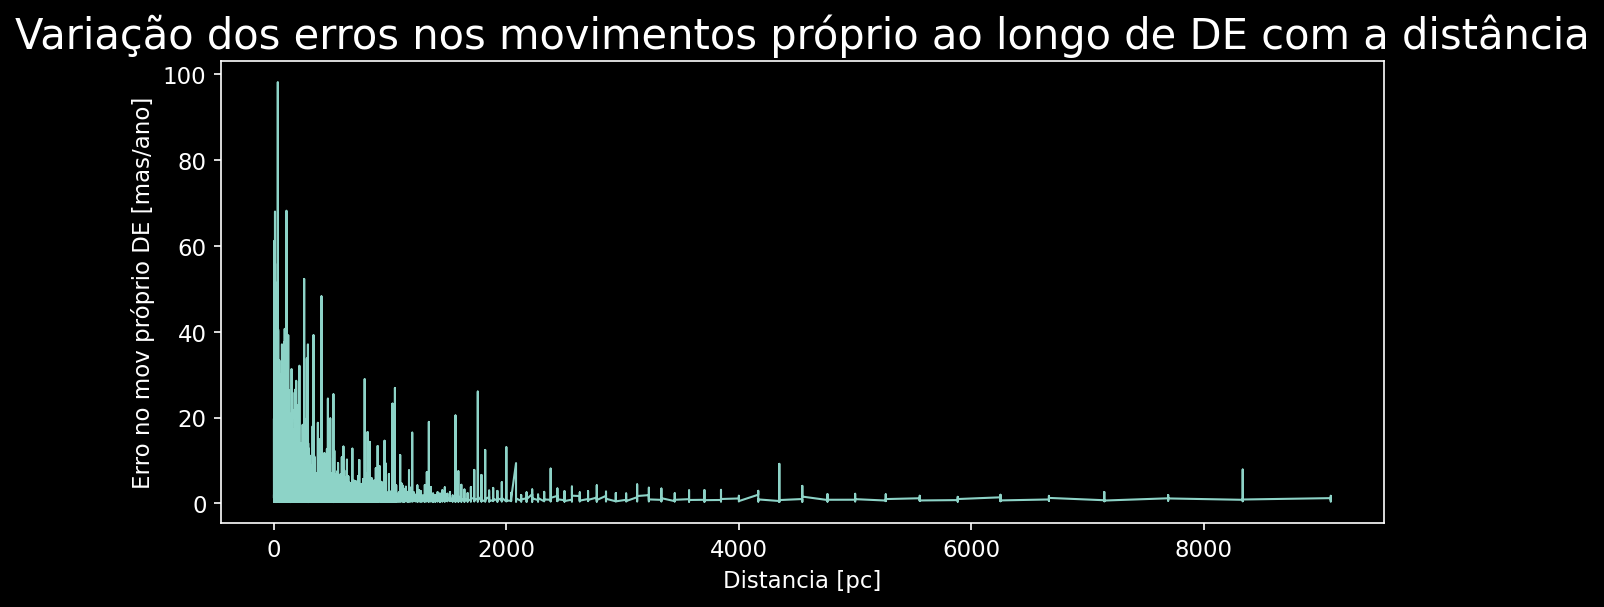

In [ ]:
plt.plot(df_erro['Distancia'], df_erro['e_pmDE'])
plt.xlabel('Distancia [pc]')
plt.ylabel('Erro no mov próprio DE [mas/ano]')
plt.title('Variação dos erros nos movimentos próprio ao longo de DE com a distância')
plt.show()

Em todos os gráficos acima, observamos que os picos são muito grandes abaixo de 2000
parsecs e então permanecem razoavelmente constantes. Um astrônomo ingênuo pode concluir, olhando os gráficos acima, que os erros são os mais altos na vizinhança solar e acusar Hipparcos de ser um fracasso.

Em uma análise mais detalhada do gráfico, no entanto, isso não parece certo. Se respondemos que os erros são mais propensos a disparar em distâncias maiores, estamos certos? Então, o que deu errado? A razão por trás desse comportamento estranho é com a maneira como o matplotlib funciona e não tem nada a ver com a pesquisa em si.

Já notamos que o número de objetos abaixo de 2000
parsecs é muito maior do que o número de objetos em distâncias maiores. O que o matplotlib está tentando plotar aqui é um gráfico de linha que mostra a variação de erros de cada objeto com a distância e, portanto, muitos pontos de dados estão amontoados em uma pequena região do gráfico.

Para mitigar isso, calculamos o erro mediano em diferentes distâncias e os plotamos como um gráfico de linha. Isso deve corresponder à nossa expectativa de ter erros gerais maiores em medições em distâncias maiores.

### **Calculando os valores medianos em diferentes distâncias**

Definimos uma função get_grouped_df(df) que recebe o dataframe de erro que criamos acima e executa as etapas abaixo:

1. Defina uma distância de lista, contendo valores da distância mínima à distância máxima com um intervalo de 100 pc.
2. Filtre o dataframe de entrada de forma que os valores dentro de dois valores sejam retidos no dataframe intermediário.
3. Calcule os valores medianos usando a função numpy.nanmedian(). Isso ignora os valores nan, se houver.
4. Forme um dicionário dos valores medianos com o limite superior da distância como a chave.
5. Converta o dicionário em um dataframe.

In [ ]:
def get_df(data_dict):
    distancia = []
    e_RA = []
    e_DE = []
    e_plx = []
    e_pmra = []
    e_pmde = []

    for key in data_dict.keys():
        distancia.append(key)
        e_RA.append(data_dict[key][0])
        e_DE.append(data_dict[key][1])
        e_plx.append(data_dict[key][2])
        e_pmra.append(data_dict[key][3])
        e_pmde.append(data_dict[key][4])

    df = pd.DataFrame()
    df['Distancia'] = distancia
    df['e_RA'] = e_RA
    df['e_DE'] = e_DE
    df['e_plx'] = e_plx
    df['e_pmra'] = e_pmra
    df['e_pmde'] = e_pmde

    return df

In [ ]:
def get_df_agrupado(df_erro):
    distancia = [(val + 1) * 100 for val in  range(100)]
    distancia_inicial = 1
    group_dict = {}

    for dist in distancia:
        distancia_final = dist
        df = df_erro[df_erro.Distancia <= distancia_final]
        df = df[df.Distancia > distancia_inicial]
        distancia = distancia_final
        e_RA_median = np.nanmedian(df['e_RAdeg'])
        e_DE_median = np.nanmedian(df['e_DEdeg'])
        e_plx_median = np.nanmedian(df['e_Plx'])
        e_pmra_median = np.nanmedian(df['e_pmRA'])
        e_pmde_median = np.nanmedian(df['e_pmDE'])
        group_dict[distancia] = [e_RA_median, e_DE_median, e_plx_median, e_pmra_median, e_pmde_median]
        distancia_inicial = dist

    df_agrupado = get_df(group_dict)

    return df_agrupado

In [ ]:
erro_agrupado = get_df_agrupado(df_erro)
erro_agrupado.head()

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Distancia  e_RA  e_DE  e_plx  e_pmra  e_pmde
0        100  0.90  0.73   1.10    1.06    0.86
1        200  0.87  0.71   1.07    1.02    0.83
2        300  0.85  0.70   1.06    0.99    0.82
3        400  0.83  0.71   1.06    0.96    0.82
4        500  0.83  0.72   1.08    0.97    0.84

In [ ]:
erro_agrupado.isna().sum()

Distancia     0
e_RA         47
e_DE         47
e_plx        47
e_pmra       47
e_pmde       47
dtype: int64

Como há valores NaN em nossos dados, nós os descartamos.

In [ ]:
erro_agrupado.dropna(inplace = True)

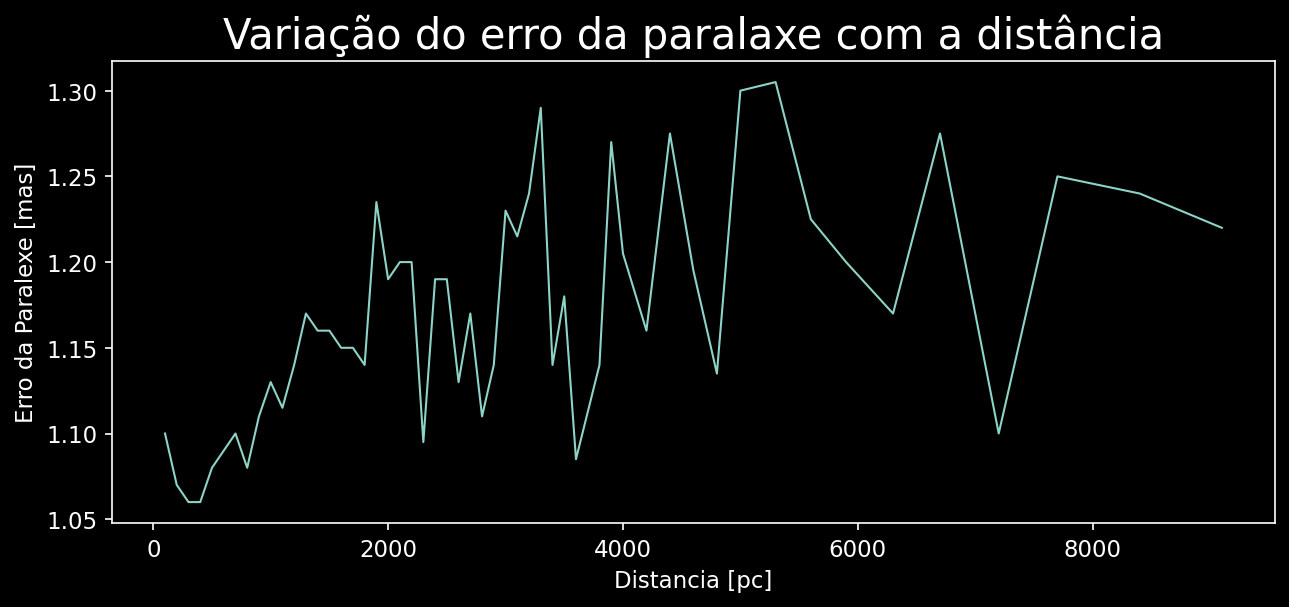

In [ ]:
plt.plot(erro_agrupado['Distancia'], erro_agrupado['e_plx'])
plt.xlabel('Distancia [pc]')
plt.ylabel('Erro da Paralexe [mas]')
plt.title('Variação do erro da paralaxe com a distância')
plt.show()

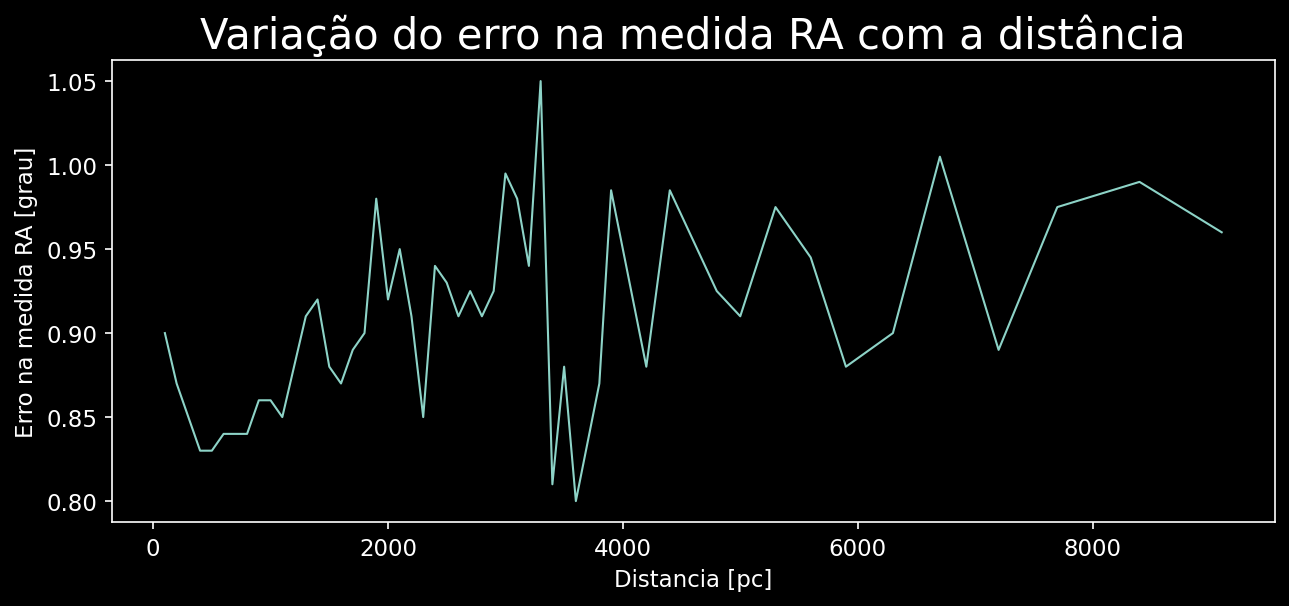

In [ ]:
plt.plot(erro_agrupado['Distancia'], erro_agrupado['e_RA'])
plt.xlabel('Distancia [pc]')
plt.ylabel('Erro na medida RA [grau]')
plt.title('Variação do erro na medida RA com a distância')
plt.show()

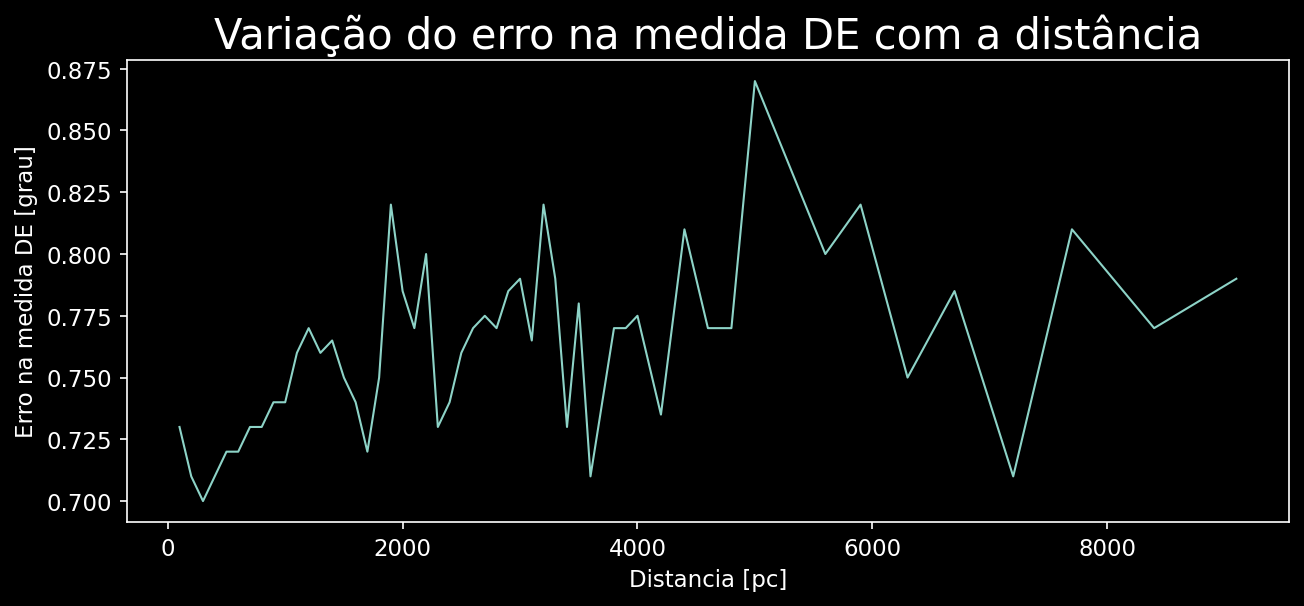

In [ ]:
plt.plot(erro_agrupado['Distancia'], erro_agrupado['e_DE'])
plt.xlabel('Distancia [pc]')
plt.ylabel('Erro na medida DE [grau]')
plt.title('Variação do erro na medida DE com a distância')
plt.show()

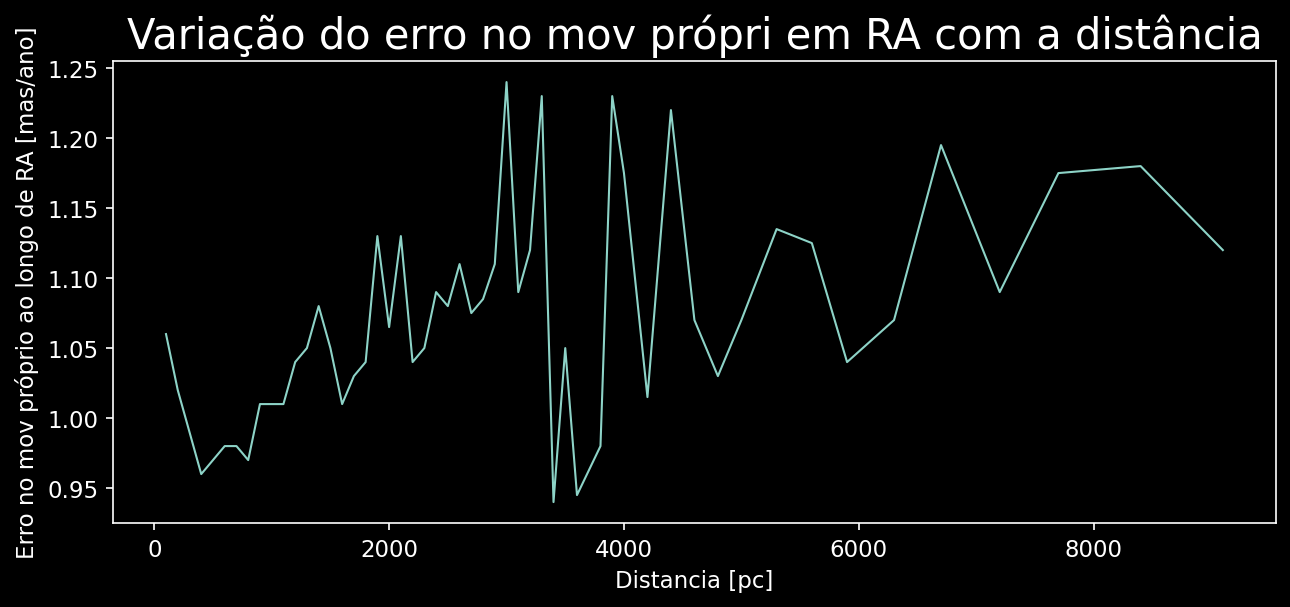

In [ ]:
plt.plot(erro_agrupado['Distancia'], erro_agrupado['e_pmra'])
plt.xlabel('Distancia [pc]')
plt.ylabel('Erro no mov próprio ao longo de RA [mas/ano]')
plt.title('Variação do erro no mov própri em RA com a distância')
plt.show()

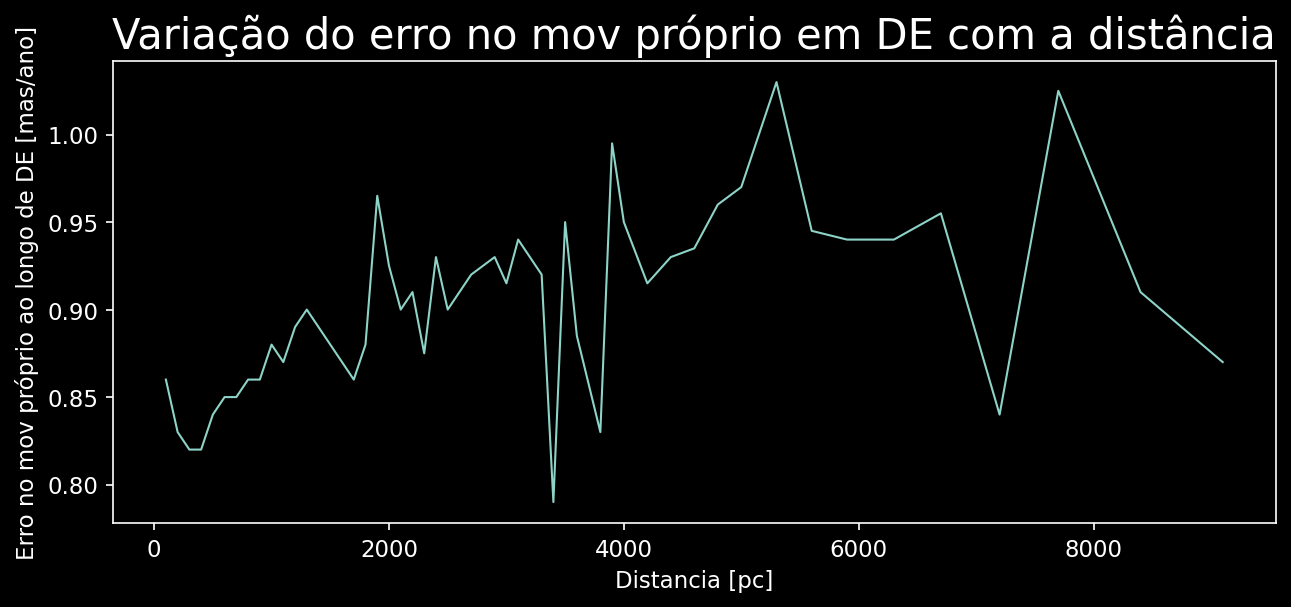

In [ ]:
plt.plot(erro_agrupado['Distancia'], erro_agrupado['e_pmde'])
plt.xlabel('Distancia [pc]')
plt.ylabel('Erro no mov próprio ao longo de DE [mas/ano]')
plt.title('Variação do erro no mov próprio em DE com a distância')
plt.show()

Como esperado, vemos uma tendência geral que sobe com o aumento da distância. Confirmamos esse comportamento plotando um gráfico de regressão, como mostrado abaixo.

Text(0.5, 1.0, 'Variação do erro na medida RA com a distância')

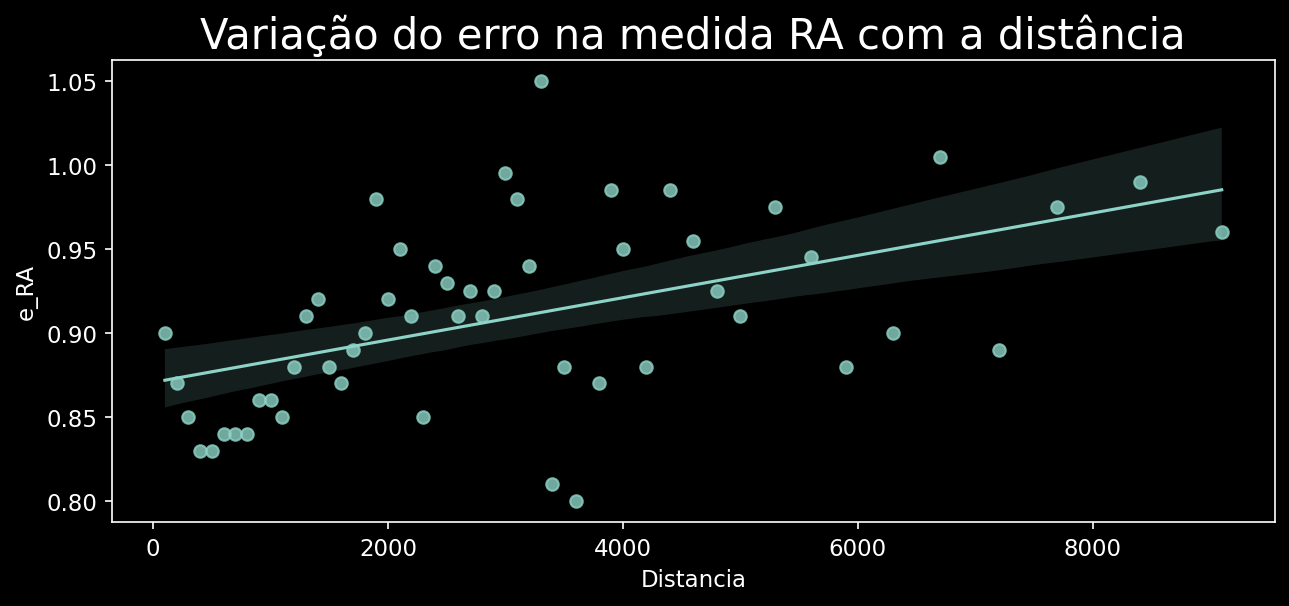

In [ ]:
sns.regplot(x = 'Distancia',
            y = 'e_RA',
            data = erro_agrupado).set_title('Variação do erro na medida RA com a distância')

Text(0.5, 1.0, 'Variação do erro na medida DE com a distância')

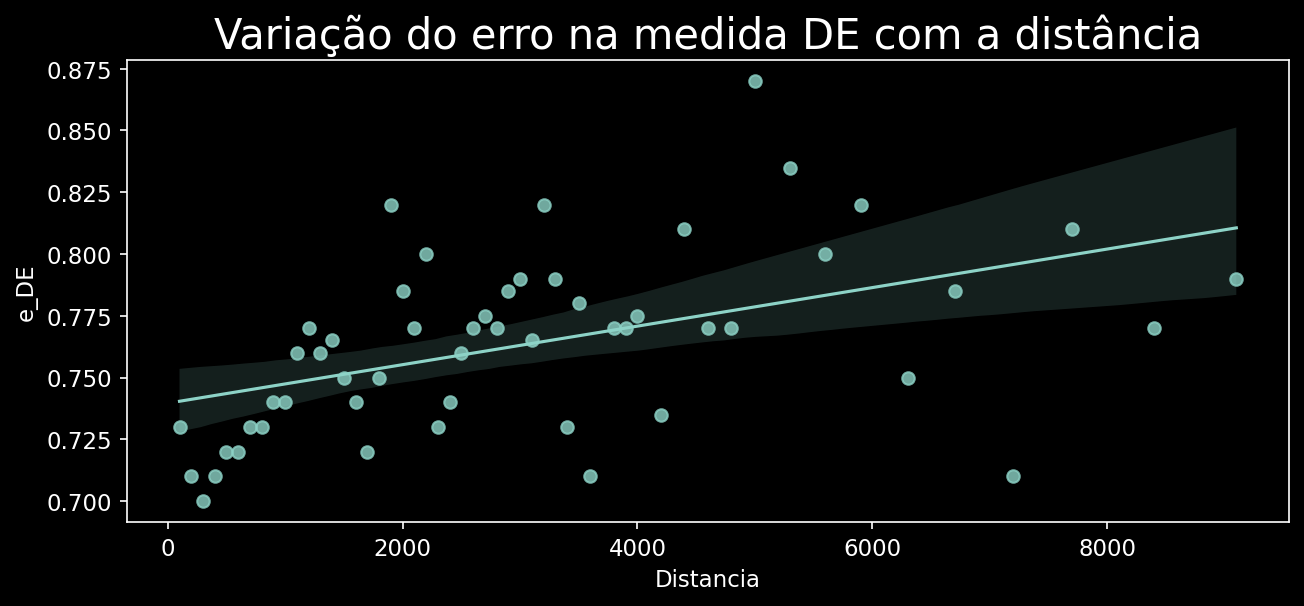

In [ ]:
sns.regplot(x = 'Distancia',
            y = 'e_DE',
            data = erro_agrupado).set_title('Variação do erro na medida DE com a distância')

Text(0.5, 1.0, 'Variação do erro da paralaxe com a distância')

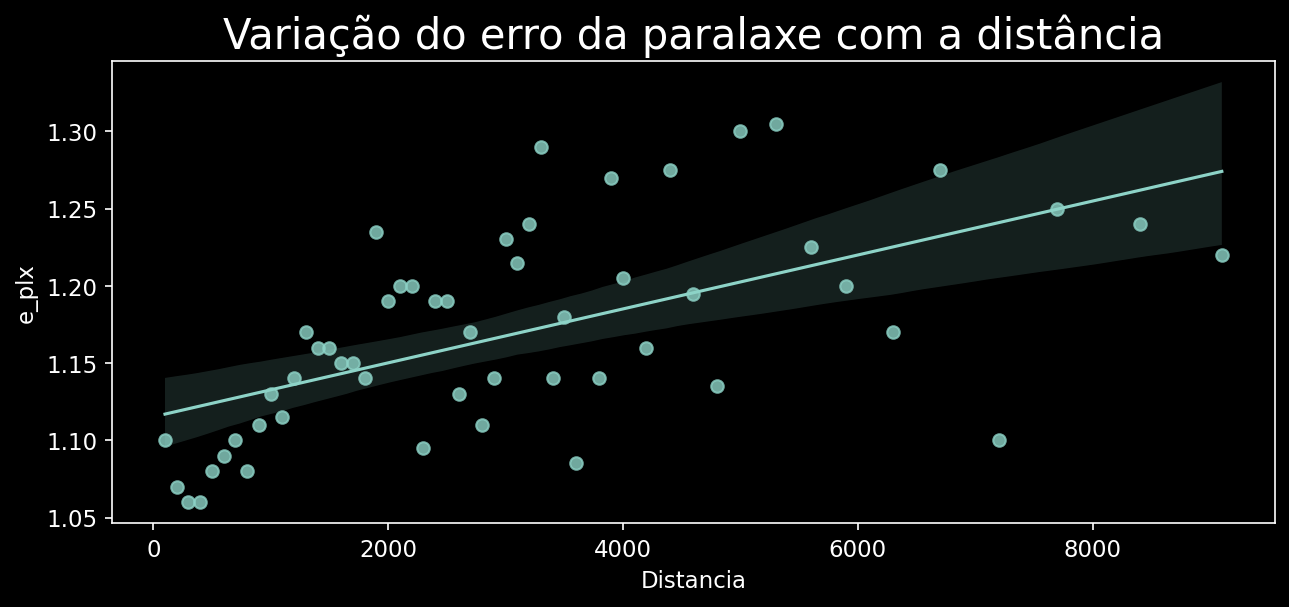

In [ ]:
sns.regplot(x = 'Distancia',
            y = 'e_plx',
            data = erro_agrupado).set_title('Variação do erro da paralaxe com a distância')

Text(0.5, 1.0, 'Variação do erro no mov próprio em RA com a distância')

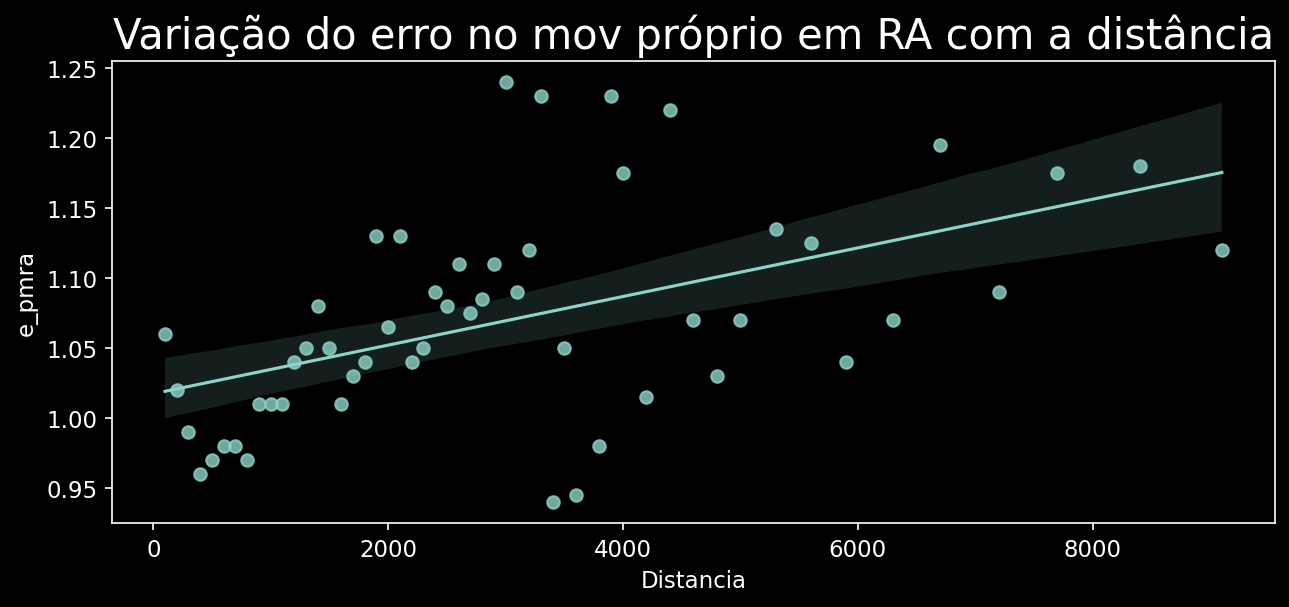

In [ ]:
sns.regplot(x = 'Distancia',
            y = 'e_pmra',
            data = erro_agrupado).set_title('Variação do erro no mov próprio em RA com a distância')

Text(0.5, 1.0, 'Variação do erro no mov próprio em DE com a distância')

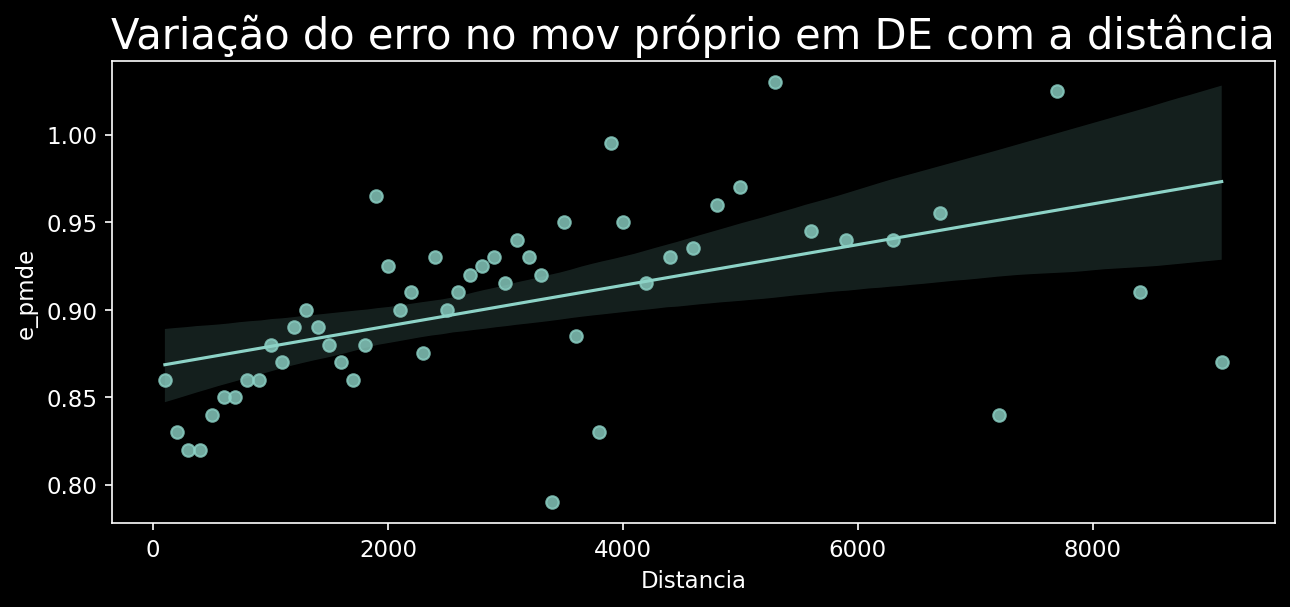

In [ ]:
sns.regplot(x = 'Distancia',
            y = 'e_pmde',
            data = erro_agrupado).set_title('Variação do erro no mov próprio em DE com a distância')

Esses gráficos de regressão reconfirmam nossas inferências sobre erros de medição com o aumento da distância.

Concluindo, vemos que os erros de medição aumentam com o aumento da distância.

### **Erros na magnitude aparente das estrelas**

Embora a dependência dos erros na distância pareça trivial, há outras dependências também que podem não ser tão evidentes a princípio. Esta é a dependência dos erros na magnitude aparente das estrelas. Nas células abaixo, vemos uma dessas dependências de erros no campo `Hpmag`.

Seguimos os mesmos passos que fizemos com a distância. A única diferença aqui é que a variância agora dependeria da magnitude em vez da distância.

In [ ]:
erro_agrupado = df_cor_corrigida[['e_RAdeg', 'e_DEdeg', 'e_Plx', 'e_pmRA', 'e_pmDE', 'Hpmag']]
erro_agrupado.head()

e_RAdeg  e_DEdeg  e_Plx  e_pmRA  e_pmDE   Hpmag
0     1.32     0.74   1.39    1.36    0.81  9.2043
1     1.28     0.70   3.10    1.74    0.92  9.4017
2     0.53     0.40   0.63    0.57    0.47  6.6081
3     0.53     0.59   0.97    0.65    0.65  8.1498
4     0.64     0.61   1.11    0.67    0.74  8.7077

In [ ]:
erro_agrupado.sort_values('Hpmag', inplace = True)

<ipython-input-171-366a7d03d25e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erro_agrupado.sort_values('Hpmag', inplace = True)


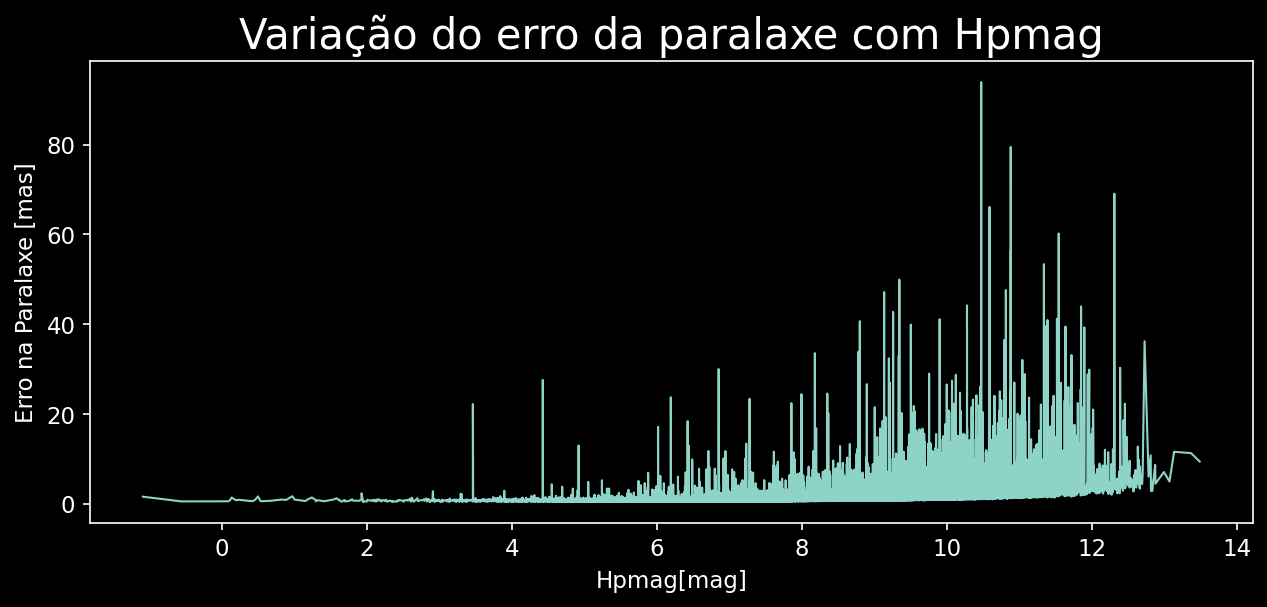

In [ ]:
plt.plot(erro_agrupado['Hpmag'], erro_agrupado['e_Plx'])
plt.xlabel('Hpmag[mag]')
plt.ylabel('Erro na Paralaxe [mas]')
plt.title('Variação do erro da paralaxe com Hpmag')
plt.show()

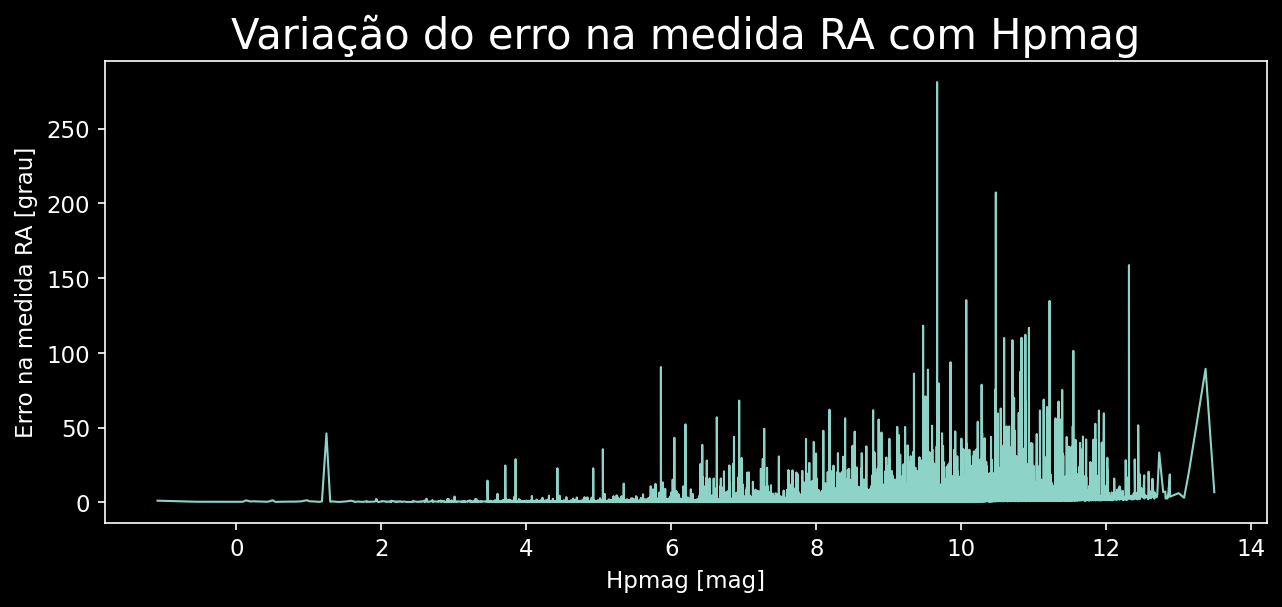

In [ ]:
plt.plot(erro_agrupado['Hpmag'], erro_agrupado['e_RAdeg'])
plt.xlabel('Hpmag [mag]')
plt.ylabel('Erro na medida RA [grau]')
plt.title('Variação do erro na medida RA com Hpmag')
plt.show()

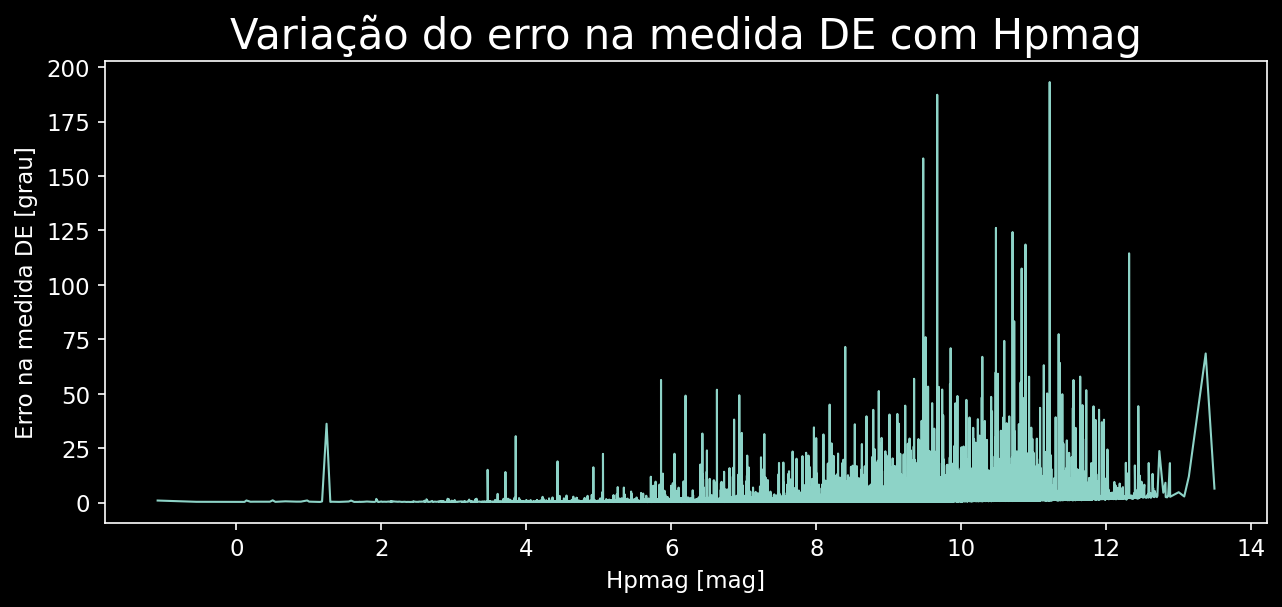

In [ ]:
plt.plot(erro_agrupado['Hpmag'], erro_agrupado['e_DEdeg'])
plt.xlabel('Hpmag [mag]')
plt.ylabel('Erro na medida DE [grau]')
plt.title('Variação do erro na medida DE com Hpmag')
plt.show()

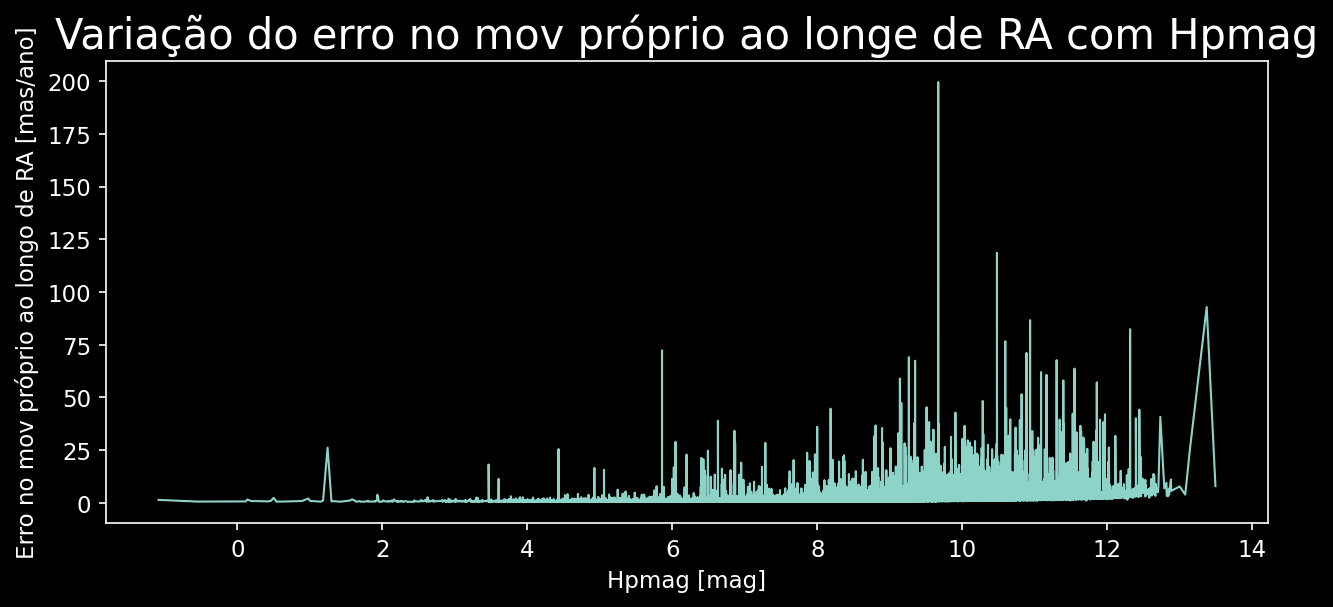

In [ ]:
plt.plot(erro_agrupado['Hpmag'], erro_agrupado['e_pmRA'])
plt.xlabel('Hpmag [mag]')
plt.ylabel('Erro no mov próprio ao longo de RA [mas/ano]')
plt.title('Variação do erro no mov próprio ao longe de RA com Hpmag')
plt.show()

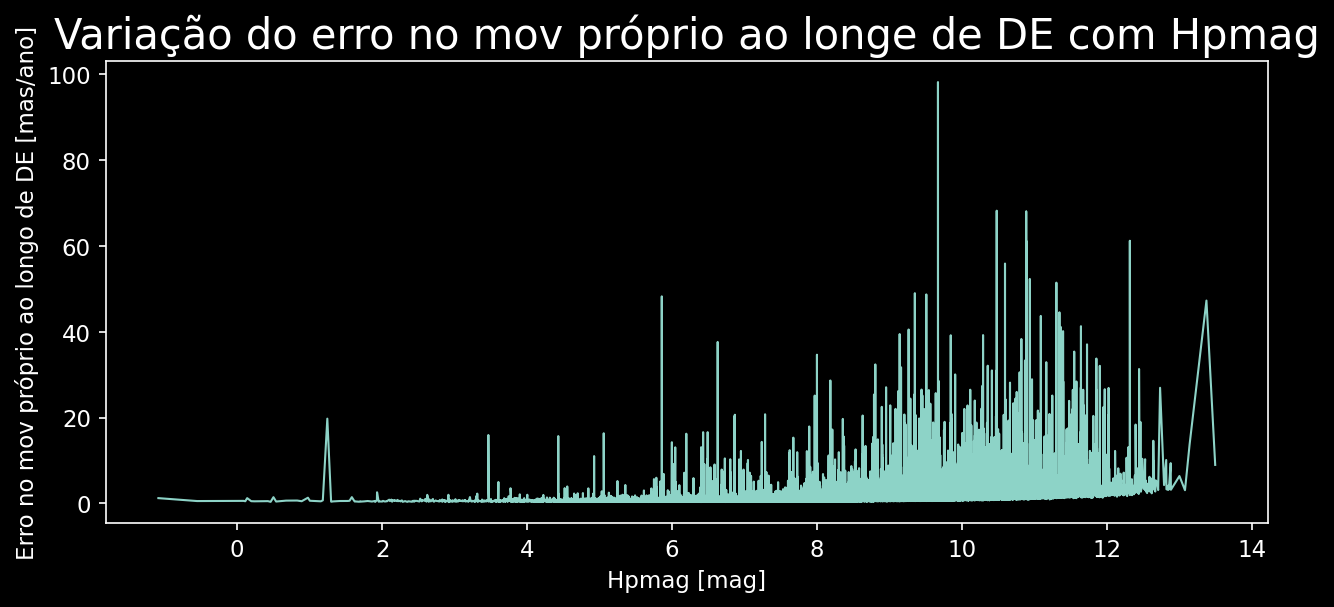

In [ ]:
plt.plot(erro_agrupado['Hpmag'], erro_agrupado['e_pmDE'])
plt.xlabel('Hpmag [mag]')
plt.ylabel('Erro no mov próprio ao longo de DE [mas/ano]')
plt.title('Variação do erro no mov próprio ao longe de DE com Hpmag')
plt.show()

Em todos os gráficos acima, observamos que os picos são muito grandes em valores maiores de magnitude.

PERGUNTA: Não é estranho que objetos mais brilhantes apresentem erros maiores em comparação a objetos mais fracos? Não. E o motivo é que isso ocorre porque um número maior para a magnitude implica em objetos mais fracos.

De qualquer forma, concluir que objetos mais fracos(menos intenso) têm erros maiores não é correto neste estágio por causa da maneira como o matplotlib funciona. Nesses gráficos também, muitas observações são amontoadas em uma porção muito pequena do gráfico, o que pode ser enganoso.

Para atenuar isso, calculamos o erro mediano em diferentes magnitudes e os plotamos como um gráfico de linha. Isso deve corresponder às nossas expectativas de ter erros gerais maiores em quantidades mensuráveis ​​para objetos mais fracos.

In [ ]:
def get_df_mag(data_dict):
    Hpmag = []
    e_RA = []
    e_DE = []
    e_plx = []
    e_pmra = []
    e_pmde = []

    for key in data_dict.keys():
        Hpmag.append(key)
        e_RA.append(data_dict[key][0])
        e_DE.append(data_dict[key][1])
        e_plx.append(data_dict[key][2])
        e_pmra.append(data_dict[key][3])
        e_pmde.append(data_dict[key][4])

    df = pd.DataFrame()
    df['Hpmag'] = Hpmag
    df['e_RA'] = e_RA
    df['e_DE'] = e_DE
    df['e_plx'] = e_plx
    df['e_pmra'] = e_pmra
    df['e_pmde'] = e_pmde

    return df

In [ ]:
def get_df_mag_agrupado(df_erro):
    max_mag = np.max(df_erro['Hpmag'])
    min_mag = np.min(df_erro['Hpmag'])
    hpmag = [(val + 1) for val in  range(int(max_mag) + 1)]
    mag_inicial = int(min_mag)
    group_dict = {}

    for mag in hpmag:
        mag_final = mag
        df = df_erro[df_erro.Hpmag <= mag_final]
        df = df[df.Hpmag > mag_inicial]
        magnitude = mag_final
        e_RA_mediana = np.nanmedian(df['e_RAdeg'])
        e_DE_mediana = np.nanmedian(df['e_DEdeg'])
        e_plx_mediana = np.nanmedian(df['e_Plx'])
        e_pmra_mediana = np.nanmedian(df['e_pmRA'])
        e_pmde_mediana = np.nanmedian(df['e_pmDE'])
        group_dict[magnitude] = [e_RA_mediana, e_DE_mediana, e_plx_mediana, e_pmra_mediana, e_pmde_mediana]
        distancia_inicial = mag

    df_agrupado = get_df_mag(group_dict)
    return df_agrupado

In [ ]:
df_erro['Hpmag'] = df_cor_corrigida['Hpmag']

In [ ]:
erro_agrupado = get_df_mag_agrupado(df_erro)
erro_agrupado.head()

Hpmag  e_RA   e_DE  e_plx  e_pmra  e_pmde
0      1  0.70  0.505  0.835   0.735    0.55
1      2  0.69  0.490  0.790   0.700    0.53
2      3  0.65  0.490  0.765   0.715    0.57
3      4  0.64  0.490  0.750   0.680    0.57
4      5  0.63  0.480  0.750   0.680    0.56

In [ ]:
erro_agrupado.isna().sum()

Hpmag     0
e_RA      0
e_DE      0
e_plx     0
e_pmra    0
e_pmde    0
dtype: int64

Nossa função personalizada fez um ótimo trabalho dessa vez, sem valores faltantes no conjunto de dados gerado.

Agora podemos plotar nossas variações em erros diretamente, como fizemos com a distância.

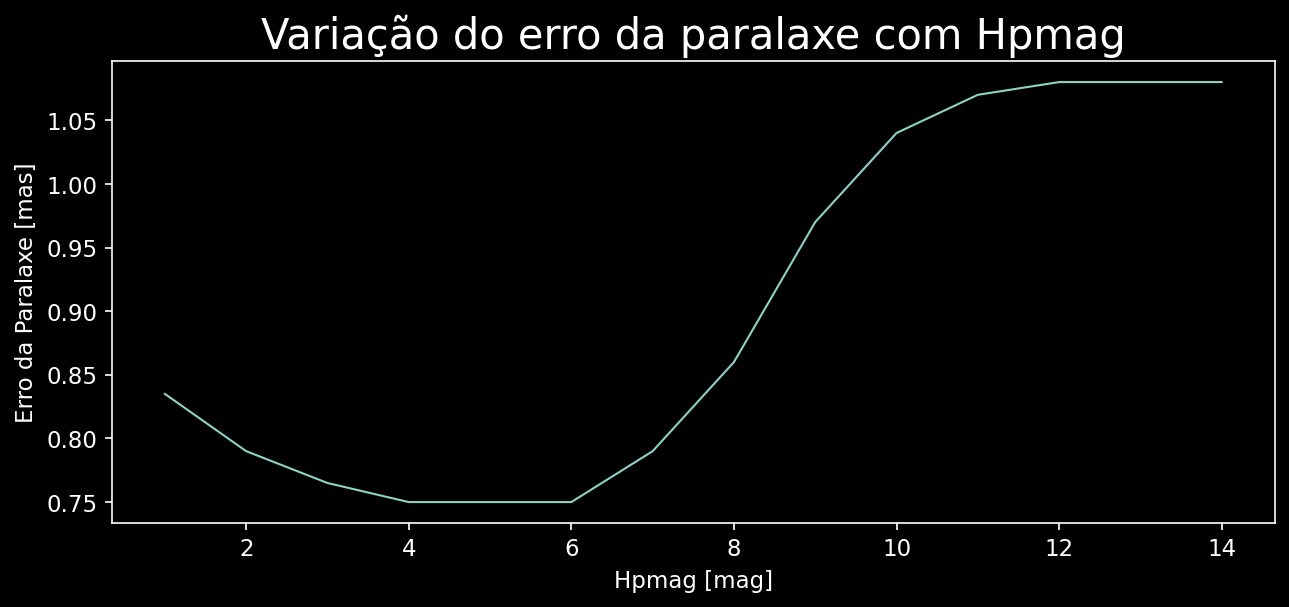

In [ ]:
plt.plot(erro_agrupado['Hpmag'], erro_agrupado['e_plx'])
plt.xlabel('Hpmag [mag]')
plt.ylabel('Erro da Paralaxe [mas]')
plt.title('Variação do erro da paralaxe com Hpmag')
plt.show()

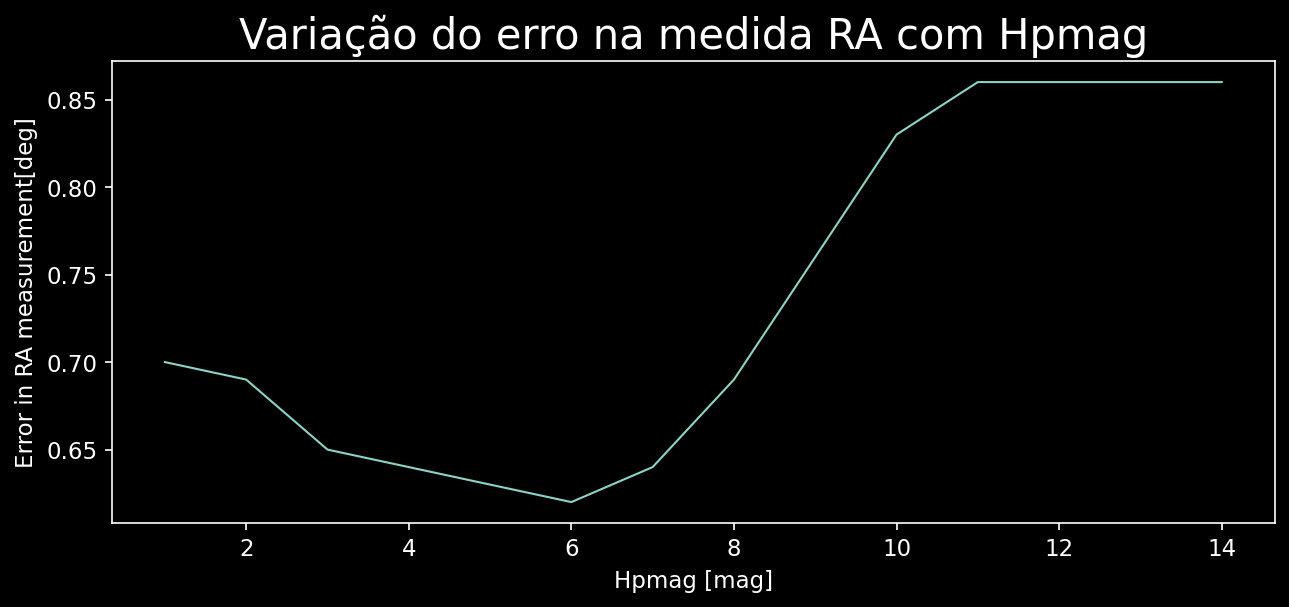

In [ ]:
plt.plot(erro_agrupado['Hpmag'], erro_agrupado['e_RA'])
plt.xlabel('Hpmag [mag]')
plt.ylabel('Error in RA measurement[deg]')
plt.title('Variação do erro na medida RA com Hpmag')
plt.show()

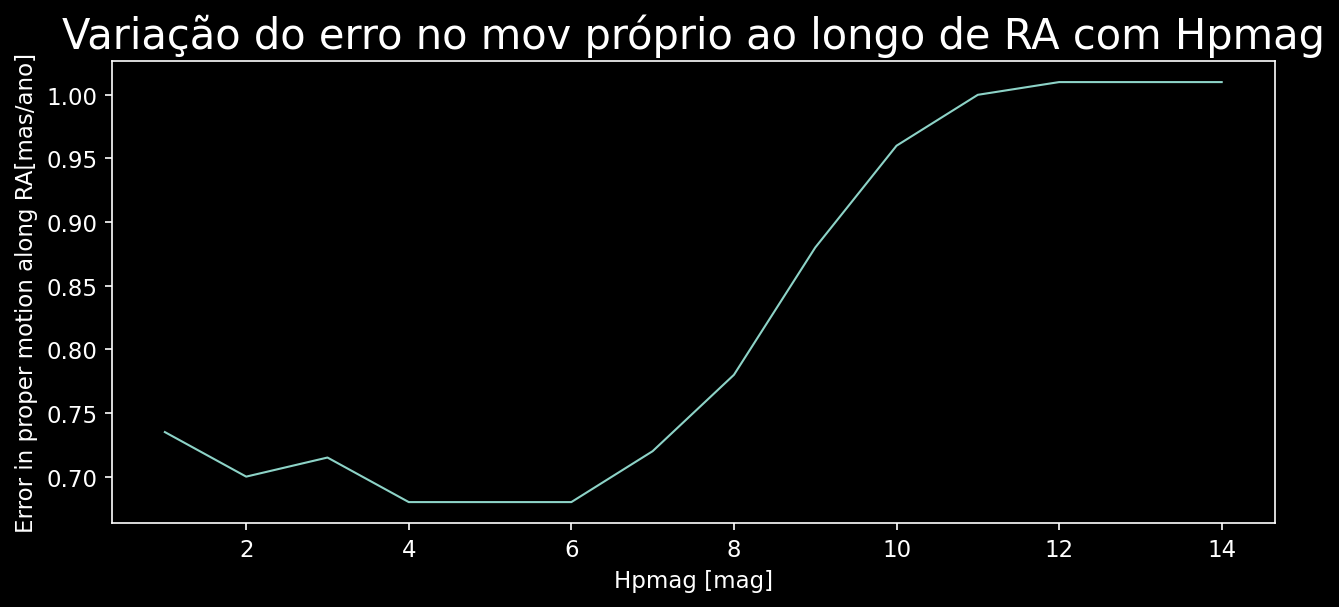

In [ ]:
plt.plot(erro_agrupado['Hpmag'], erro_agrupado['e_pmra'])
plt.xlabel('Hpmag [mag]')
plt.ylabel('Error in proper motion along RA[mas/ano]')
plt.title('Variação do erro no mov próprio ao longo de RA com Hpmag')
plt.show()

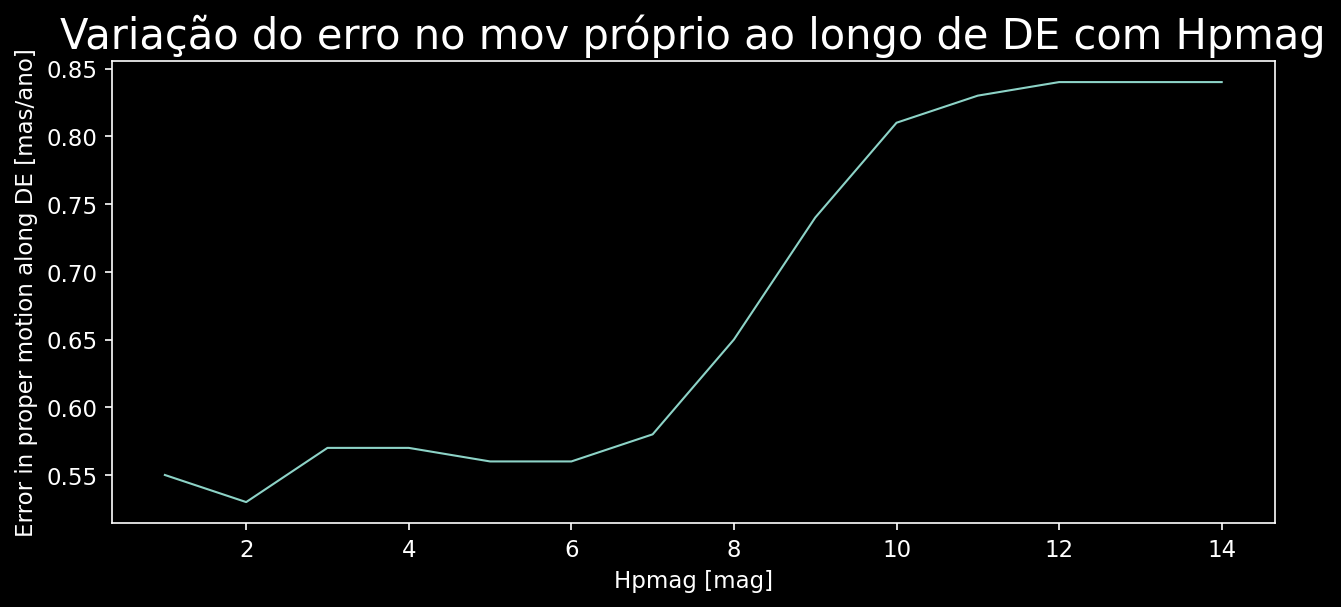

In [ ]:
plt.plot(erro_agrupado['Hpmag'], erro_agrupado['e_pmde'])
plt.xlabel('Hpmag [mag]')
plt.ylabel('Error in proper motion along DE [mas/ano]')
plt.title('Variação do erro no mov próprio ao longo de DE com Hpmag')
plt.show()

Vemos algo espetacular na variação dos erros com Hpmag. Ao contrário da variação com relação às distâncias, as variações com relação à magnitude são bastante suaves. Além disso, também vemos uma tendência geral em que os erros disparam entre magnitude **6** e **10**.

Isso ocorre porque objetos mais fracos são difíceis de observar e, portanto, acarretam erros maiores.

Agora recriaremos os gráficos de regressão conforme mostrado acima e observe se as linhas de regressão são mais íngremes do que as que obtivemos para as distâncias acima.


Text(0.5, 1.0, 'Variação do erro na medida RA com a Hpmag')

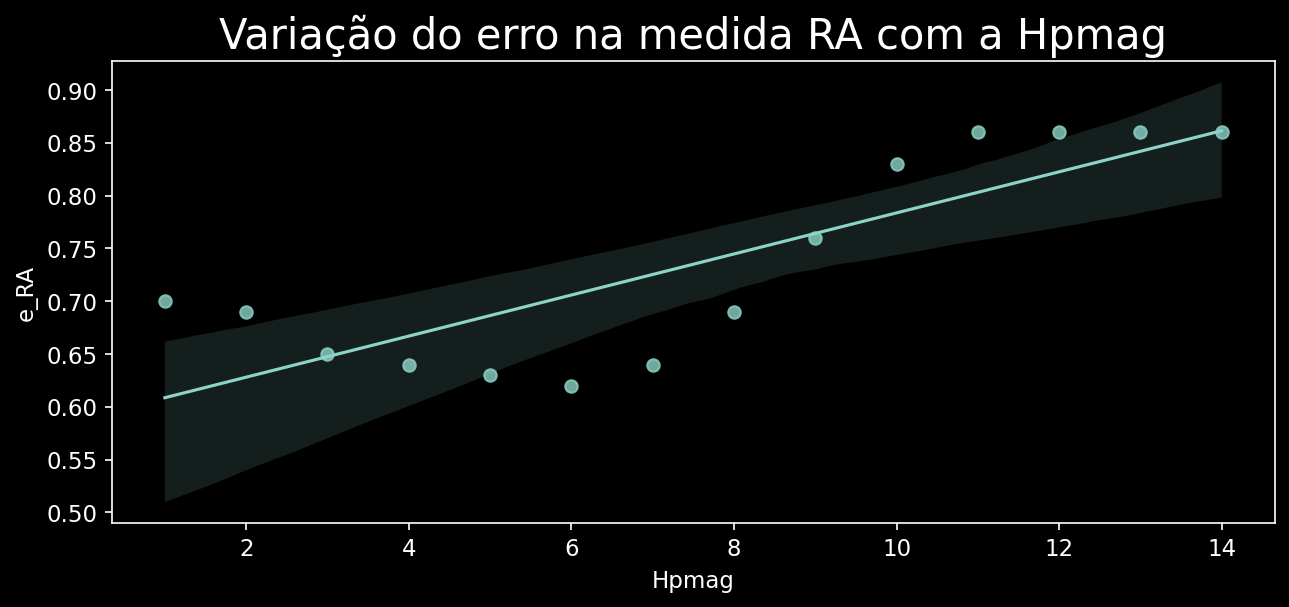

In [ ]:
sns.regplot(x = 'Hpmag',
            y = 'e_RA',
            data = erro_agrupado).set_title('Variação do erro na medida RA com a Hpmag')

Text(0.5, 1.0, 'Variação do erro na medida DE com Hpmag')

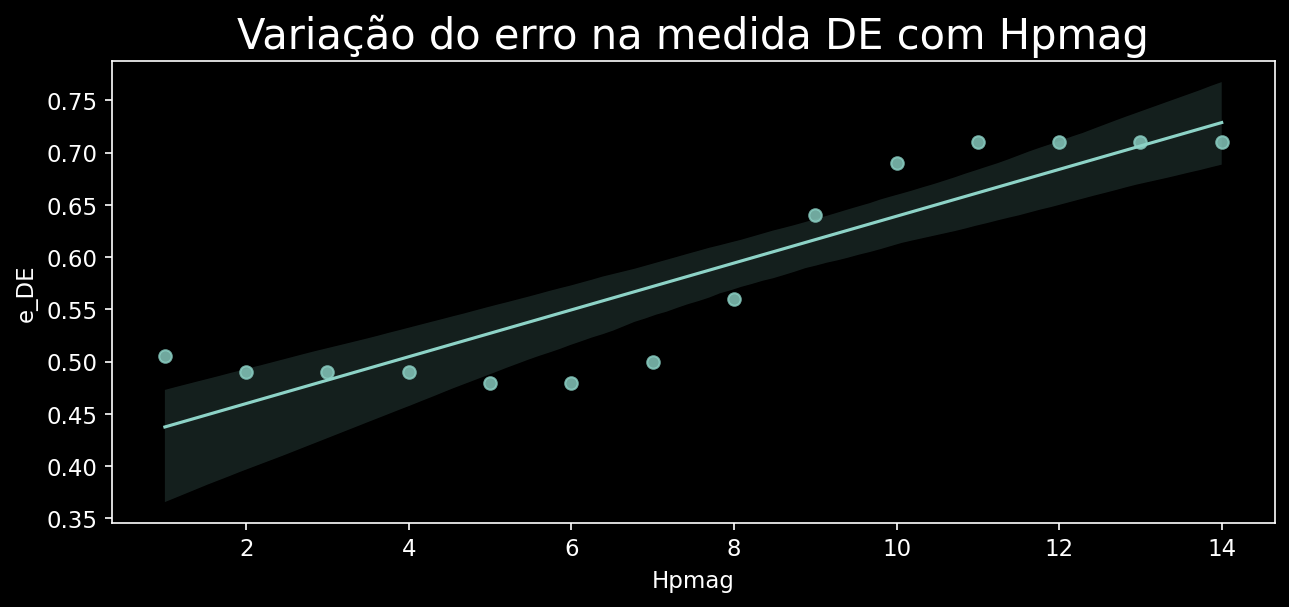

In [ ]:
sns.regplot(x = 'Hpmag',
            y = 'e_DE',
            data = erro_agrupado).set_title('Variação do erro na medida DE com Hpmag')

Text(0.5, 1.0, 'Variação do erro da paralaxe com Hpmag')

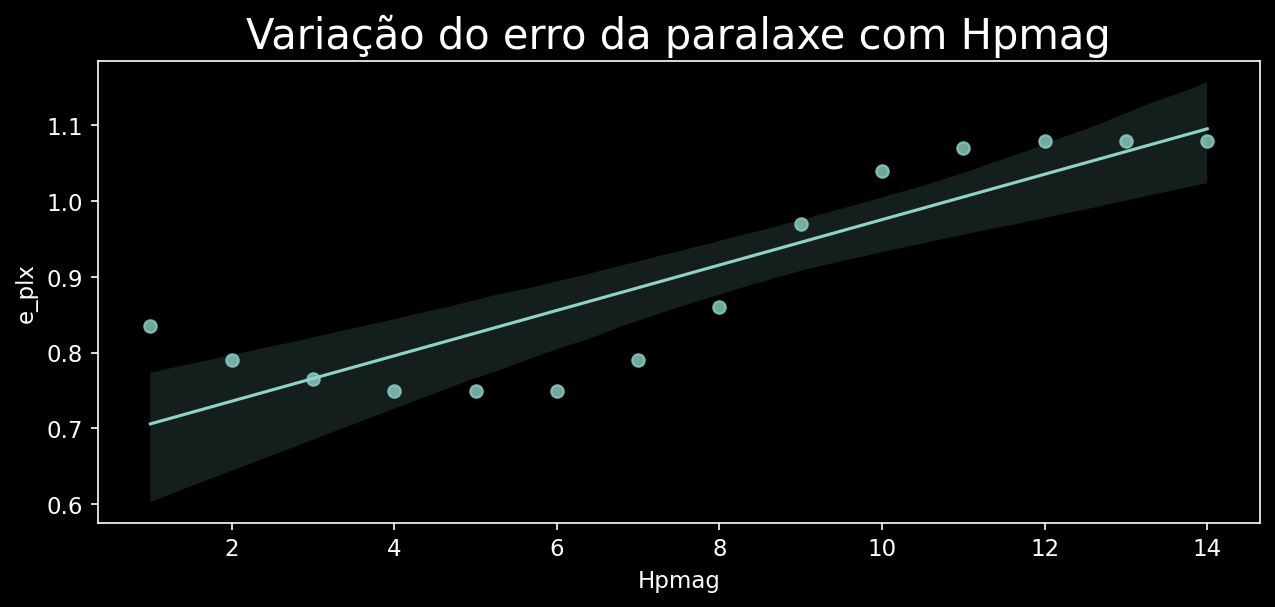

In [ ]:
sns.regplot(x = 'Hpmag',
            y = 'e_plx',
            data = erro_agrupado).set_title('Variação do erro da paralaxe com Hpmag')

Text(0.5, 1.0, 'Variação do erro no mov próprio em RA com Hpmag')

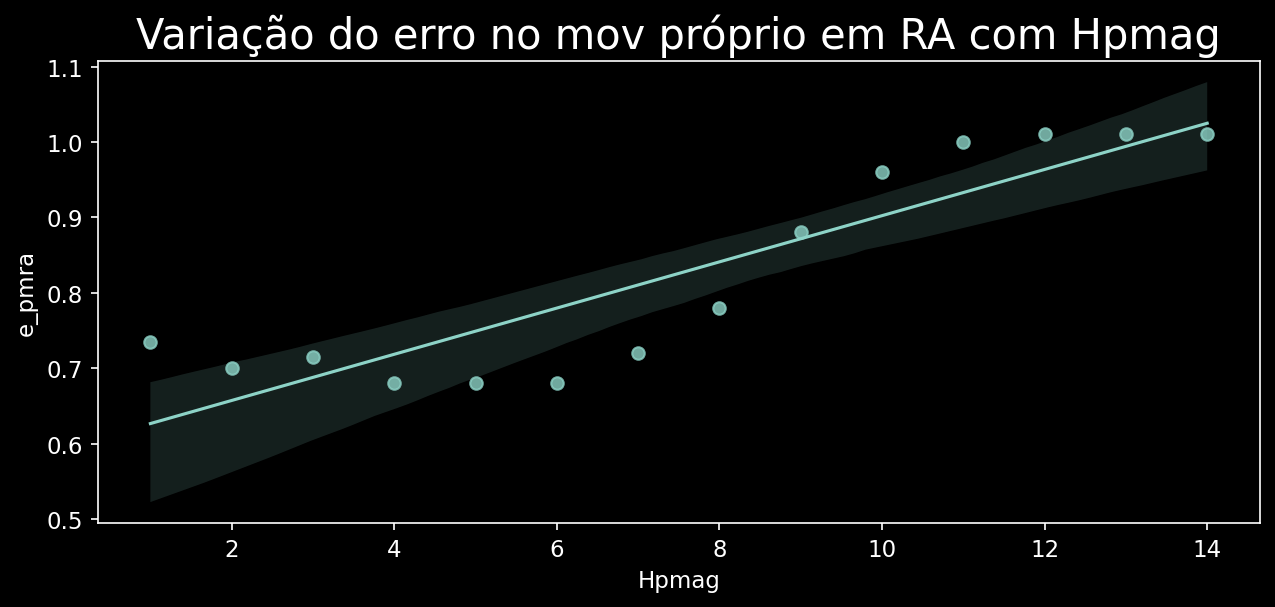

In [ ]:
sns.regplot(x = 'Hpmag',
            y = 'e_pmra',
            data = erro_agrupado).set_title('Variação do erro no mov próprio em RA com Hpmag')

Text(0.5, 1.0, 'Variação do erro no mov próprio em DE com Hpmag')

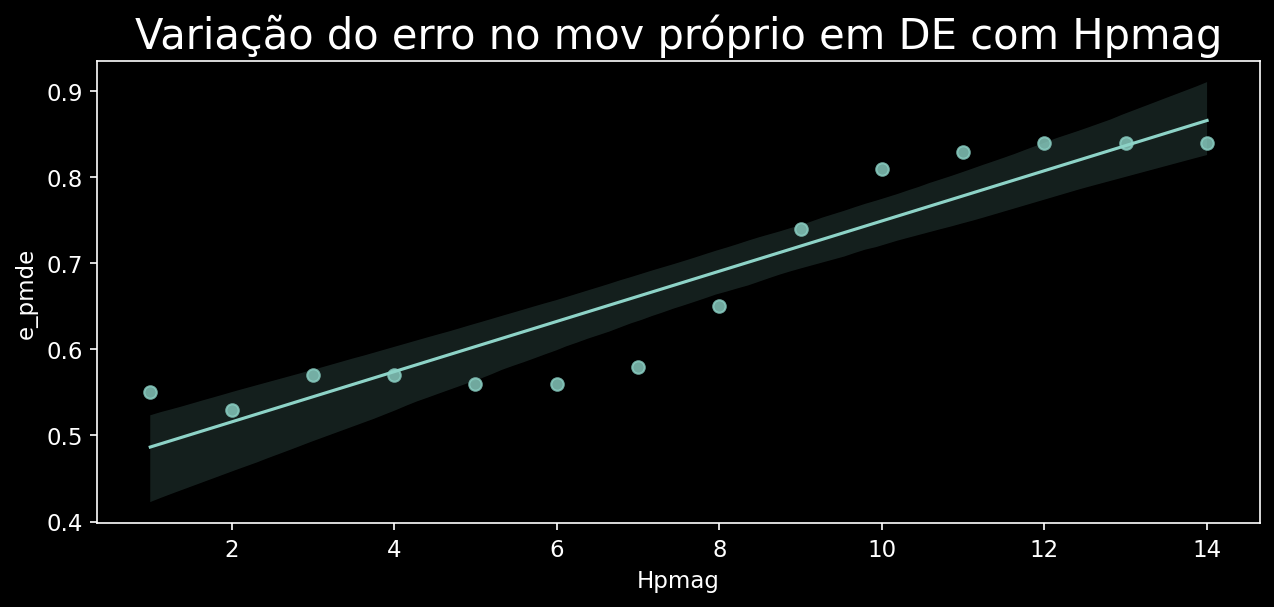

In [ ]:
sns.regplot(x = 'Hpmag',
            y = 'e_pmde',
            data = erro_agrupado).set_title('Variação do erro no mov próprio em DE com Hpmag')


### **Por que as linhas de regressão são mais íngremes para magnitudes?**

As linhas de regressão para as magnitudes podem ser mais íngremes devido à natureza das escalas de magnitude e distância:

1. Escala Logarítmica da Magnitude:

 - A magnitude estelar é uma medida logarítmica da luminosidade. Pequenas mudanças na magnitude correspondem a grandes mudanças na luminosidade. Isso pode resultar em uma relação mais acentuada (mais íngreme) quando plotamos magnitudes contra outra variável.

2. Sensibilidade da Magnitude à Distância:

 - A magnitude aparente de uma estrela depende inversamente do quadrado da distância (lei do inverso do quadrado). Pequenas variações na distância podem causar grandes variações na magnitude aparente. Isso pode acentuar a inclinação da linha de regressão.

3. Distribuição de Dados:

 - A distribuição de magnitudes pode ser mais dispersa e variada do que a distribuição de distâncias, especialmente porque a magnitude pode ser influenciada por diversos fatores como brilho intrínseco e extinção interestelar. Essa variabilidade adicional pode resultar em linhas de regressão mais íngremes.

### **Conclusão**

As linhas de regressão para magnitudes são mais íngremes do que para distâncias devido à natureza logarítmica da escala de magnitudes e à sensibilidade da magnitude à distância. Pequenas variações na distância resultam em grandes variações na magnitude aparente, acentuando a inclinação das linhas de regressão.

## **10. Metadados de pesquisa**

Um dos aspectos mais úteis de qualquer missão observacional é o uso de certos sinalizadores que nos dizem algo sobre um ou mais aspectos dos dados observacionais. Astrônomos profissionais usam esses sinalizadores para desenvolver rotinas que ajudam a filtrar melhor as estrelas. Por exemplo, o gráfico abaixo mostra as fontes de `v_mag` para o catálogo Hipparcos. Dependendo da fonte dos dados, correções específicas podem ser aplicadas às medições para obter um conjunto mais robusto de estrelas para análise de dados astronômicos.

### **Sinalizador: Fontes de magnitude-V**

Missões espaciais fotométricas de magnitudes como a da pesquisa Hipparcos são o ápice de dados observacionais de diferentes telescópios. O gráfico abaixo mostra as fontes de magnitude-V. O significado dos identificadores são os seguintes:

- **G**: Fotometria multicolorida baseada no solo, diretamente ou reduzida ao sistema Johnson UBV;

- **H**: Magnitude Hipparcos `Hip_mag`, combinada com informações sobre o índice de cor (V-I ou BT_mag-VT_mag), em combinação com a classe de luminosidade;

- **T**: Fotometria Tycho, ou seja, VT_mag e BT_mag-VT_mag.

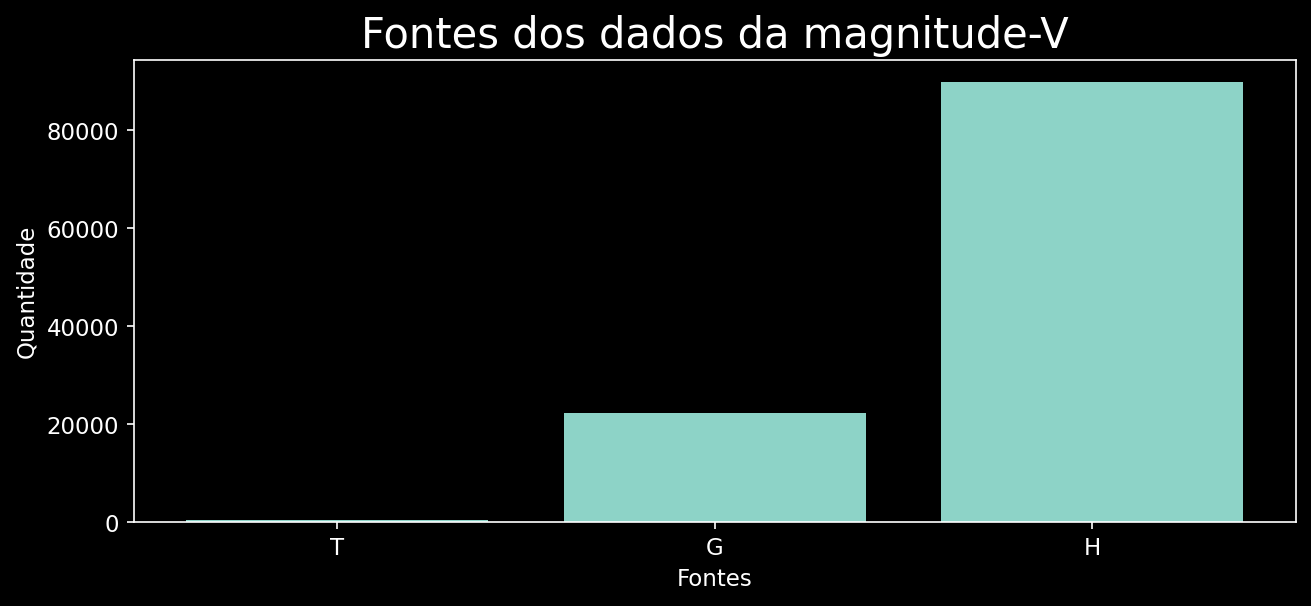

In [ ]:
fontes = df_cor_corrigida['r_Vmag'].value_counts().index
quantidade = df_cor_corrigida['r_Vmag'].value_counts().values
data_df = pd.DataFrame({'sources': fontes,
                       'sources_count': quantidade})
data_df = data_df.sort_values('sources_count')
plt.bar(data_df['sources'], data_df['sources_count'])
plt.xlabel('Fontes')
plt.ylabel('Quantidade')
plt.title('Fontes dos dados da magnitude-V')
plt.show()

### **Sinalizador: Sinalizador de referência para astrometria**

Sinalizador de referência para parâmetros astrométricos de sistemas duplos e múltiplos. Este sinalizador indica que os parâmetros astrométricos referem-se a:

A, B etc: a letra indica o componente especificado de um sistema duplo ou múltiplo;

*: o fotocentro de um sistema duplo ou múltiplo incluído na Parte C do Anexo de Sistemas Duplos e Múltiplos;

+: o centro de massa: para tal entrada, uma órbita é fornecida na Parte O do Anexo de Sistemas Duplos e Múltiplos.

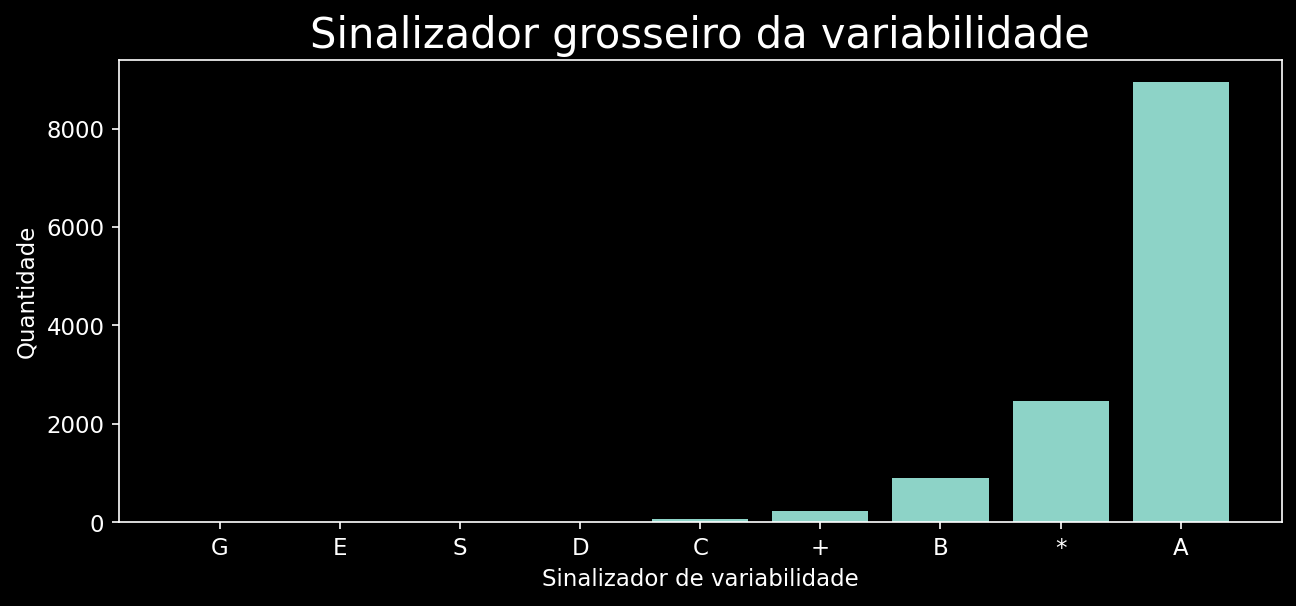

In [ ]:
fontes = df_cor_corrigida['AstroRef'].value_counts().index
quantidade = df_cor_corrigida['AstroRef'].value_counts().values
data_df = pd.DataFrame({'sources': fontes,
                       'sources_count': quantidade})
data_df = data_df.sort_values('sources_count')
plt.bar(data_df['sources'], data_df['sources_count'])
plt.xlabel('Sinalizador de variabilidade')
plt.ylabel('Quantidade')
plt.title('Sinalizador grosseiro da variabilidade')
plt.show()

### **Sinalizador: Sinalizador de referência para Hpmag**

Um sinalizador de referência para os parâmetros fotométricos do Hipparcos. Para uma entrada dupla ou múltipla, este sinalizador indica que a fotometria se refere a:

A, B, etc: o componente especificado de um sistema duplo ou múltiplo;

*: fotometria combinada de um sistema duplo, corrigida para atenuação pela resposta instantânea do perfil do campo de visão do detector;

-: fotometria combinada de um sistema duplo, NÃO corrigida para atenuação pela resposta instantânea do perfil do campo de visão do detector.

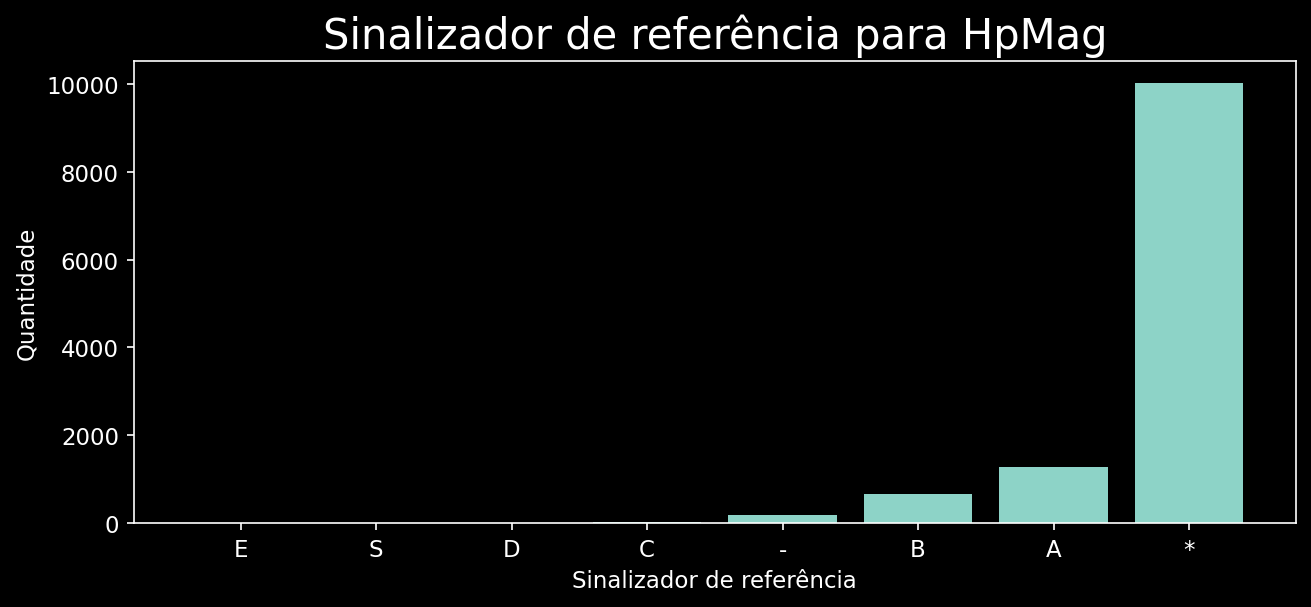

In [ ]:
fontes = df_cor_corrigida['m_Hpmag'].value_counts().index
quantidade = df_cor_corrigida['m_Hpmag'].value_counts().values
data_df = pd.DataFrame({'sources': fontes,
                       'sources_count': quantidade})
data_df = data_df.sort_values('sources_count')
plt.bar(data_df['sources'], data_df['sources_count'])
plt.xlabel('Sinalizador de referência')
plt.ylabel('Quantidade')
plt.title('Sinalizador de referência para HpMag')
plt.show()

### **Sinalizador: Sinalizador de status histórico**

O status histórico do identificador CCDM - Catálogo de Componentes de Sistemas Duplos e Múltiplos (Catalogue of the Components of Double and Multiple Stars). A bandeira assume os seguintes valores:

H: sistema determinado como duplo ou múltiplo pelas observações do Hipparcos, e até então desconhecido como duplo ou múltiplo;

I: sistema previamente identificado como múltiplo, conforme Anexo 1 do Catálogo de Insumos Hipparcos (HIC);

M: diversos (o sistema foi previamente identificado, após a publicação do HIC, utilizando outros catálogos e compilações disponíveis mais recentemente).

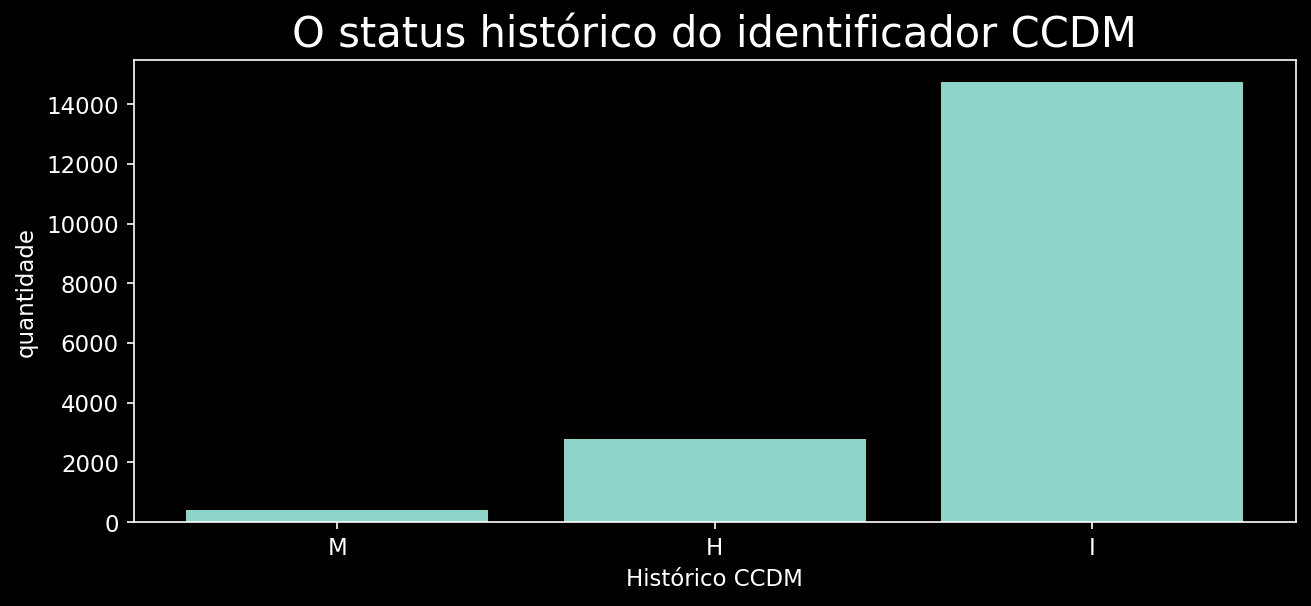

In [ ]:
fontes = df_cor_corrigida['n_CCDM'].value_counts().index
quantidade = df_cor_corrigida['n_CCDM'].value_counts().values
data_df = pd.DataFrame({'sources': fontes,
                       'sources_count': quantidade})
data_df = data_df.sort_values('sources_count')
plt.bar(data_df['sources'], data_df['sources_count'])
plt.xlabel('Histórico CCDM')
plt.ylabel('quantidade')
plt.title('O status histórico do identificador CCDM')
plt.show()

### **Flag: Double and or Multiple Systems flag**

The Double and Multiple Systems Annex flag. This indicates that further details of this system are given in one of the 5 (mutually exclusive) parts of the Double and Multiple Systems Annex labelled as follows:

C : solutions for the components

G : acceleration or higher order terms

O : orbital solutions

V : variability-induced movers (apparent motion arises from variability of one of the components of a double system)

X : stochastic solution (probably astrometric binaries of short period)

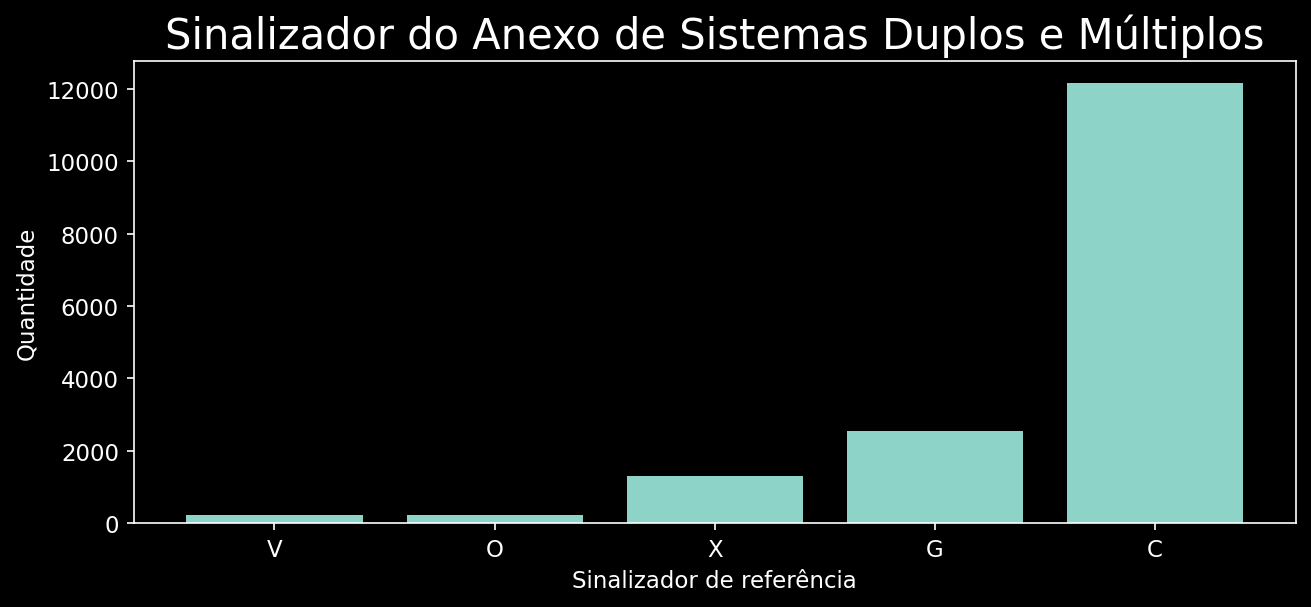

In [ ]:
fontes = df_cor_corrigida['MultFlag'].value_counts().index
quantidade = df_cor_corrigida['MultFlag'].value_counts().values
data_df = pd.DataFrame({'sources': fontes,
                       'sources_count': quantidade})
data_df = data_df.sort_values('sources_count')
plt.bar(data_df['sources'], data_df['sources_count'])
plt.xlabel('Sinalizador de referência')
plt.ylabel('Quantidade')
plt.title('Sinalizador do Anexo de Sistemas Duplos e Múltiplos')
plt.show()

### **Sinalizador: Sinalizador de origem astrométrica**

Um sinalizador para a fonte da astrometria absoluta. Este parâmetro qualifica a fonte dos parâmetros astrométricos para algumas das entradas com valor 'C' para o parâmetro `Dbl_Mult_Annex`. Os valores são os seguintes:

P: alvo primário de um sistema de 2 ou 3 pontos;

F: secundário ou terciário de um sistema 'fixo' de 2 ou 3 pontos (paralaxe comum e movimentos próprios);

I: secundário ou terciário de um sistema 'independente' de 2 ou 3 pontos (sem restrições de paralaxe ou movimentos próprios);

L: secundário ou terciário de um sistema 'linear' de 2 ou 3 pontos (paralaxe comum);

S: parâmetros astrométricos do processo de 'fusão de estrela única'.

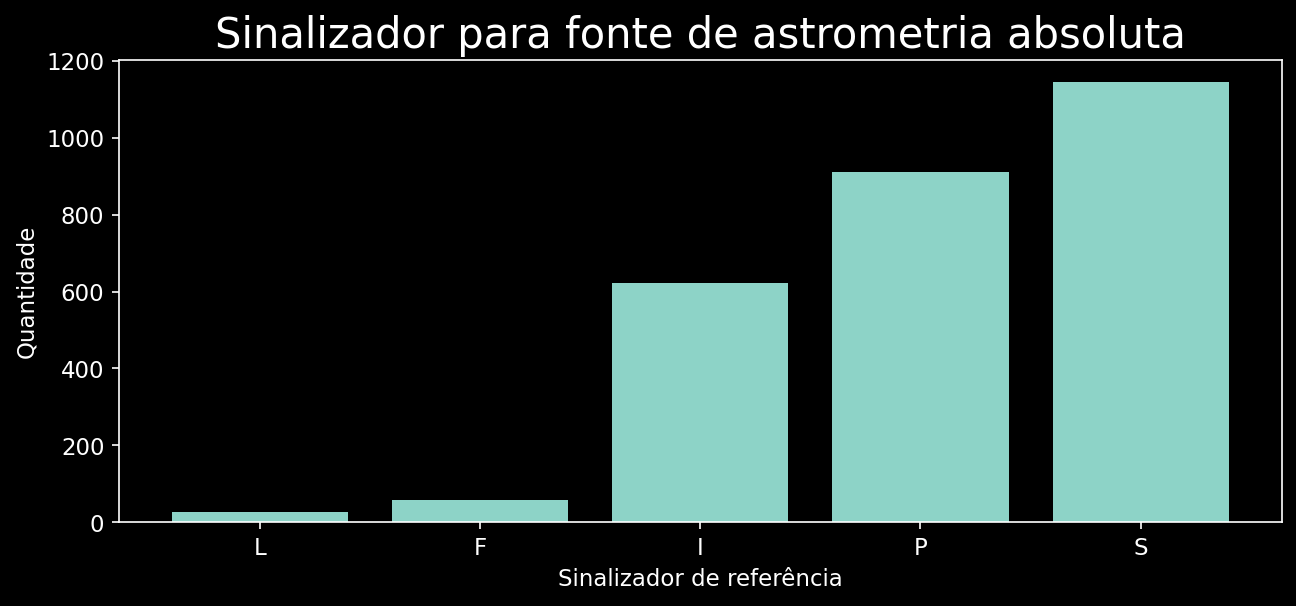

In [ ]:
fontes = df_cor_corrigida['Source'].value_counts().index
quantidade = df_cor_corrigida['Source'].value_counts().values
data_df = pd.DataFrame({'sources': fontes,
                       'sources_count': quantidade})
data_df = data_df.sort_values('sources_count')
plt.bar(data_df['sources'], data_df['sources_count'])
plt.xlabel('Sinalizador de referência')
plt.ylabel('Quantidade')
plt.title('Sinalizador para fonte de astrometria absoluta')
plt.show()

### **Sinalizador: Sinalizador de qualidade da solução**

Um sinalizador de qualidade da solução que indica a fiabilidade da solução em estrela dupla ou múltipla e é definido para todas as entradas na Parte C do Anexo de Sistemas Duplos e Múltiplos. Os sinalizadores podem ser entendidos da seguinte forma:

A: solução 'boa' ou confiável;

B: solução 'justa' ou moderadamente confiável;

C: solução 'ruim' ou menos confiável;

D: solução incerta;

S: suspeita de não-única, ou seja, possível dupla ou múltipla, embora nenhuma solução em estrela não-única significativa ou convincente tenha sido encontrada.

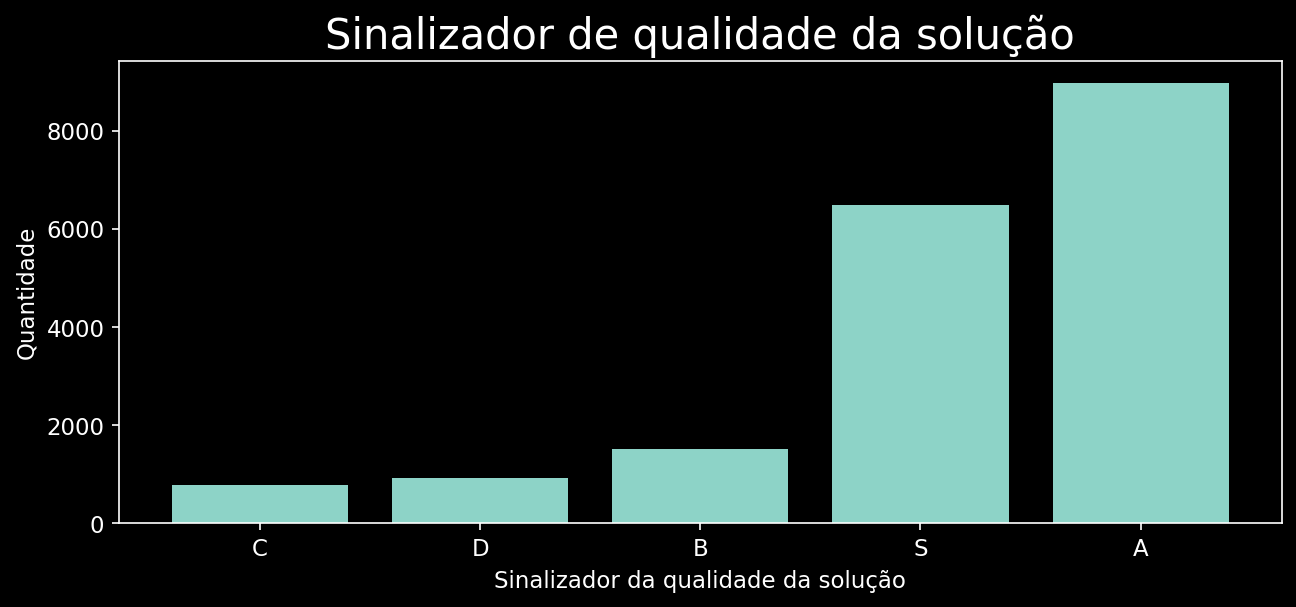

In [ ]:
fontes = df_cor_corrigida['Qual'].value_counts().index
quantidade = df_cor_corrigida['Qual'].value_counts().values
data_df = pd.DataFrame({'sources': fontes,
                       'sources_count': quantidade})
data_df = data_df.sort_values('sources_count')
plt.bar(data_df['sources'], data_df['sources_count'])
plt.xlabel('Sinalizador da qualidade da solução')
plt.ylabel('Quantidade')
plt.title('Sinalizador de qualidade da solução')
plt.show()

### **Sinalizador: Existência de notas**

Um sinalizador indicando uma nota é colocada no final do(s) volume(s) do catálogo impresso. O sinalizador tem o seguinte significado:

D: apenas nota de sistemas duplos e múltiplos (Volume 10)

G: apenas nota geral (Volumes 5-9)

P: apenas notas fotométricas (incluindo variabilidade) (Volume 11)

W: D + P apenas

X: D + G apenas

Y: Somente G + P

Z: D + G + P

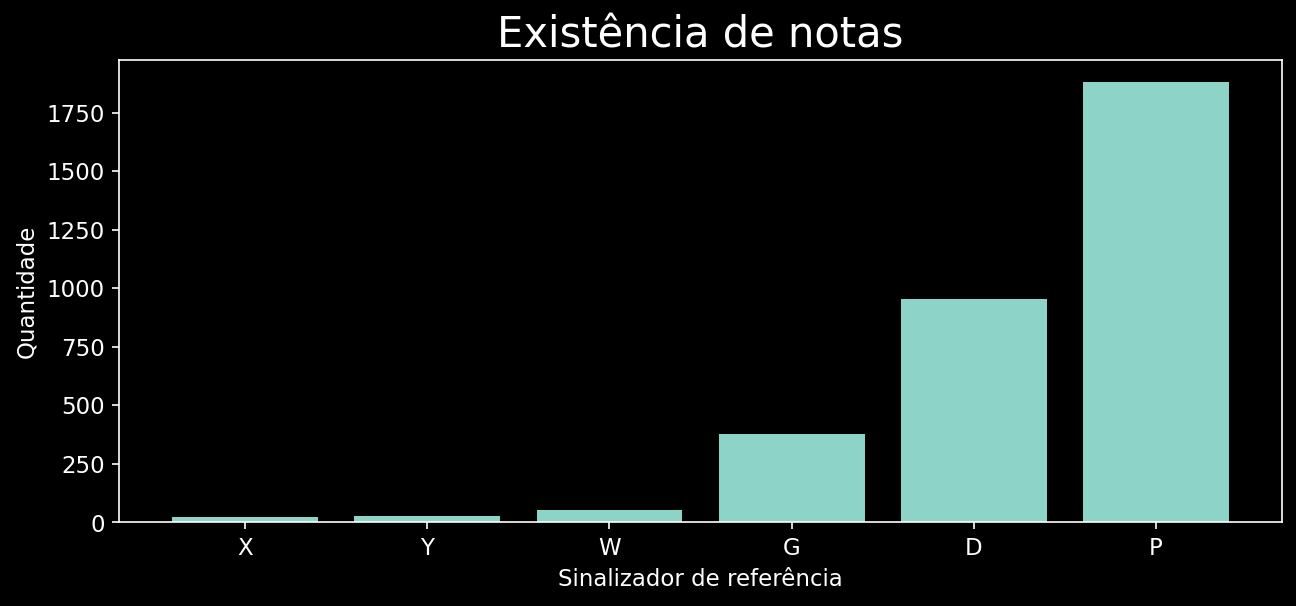

In [ ]:
fontes = df_cor_corrigida['Notes'].value_counts().index
quantidade = df_cor_corrigida['Notes'].value_counts().values
data_df = pd.DataFrame({'sources': fontes,
                       'sources_count': quantidade})
data_df = data_df.sort_values('sources_count')
plt.bar(data_df['sources'], data_df['sources_count'])
plt.xlabel('Sinalizador de referência')
plt.ylabel('Quantidade')
plt.title('Existência de notas')
plt.show()

### **Sinalizador: Fonte do tipo espectral**

A fonte do tipo espectral. O sinalizador indica a fonte da seguinte forma:

1: Catálogo de Michigan para as estrelas HD, vol. 1 (Houk+, 1975)

2: Catálogo de Michigan para as estrelas HD, vol. 2 (Houk, 1978)

3: Catálogo de Michigan para as estrelas HD, vol. 3 (Houk, 1982)

4: Catálogo de Michigan para as estrelas HD, vol. 4 (Houk +, 1988)

G: atualizado após publicação do HIC

K: Catálogo Geral de Estrelas Variáveis, 4ª Ed. (Kholopov+ 1988)

S: banco de dados SIMBAD

X: Diversos

: Uma entrada em branco não possui informações correspondentes.

Fontes de *heasarc*.

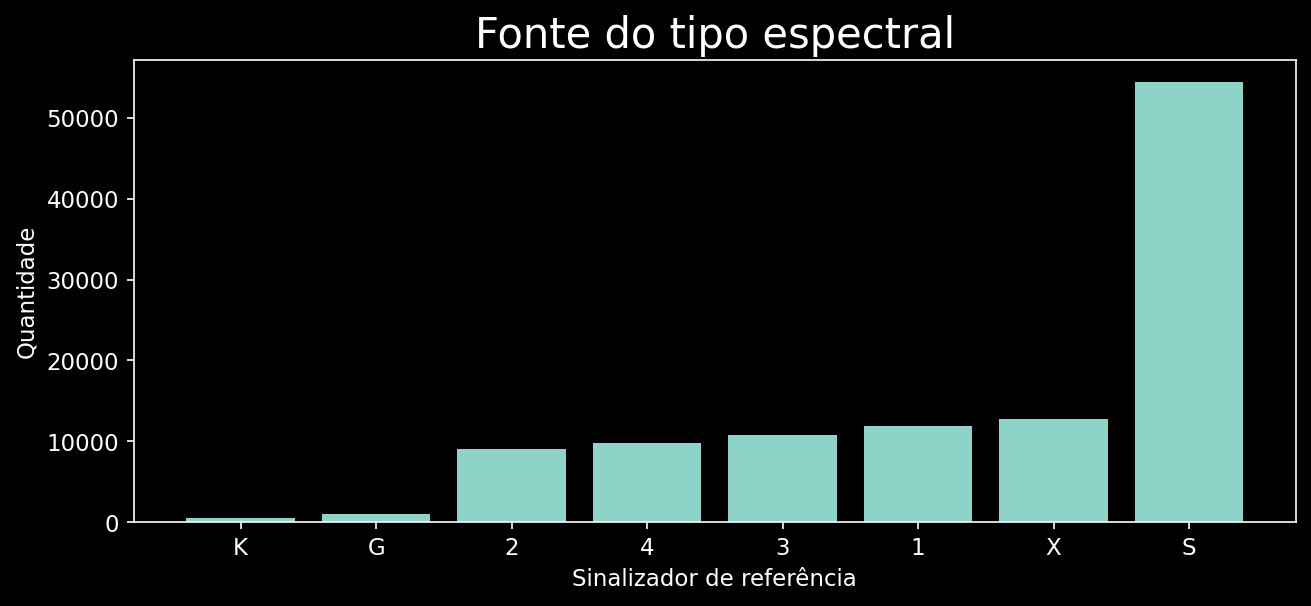

In [ ]:
fontes = df_cor_corrigida['r_SpType'].value_counts().index
quantidade = df_cor_corrigida['r_SpType'].value_counts().values
data_df = pd.DataFrame({'sources': fontes,
                       'sources_count': quantidade})
data_df = data_df.sort_values('sources_count')
plt.bar(data_df['sources'], data_df['sources_count'])
plt.xlabel('Sinalizador de referência')
plt.ylabel('Quantidade')
plt.title('Fonte do tipo espectral')
plt.show()

### Sinaliador: Sinalizador de referência para BT e VTmag

Um sinalizador de referência para BT_mag e VT_mag que indica, para estrelas não únicas, o componente medido na fotometria Tycho, ou indica que vários componentes foram medidos diretamente em conjunto pelo Tycho, ou tiveram seus dados Tycho combinados. A bandeira assume os seguintes valores:

A, B etc.: a fotometria Tycho refere-se ao componente designado do Catálogo Hipparcos;

*: a fotometria Tycho refere-se a todos os componentes da entrada relevante do Hipparcos;

-: a fotometria Tycho refere-se a um sistema triplo ou quádruplo de ponto único, para o qual apenas um par próximo foi observado por Tycho, sendo os outros componentes muito fracos para serem detectados por Tycho.

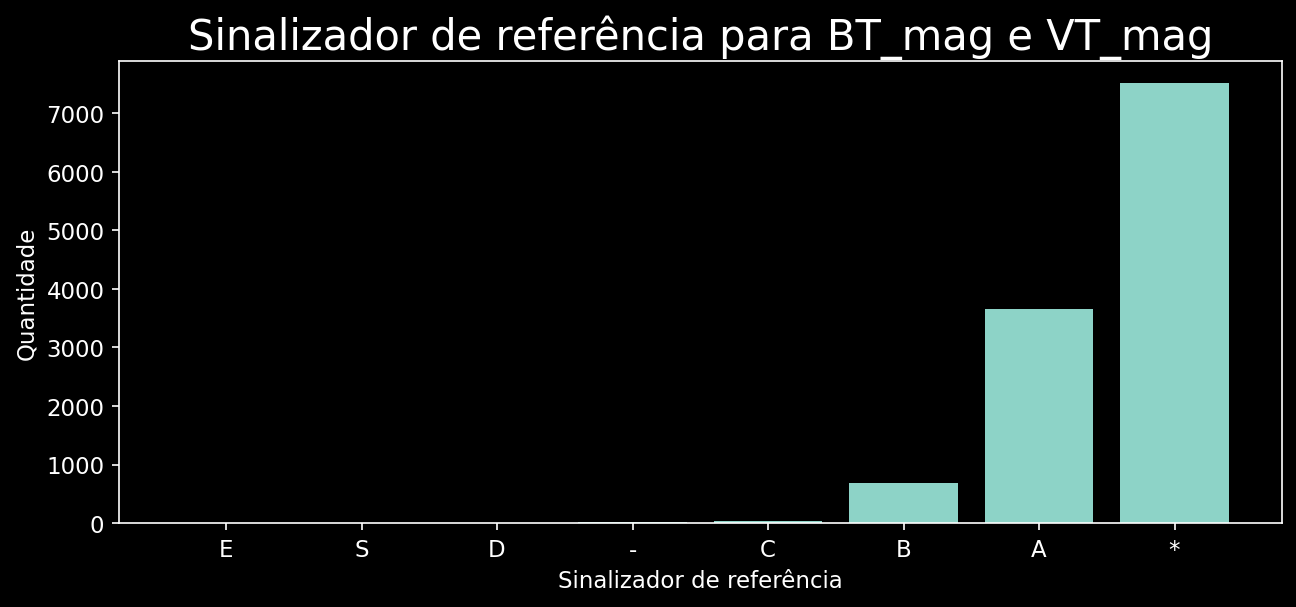

In [ ]:
fontes = df_cor_corrigida['m_BTmag'].value_counts().index
quantidade = df_cor_corrigida['m_BTmag'].value_counts().values
data_df = pd.DataFrame({'sources': fontes,
                       'sources_count': quantidade})
data_df = data_df.sort_values('sources_count')
plt.bar(data_df['sources'], data_df['sources_count'])
plt.xlabel('Sinalizador de referência')
plt.ylabel('Quantidade')
plt.title('Sinalizador de referência para BT_mag e VT_mag')
plt.show()

### Sinalizador: Fonte de BV de Ground ou Tycho

A fonte do índice de cores (BV) - `BV_Color`:

G: indica que foi retirado de observações terrestres;

T: indica que foi determinado a partir dos dados transformados do Tycho (B_T-V_T).

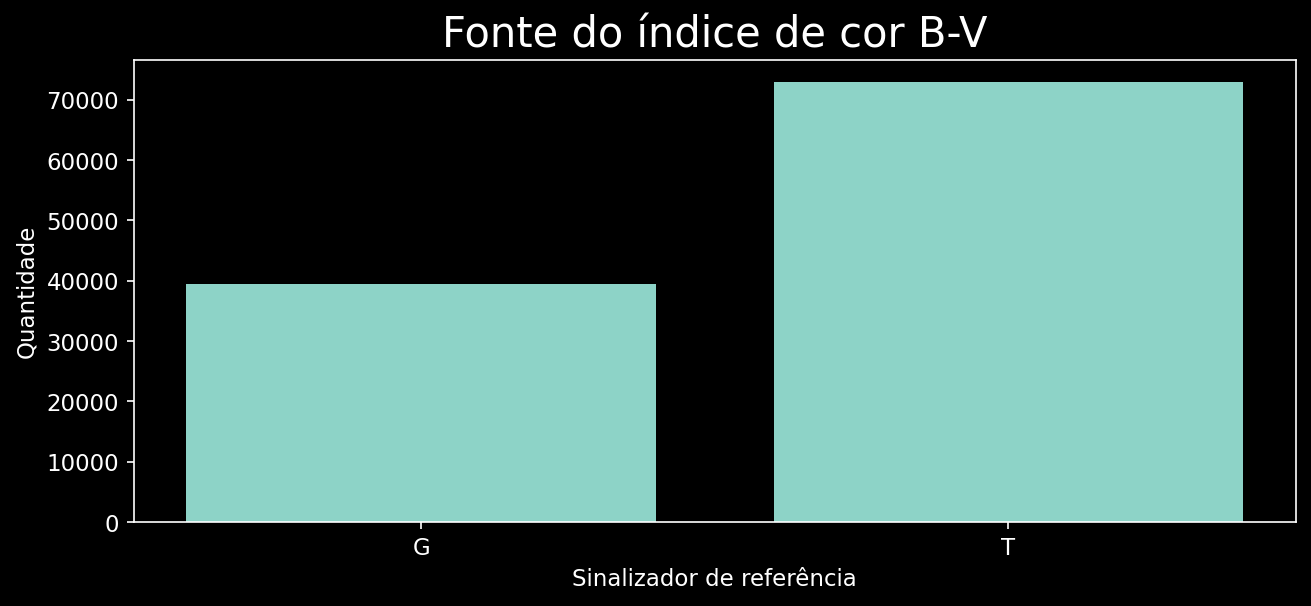

In [ ]:
fontes = df_cor_corrigida['r_B-V'].value_counts().index
quantidade = df_cor_corrigida['r_B-V'].value_counts().values
data_df = pd.DataFrame({'sources': fontes,
                       'sources_count': quantidade})
data_df = data_df.sort_values('sources_count')
plt.bar(data_df['sources'], data_df['sources_count'])
plt.xlabel('Sinalizador de referência')
plt.ylabel('Quantidade')
plt.title('Fonte do índice de cor B-V')
plt.show()

### Sinalizador: Fonte do VI

A fonte do índice de cores (V-I), `VI_Color` (consulte a Seção 1.3, Apêndice 5 do Catálogo Hipparcos publicado para obter detalhes completos):

'A': para uma observação do sistema V-I no sistema de Cousins;

'B' a 'K': quando V-I derivado de medições em outras bandas/sistemas fotoelétricos;

'L' a 'P': quando V-I derivado da fotometria Hipparcos e Star Mapper;

'Q': para variáveis ​​de longo período;

'R' a 'T': quando as cores são desconhecidas.

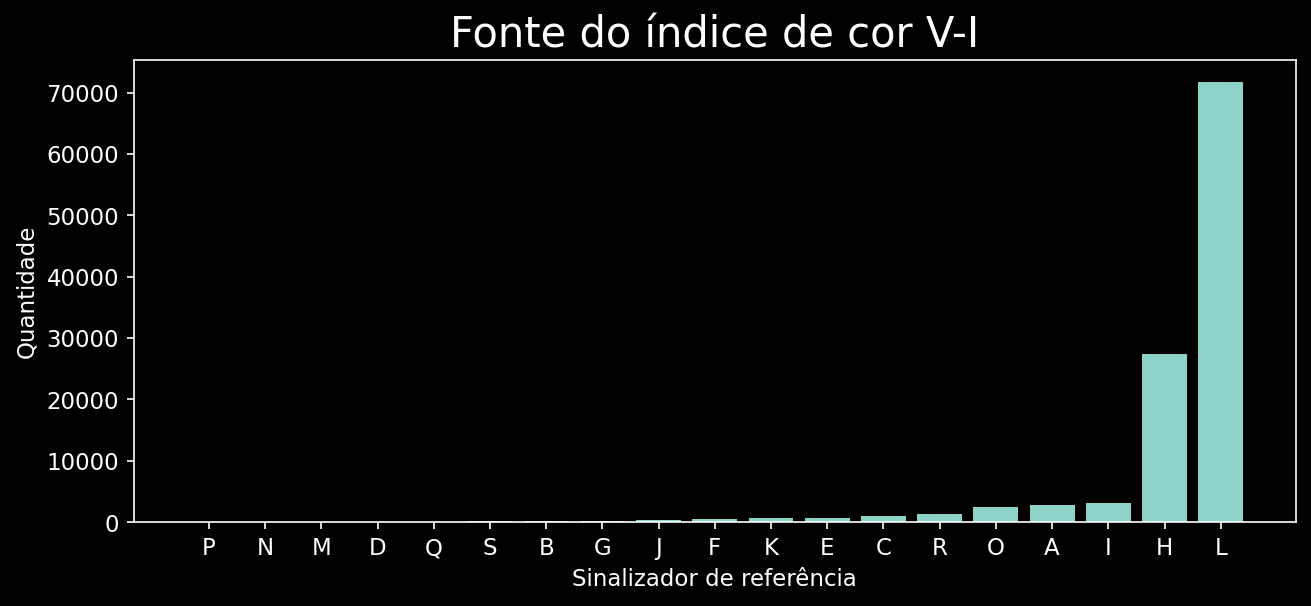

In [ ]:
fontes = df_cor_corrigida['r_V-I'].value_counts().index
quantidade = df_cor_corrigida['r_V-I'].value_counts().values
data_df = pd.DataFrame({'sources': fontes,
                       'sources_count': quantidade})
data_df = data_df.sort_values('sources_count')
plt.bar(data_df['sources'], data_df['sources_count'])
plt.xlabel('Sinalizador de referência')
plt.ylabel('Quantidade')
plt.title('Fonte do índice de cor V-I')
plt.show()

## **Conclusão**

Neste notebook nós aprendemos algumas coisas básicas sobre Astronomia. Abordamos os seguintes tópicos abaixo em ordem,

1. Sistema de Coordenadas Astronômicas
2. Movimento próprio das estrelas
3. Distâncias em Astronomia
4. Tipos Espectrais
5. Tipos Espectrais junto com classes de luminosidade
6. O sistema de magnitude em Astronomia
7. Estrelas variáveis
8. O Diagrama de RH
9. Erros de medição em Astronomia
10. Metadados de pesquisa

Antes de terminar, devemos recordar mais uma vez que a análise mostrada neste notebook não leva em consideração as correções usando sinalizadores ou outras correções recomendadas publicadas pelo próprio grupo de pesquisa Hipparcos e, portanto, são altamente imprecisas.

Manteve-se aqui uma abordagem mais simples e direta sobre os assuntos tratados, porém, com bibliografias, mesmo que não específicas, para aqueles que tem interesse de estudar e melhor entender sobre o assunto.

\

\

\

Notebook fornecido por **Sumit Barnerjee**. Adaptado para PT-BR com alterações por **Isaac Davi**.